In [8]:
#import packages
import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import logging
import numpy as np
import copy

#custom classes
from classes import classes as cl
from functions import functions as fc
from functions import routing as rt
from functions import simulated_annealing as sa
import random

plt.rcParams.update({'font.size': 22})
logging.basicConfig(filename="hc_with_random_moves.log", level=logging.INFO)

init_path = 'output/initial_solution'
img_exp_path = 'output/graphs/hc_random/'

Initiation

In [9]:
fc.print_log("Starting initiation")
#create empty dict
initiation_objects = {'dict_depots': '', 'dict_sites': '', 'dict_plants': '', 'dict_jobs': '', 'dict_tours': '', 'list_days': ''}


objects = fc.initiate(initiation_objects,init_path,'final')

#load objects
list_days = objects['list_days']
dict_depots = objects['dict_depots']
dict_sites = objects['dict_sites']
dict_plants = objects['dict_plants']
dict_jobs = objects['dict_jobs']
dict_tours = objects['dict_tours']

#also create lists for convenience
list_depots = [dict_depots[element] for element in dict_depots]
list_sites = [dict_sites[element] for element in dict_sites]
list_plants = [dict_plants[element] for element in dict_plants]
list_jobs = [dict_jobs[element] for element in dict_jobs]
list_tours  = [dict_tours[element] for element in dict_tours]


fc.print_log("Done with initiation")

Starting initiation- t: 10:21:08
Starting initiation at 10:21:08- t: 10:21:08
Done with initiation- t: 10:21:10


In the first stage only one depot ist handled, so moves so its all about dropoff and pickup dates

In [10]:
#ov tours
for depot in dict_depots:
    total_tasks = 0
    total_distance = 0
    for day in list_days:
        total_tasks += dict_tours[depot][day].total_tasks
        total_distance += dict_tours[depot][day].distance
    print("Depot: {}, tasks: {} - distance: {}".format(depot,total_tasks,total_distance))

print("done here")

Depot: Neuherberg, tasks: 25454 - distance: 4547134.5148212565
Depot: Lauterhofen, tasks: 14329 - distance: 2151298.5445965845
Depot: Altbach, tasks: 5534 - distance: 648999.0083624776
Depot: Deisslingen, tasks: 0 - distance: 0
Depot: Bollschweil, tasks: 1586 - distance: 167723.71699792094
Depot: Lampertheim, tasks: 5872 - distance: 1059256.2914196497
Depot: Neuss, tasks: 19062 - distance: 2374315.453137417
Depot: Embsen, tasks: 9216 - distance: 1121736.368534145
Depot: Rottleberode, tasks: 25304 - distance: 6393335.900862845
Depot: Fenne, tasks: 0 - distance: 0
Depot: Castrop, tasks: 0 - distance: 0
Depot: Perl, tasks: 0 - distance: 0
Depot: Gnetsch, tasks: 0 - distance: 0
Depot: Vogelsdorf, tasks: 0 - distance: 0
Depot: Sukow, tasks: 0 - distance: 0
done here


start here
Start Inital Solution Plot- t: 10:21:10
Done with  Inital Solution Plot- t: 10:21:21


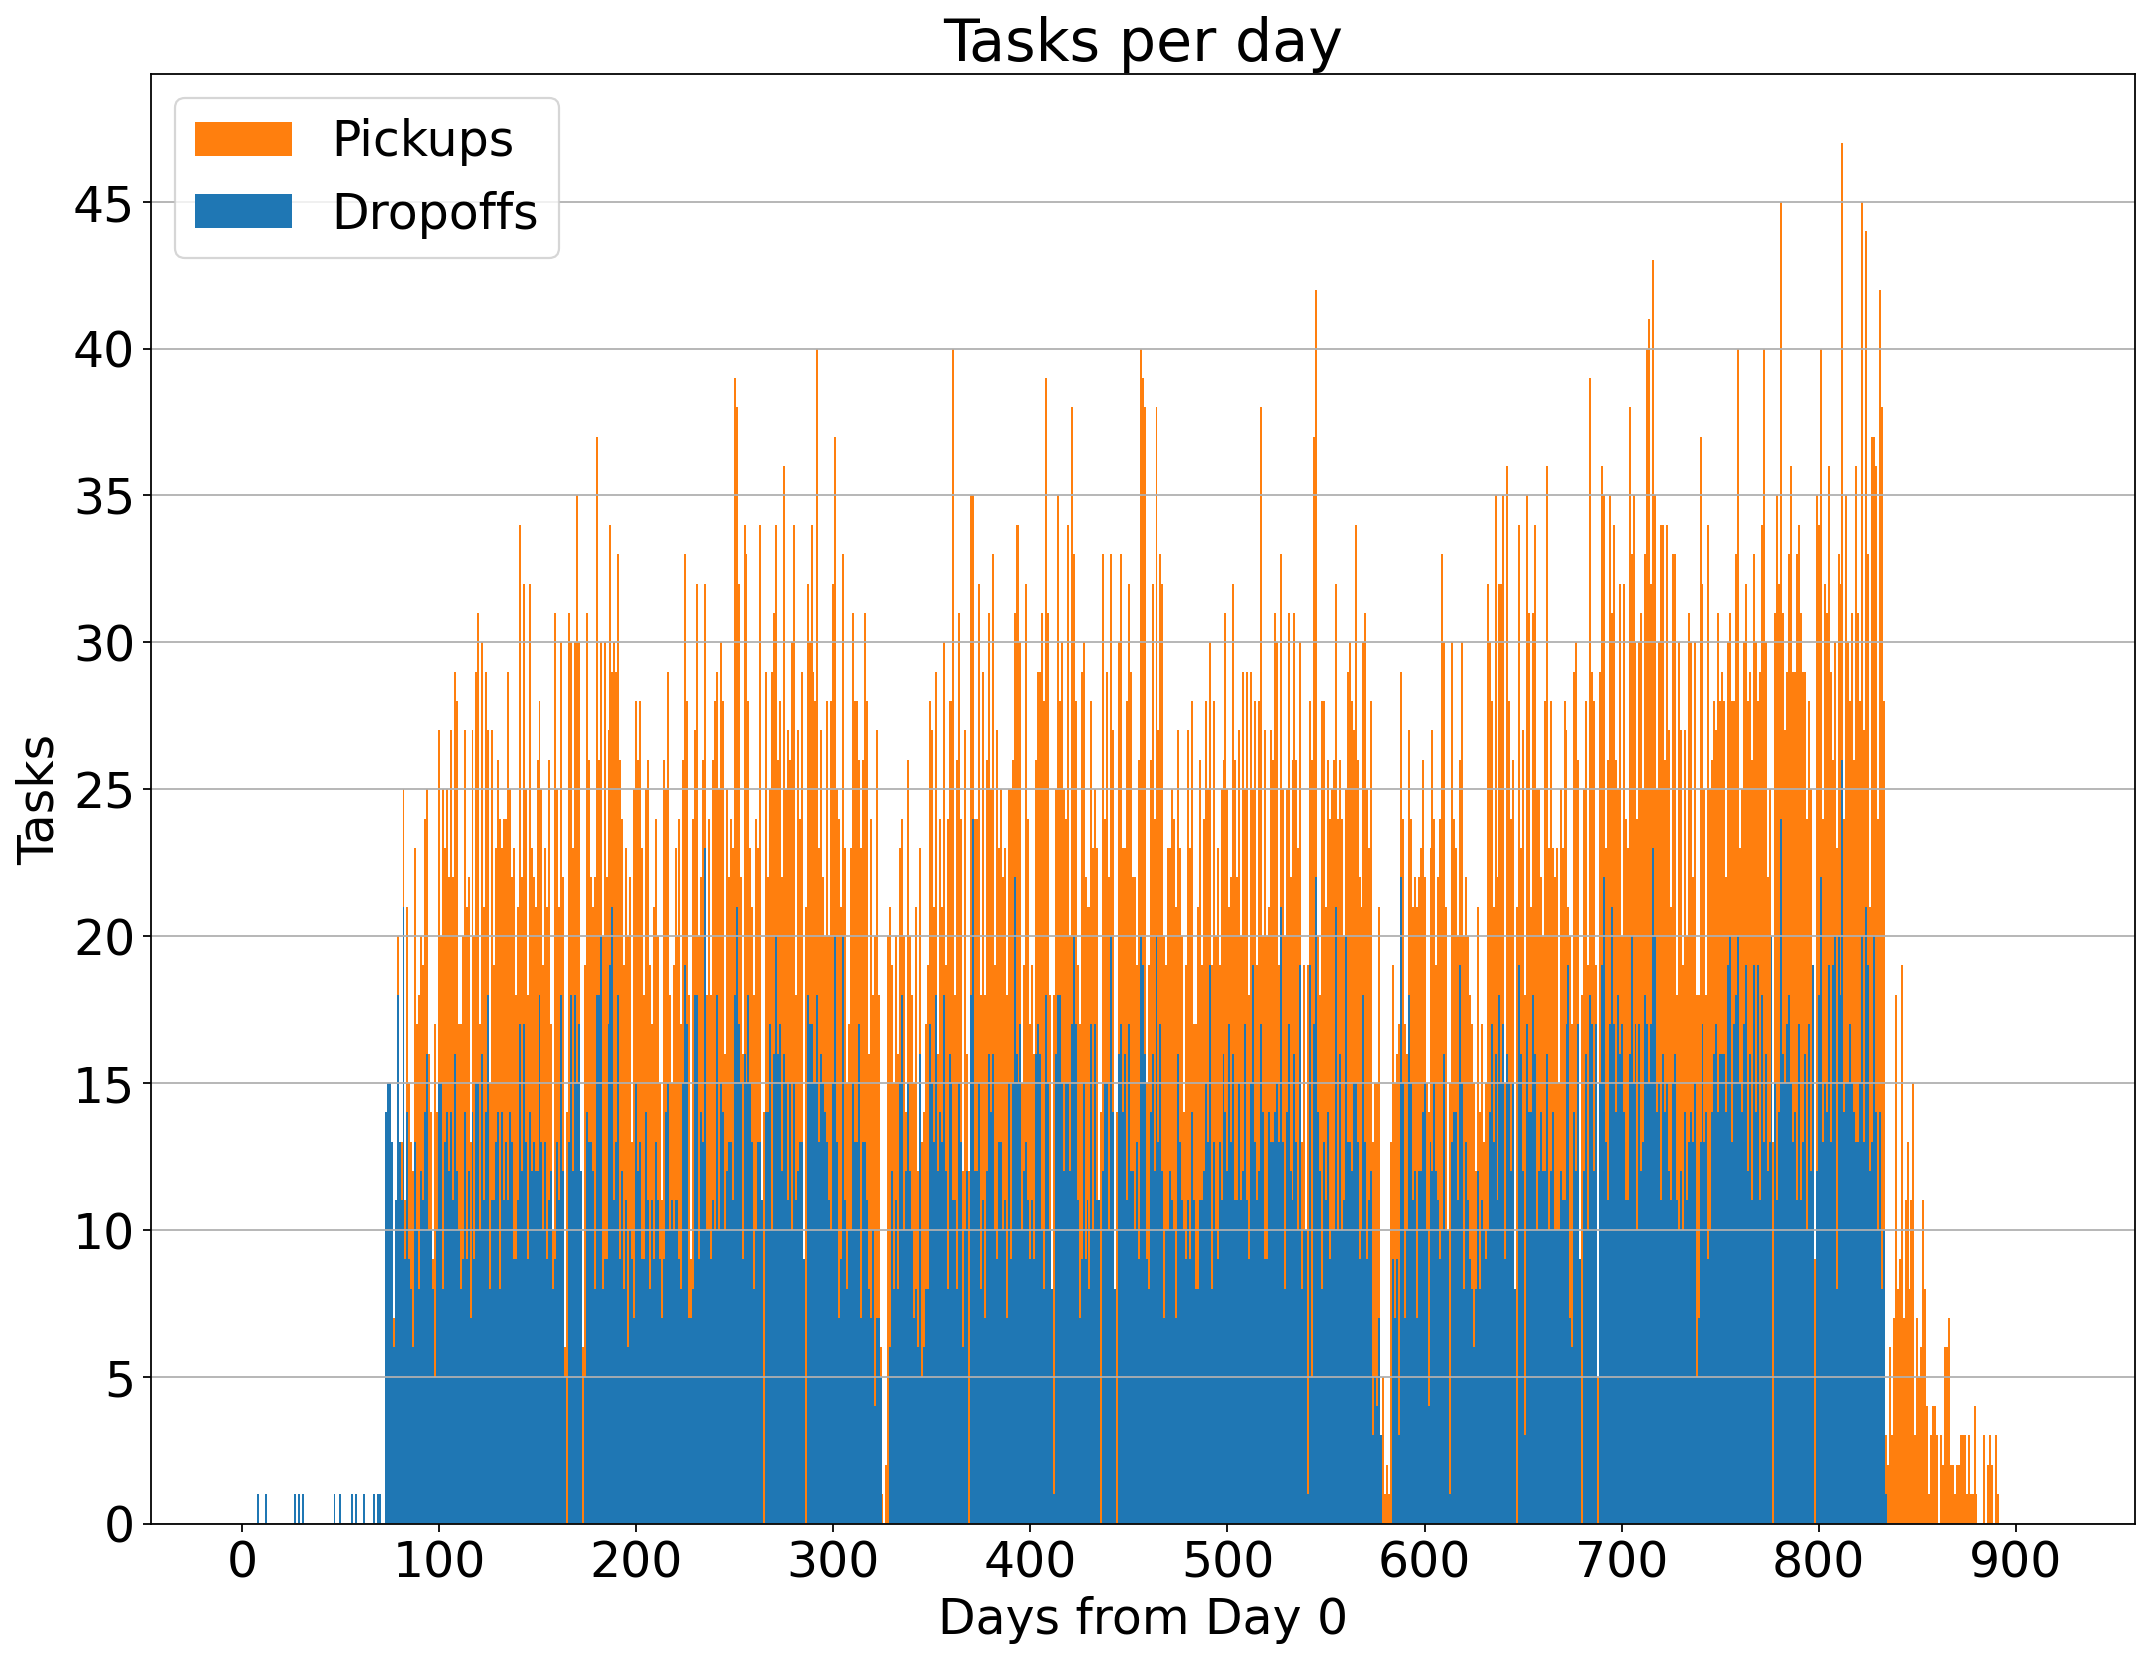

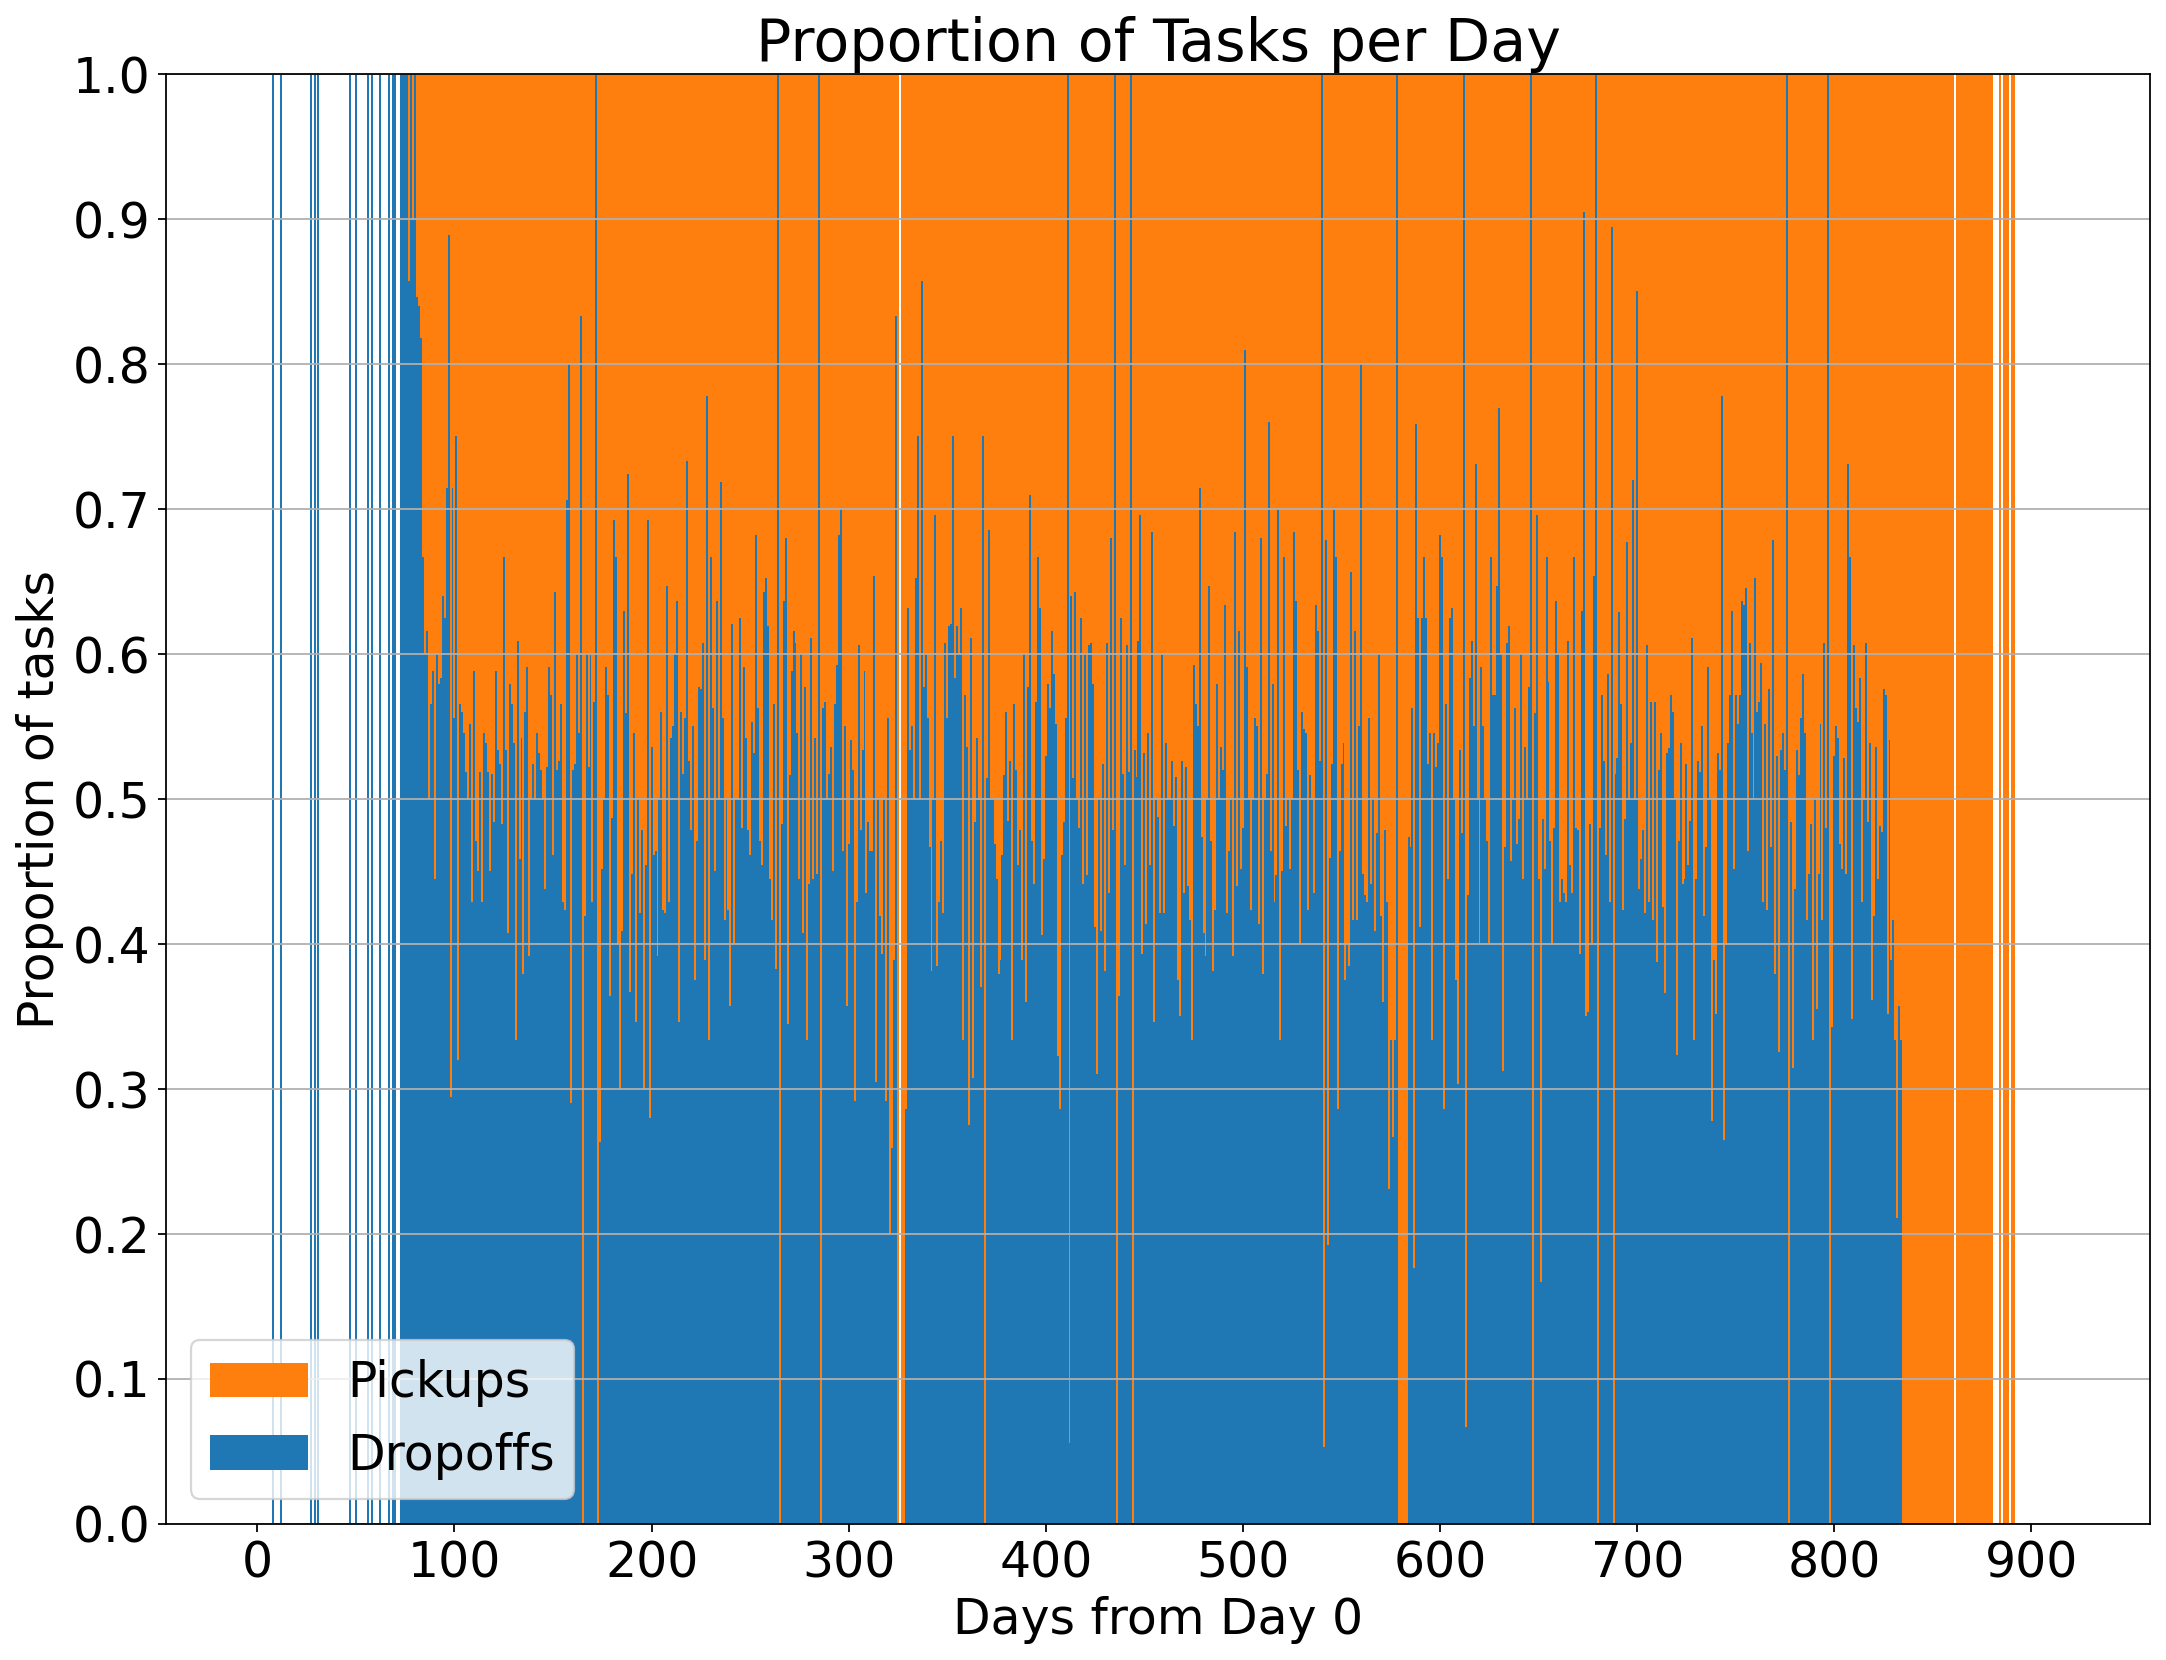

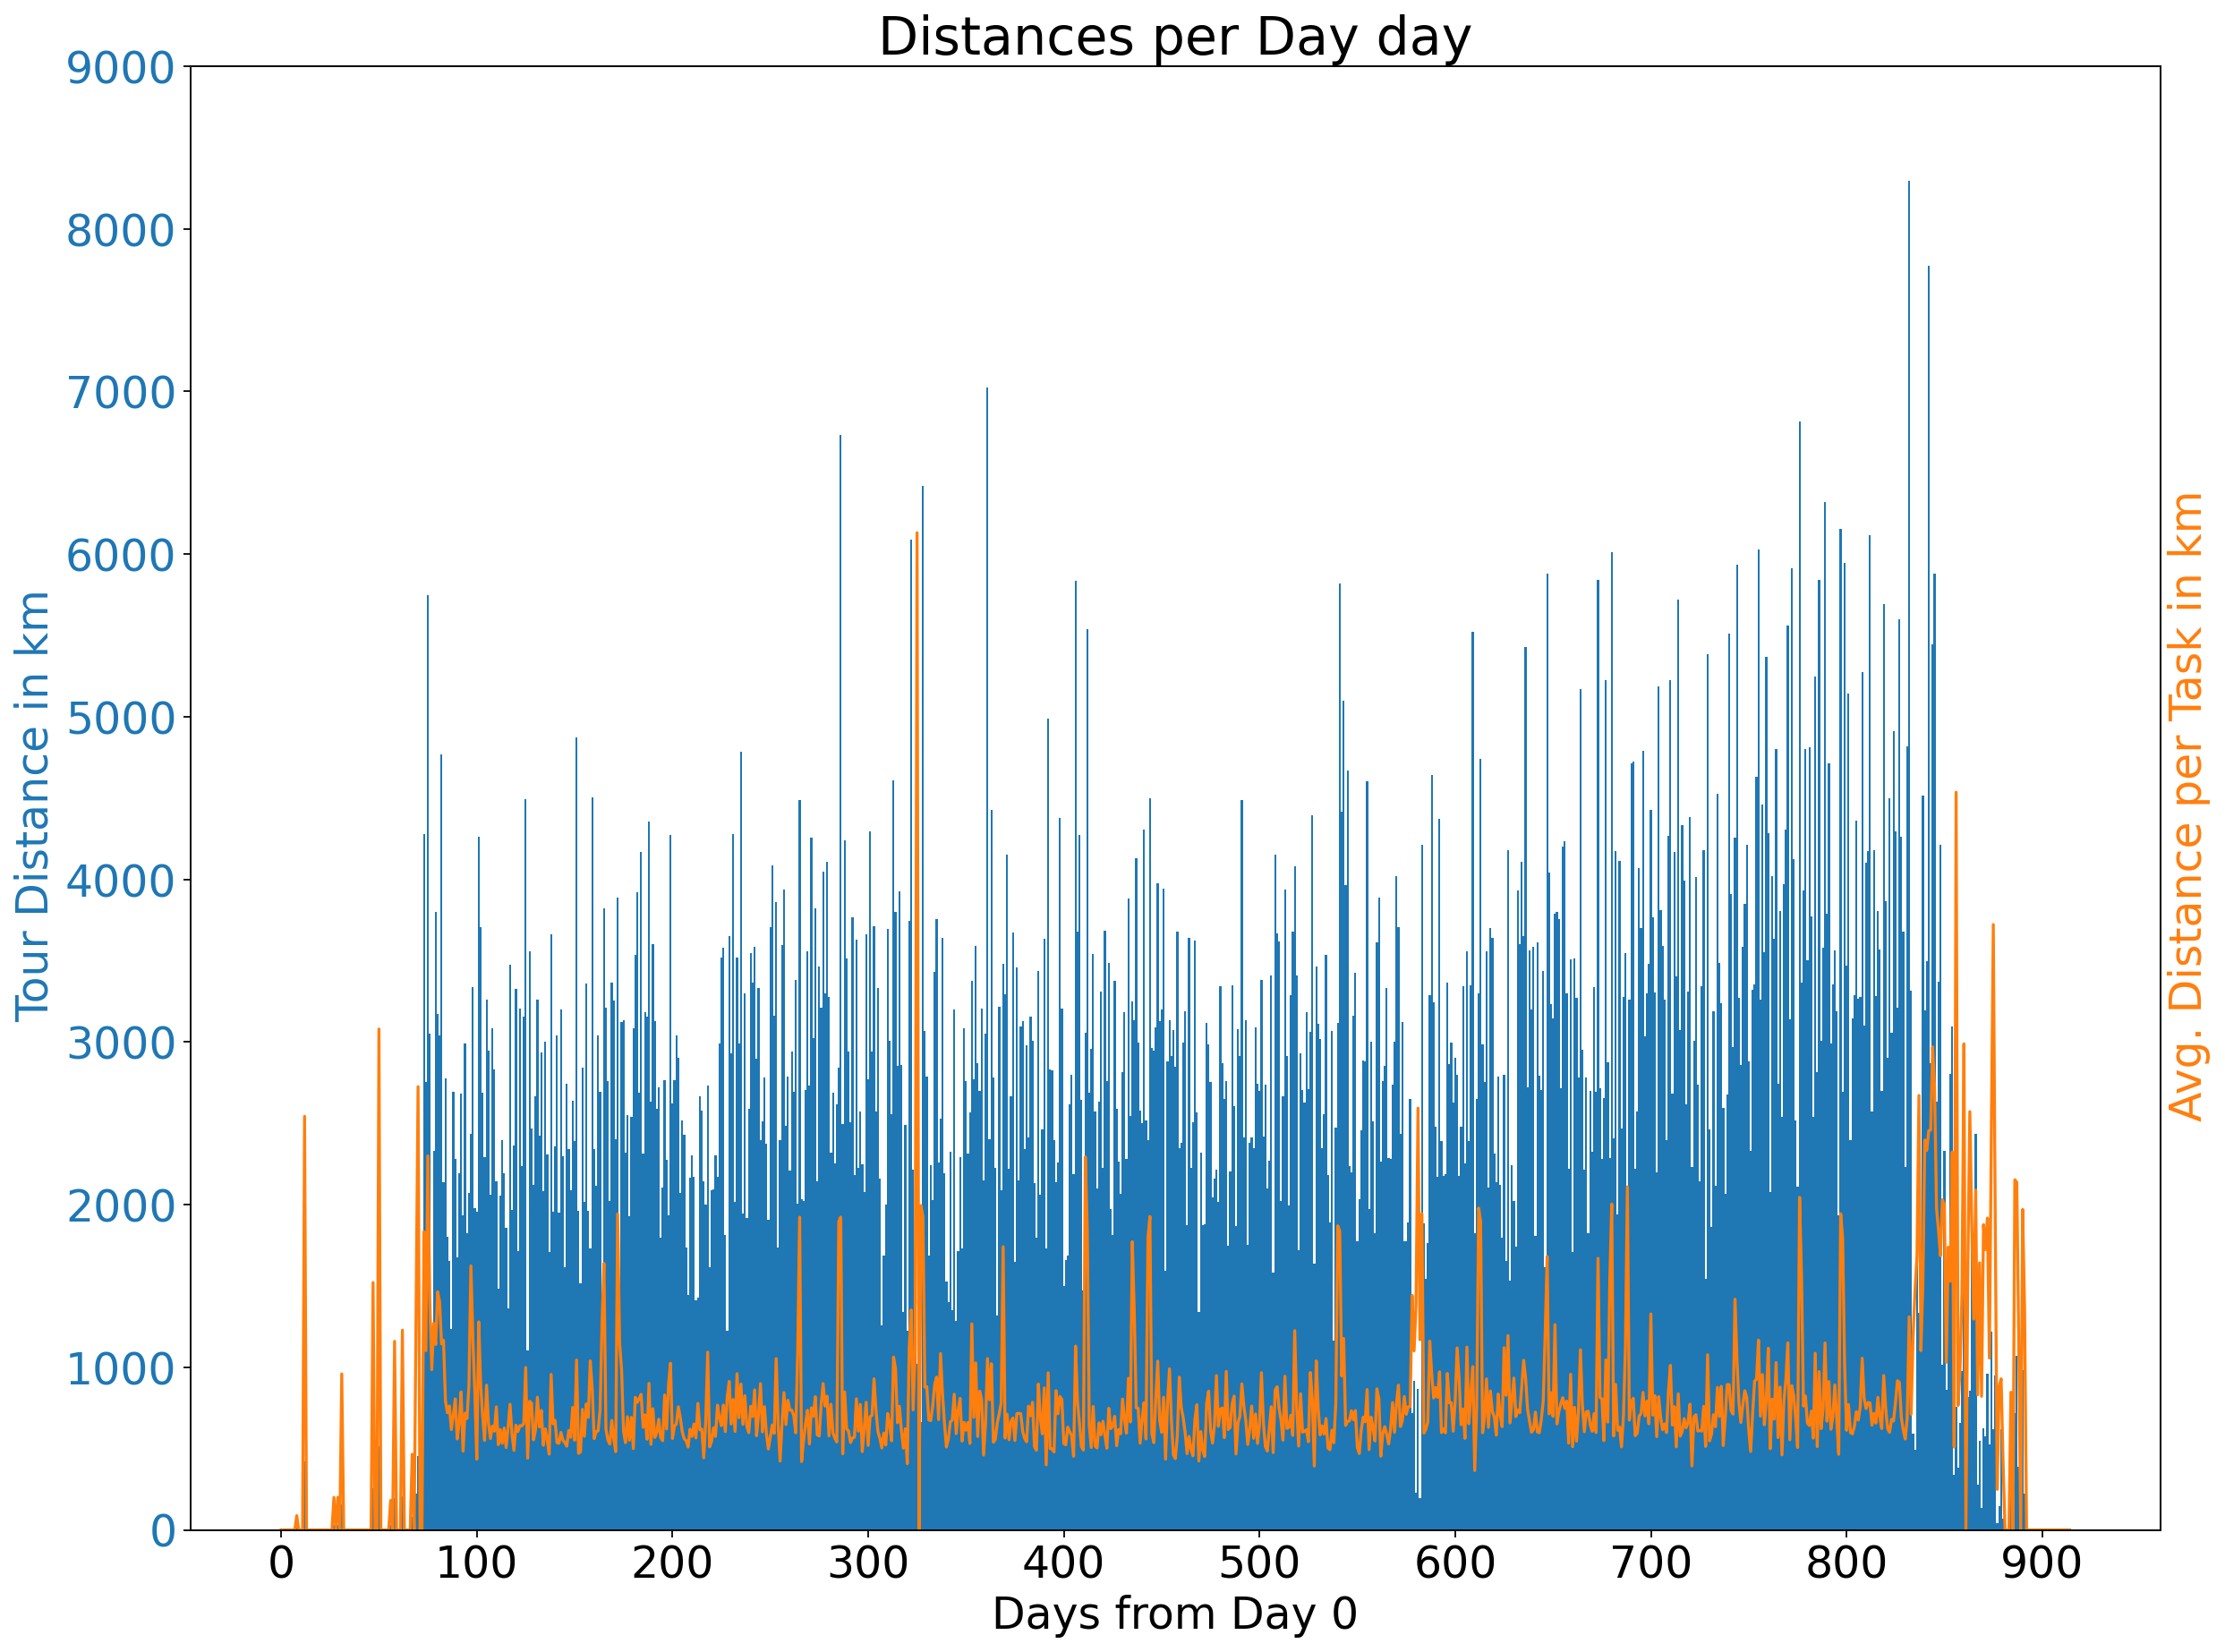

In [11]:
print("start here")
fc.print_log("Start Inital Solution Plot")

#only work with one depot
temp_depot = dict_depots['Neuss']
list_depots = [temp_depot]
dict_depots = {'Neuss': temp_depot}



solution_initial = cl.Solution(temp_depot,dict_tours,list_days)

solution_initial.plot_tasks(50,exp_prefix = img_exp_path + 'solution_inital_')
solution_initial.plot_task_proportion(exp_prefix = img_exp_path + 'solution_inital_')
solution_initial.plot_distances(10000,1500,exp_prefix = img_exp_path + 'solution_inital_')

fc.print_log("Done with  Inital Solution Plot")


After having a look at the inital solution, start optimizing

Stage 1: Try to level out the proportions between dropoff and pickup on eatch job

Start with Stage 1a- t: 10:21:21
Start Random Moves- t: 10:21:21
logging at 1- t: 10:21:21 0                                  
logging at 501- t: 10:22:21 216                                  
logging at 1001- t: 10:23:22 387                                  
logging at 1501- t: 10:24:25 573                                  
logging at 2001- t: 10:25:25 739                                  
logging at 2501- t: 10:26:27 878                                  
logging at 3001- t: 10:27:28 1034                                  
logging at 3501- t: 10:28:29 1180                                  
logging at 4001- t: 10:29:31 1322                                  
logging at 4501- t: 10:30:33 1445                                  
Final: Loop: 5000 - Moves: 1564- t: 10:31:33                       
Done with Moves- t: 10:31:33
Done with Stage 1a- t: 10:33:00


C:\Users\Nutzer\Documents\GitHub\rrp_simulated_annealing\classes\classes.py:212: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(num=None, figsize=(16, 12), dpi=160, facecolor='w', edgecolor='k')
C:\Users\Nutzer\Documents\GitHub\rrp_simulated_annealing\classes\classes.py:276: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(exp_prefix + 'plot_task_proportion.png')
C:\Users\Nutzer\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


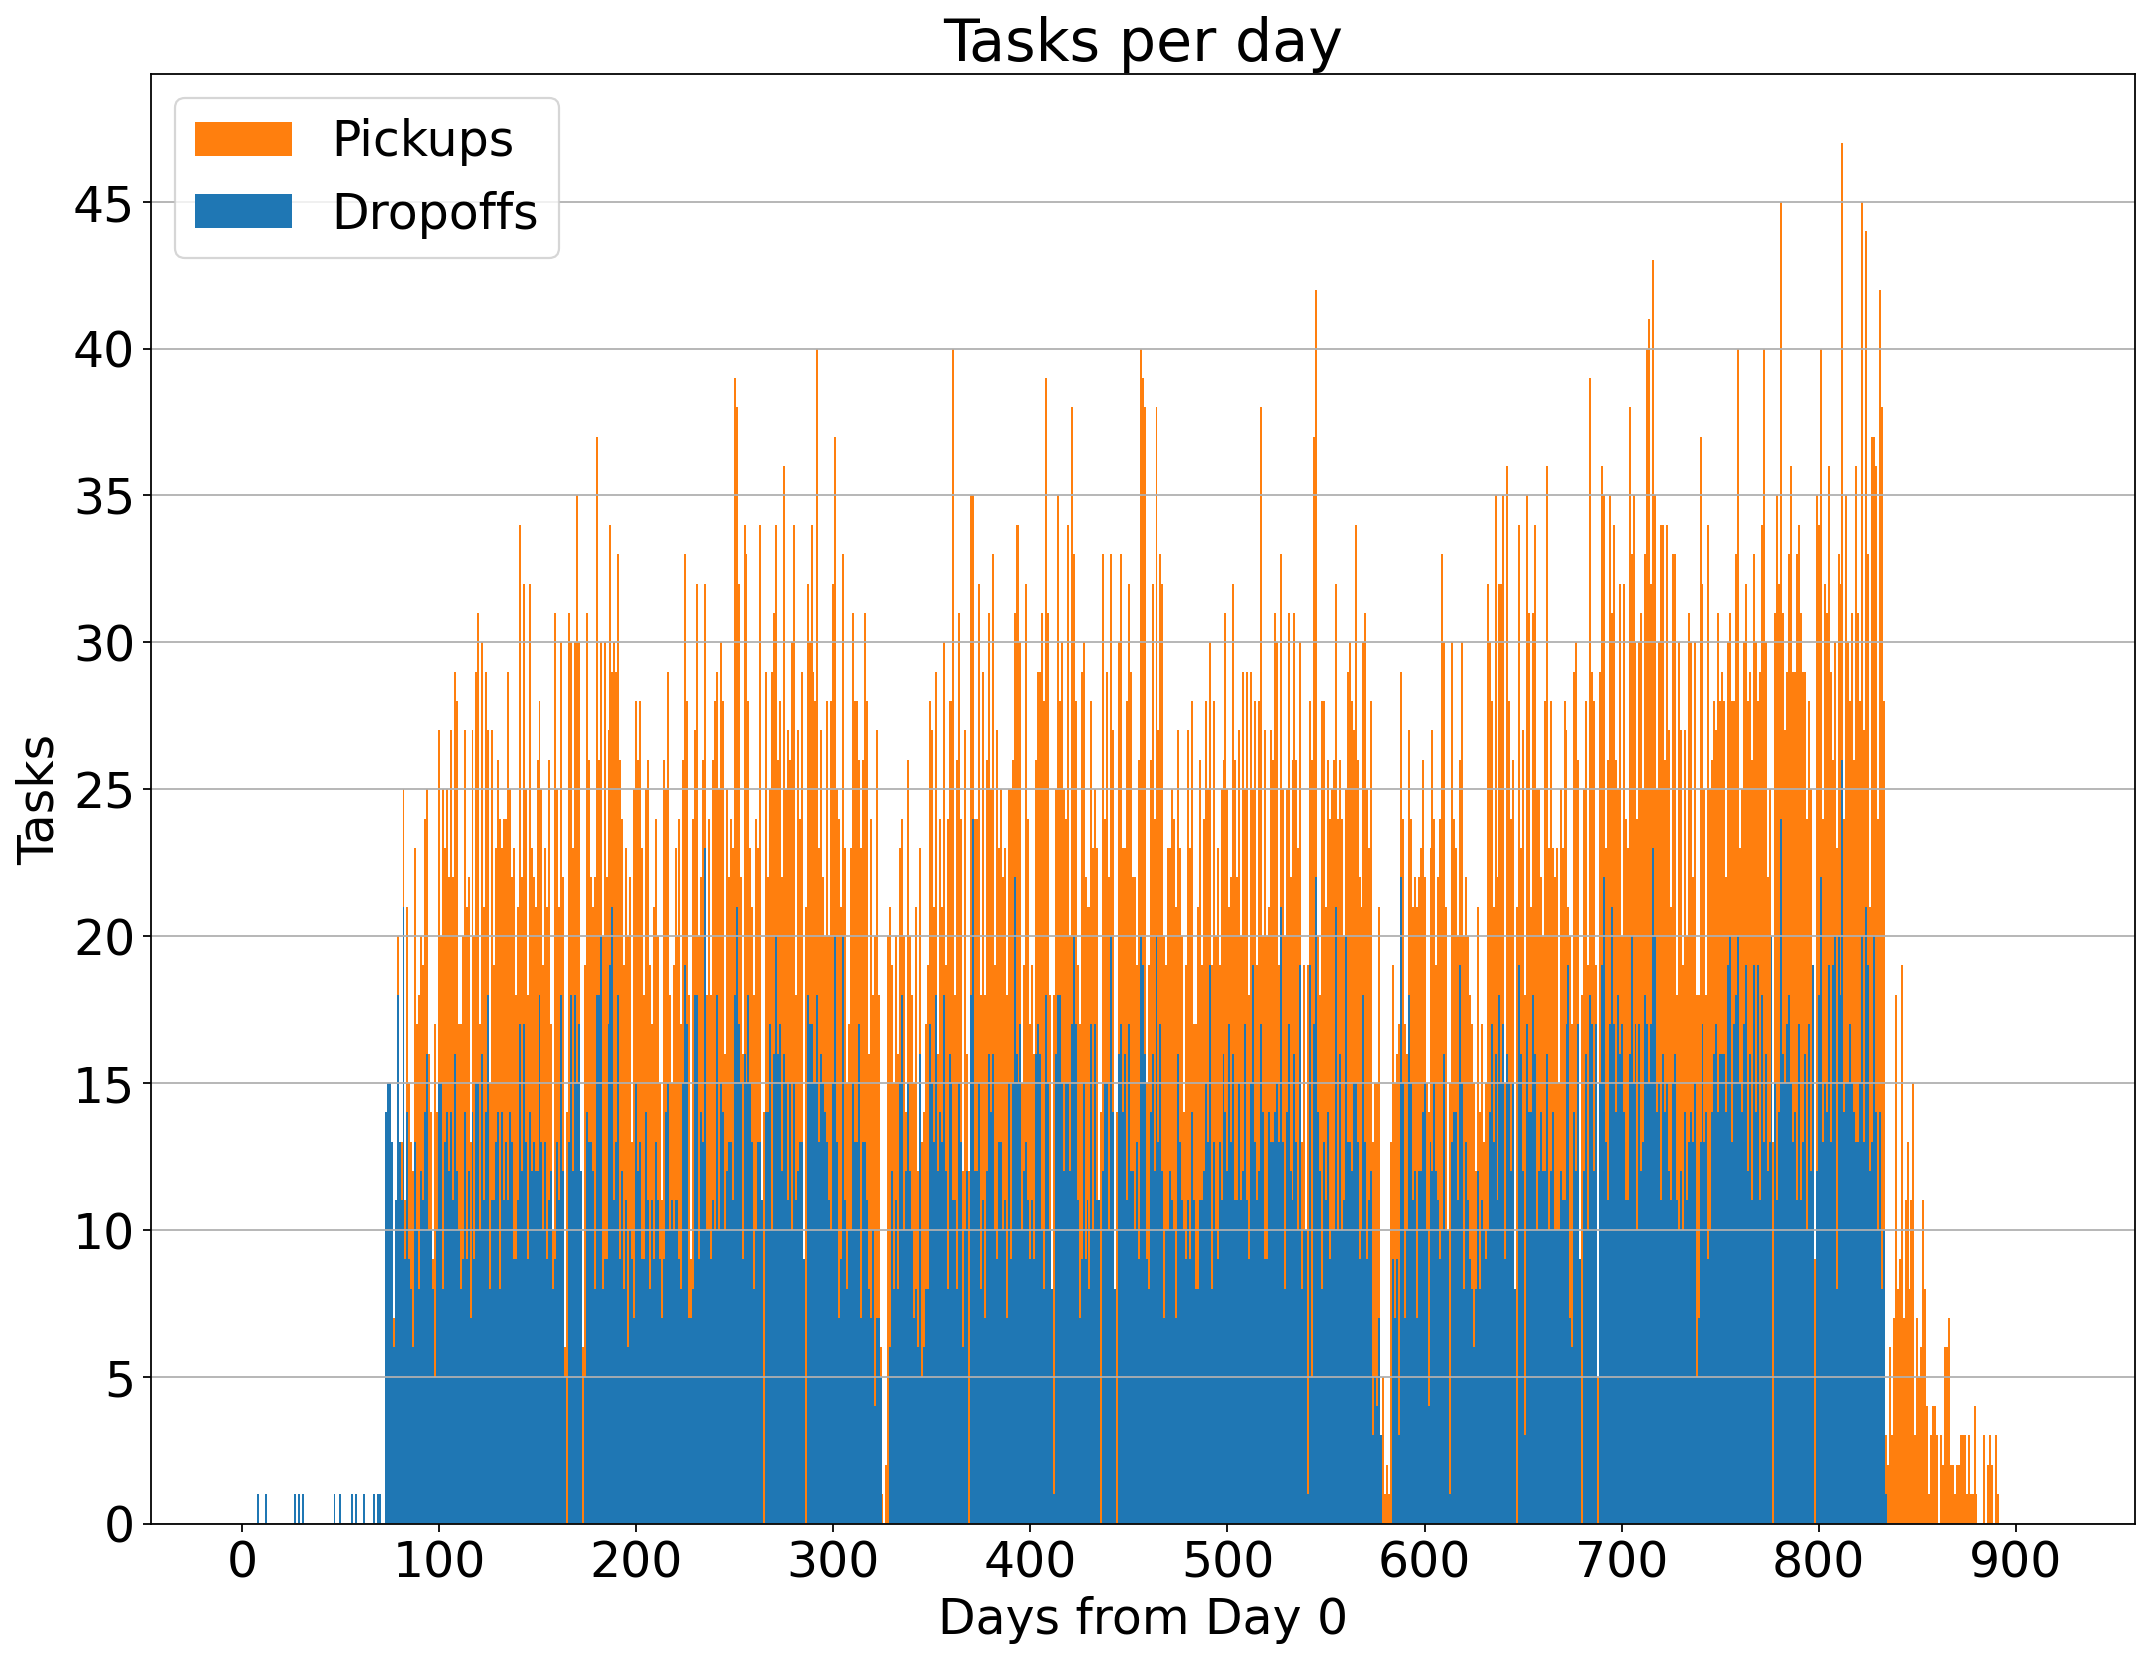

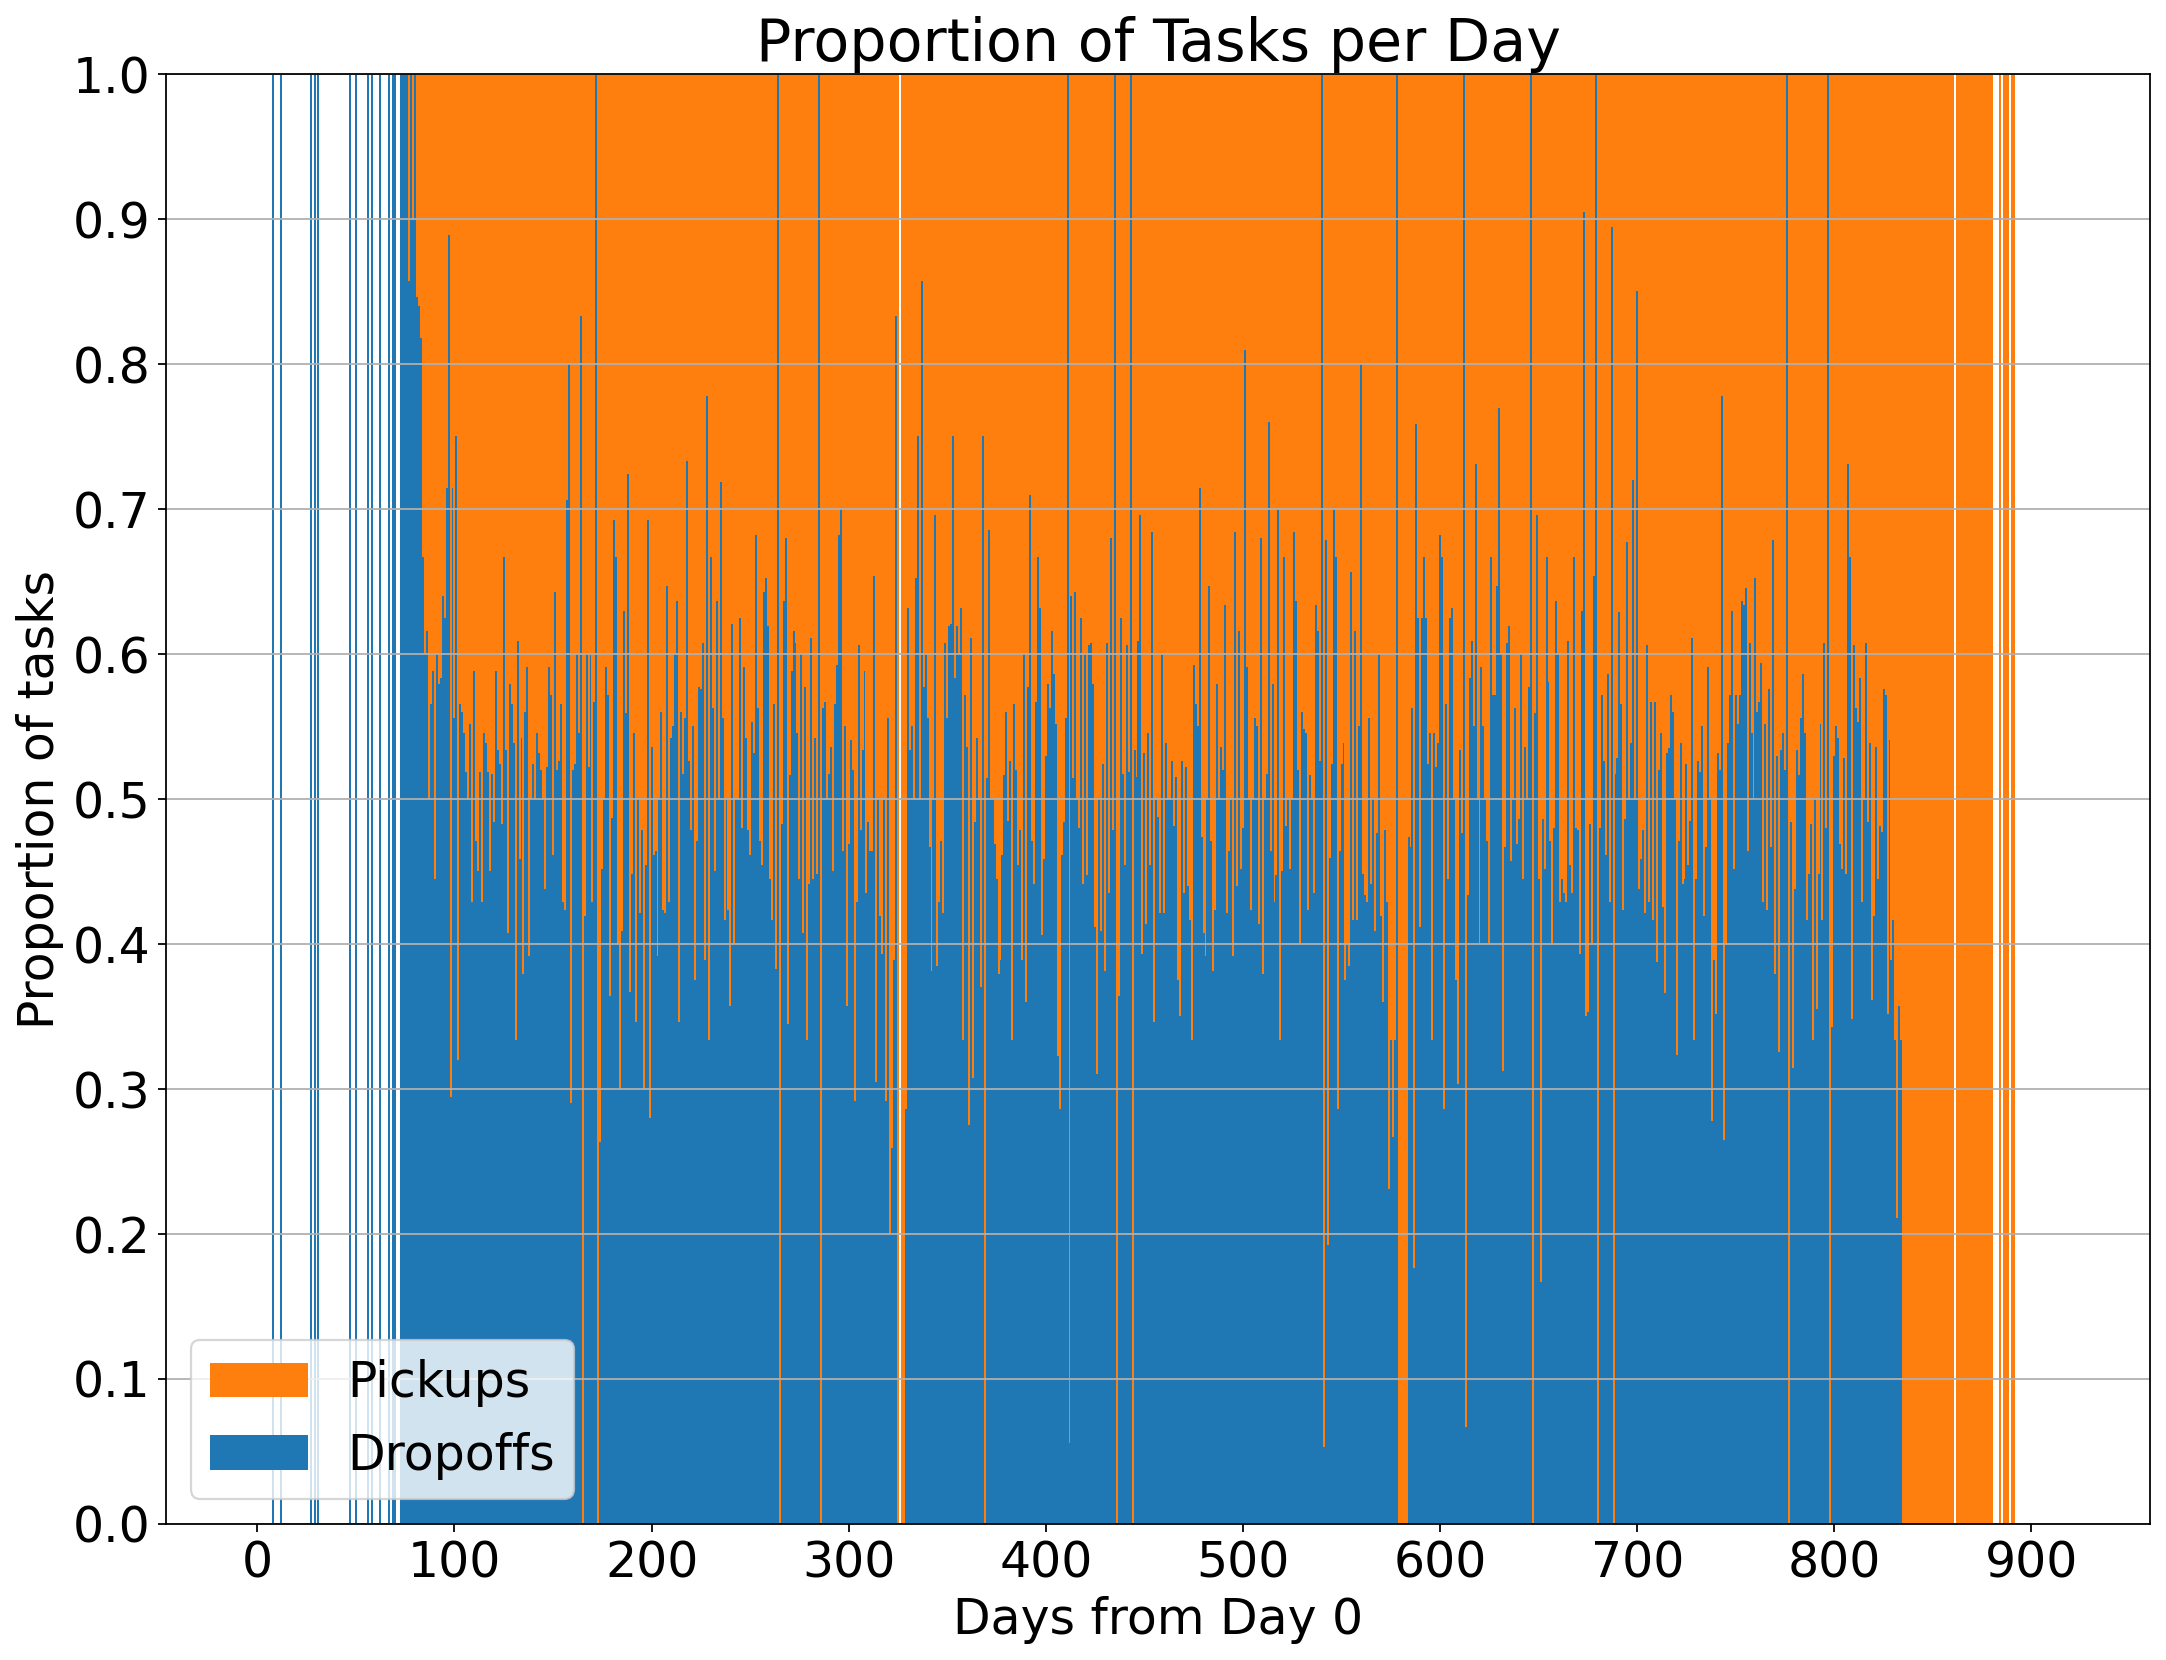

<Figure size 2560x1920 with 0 Axes>

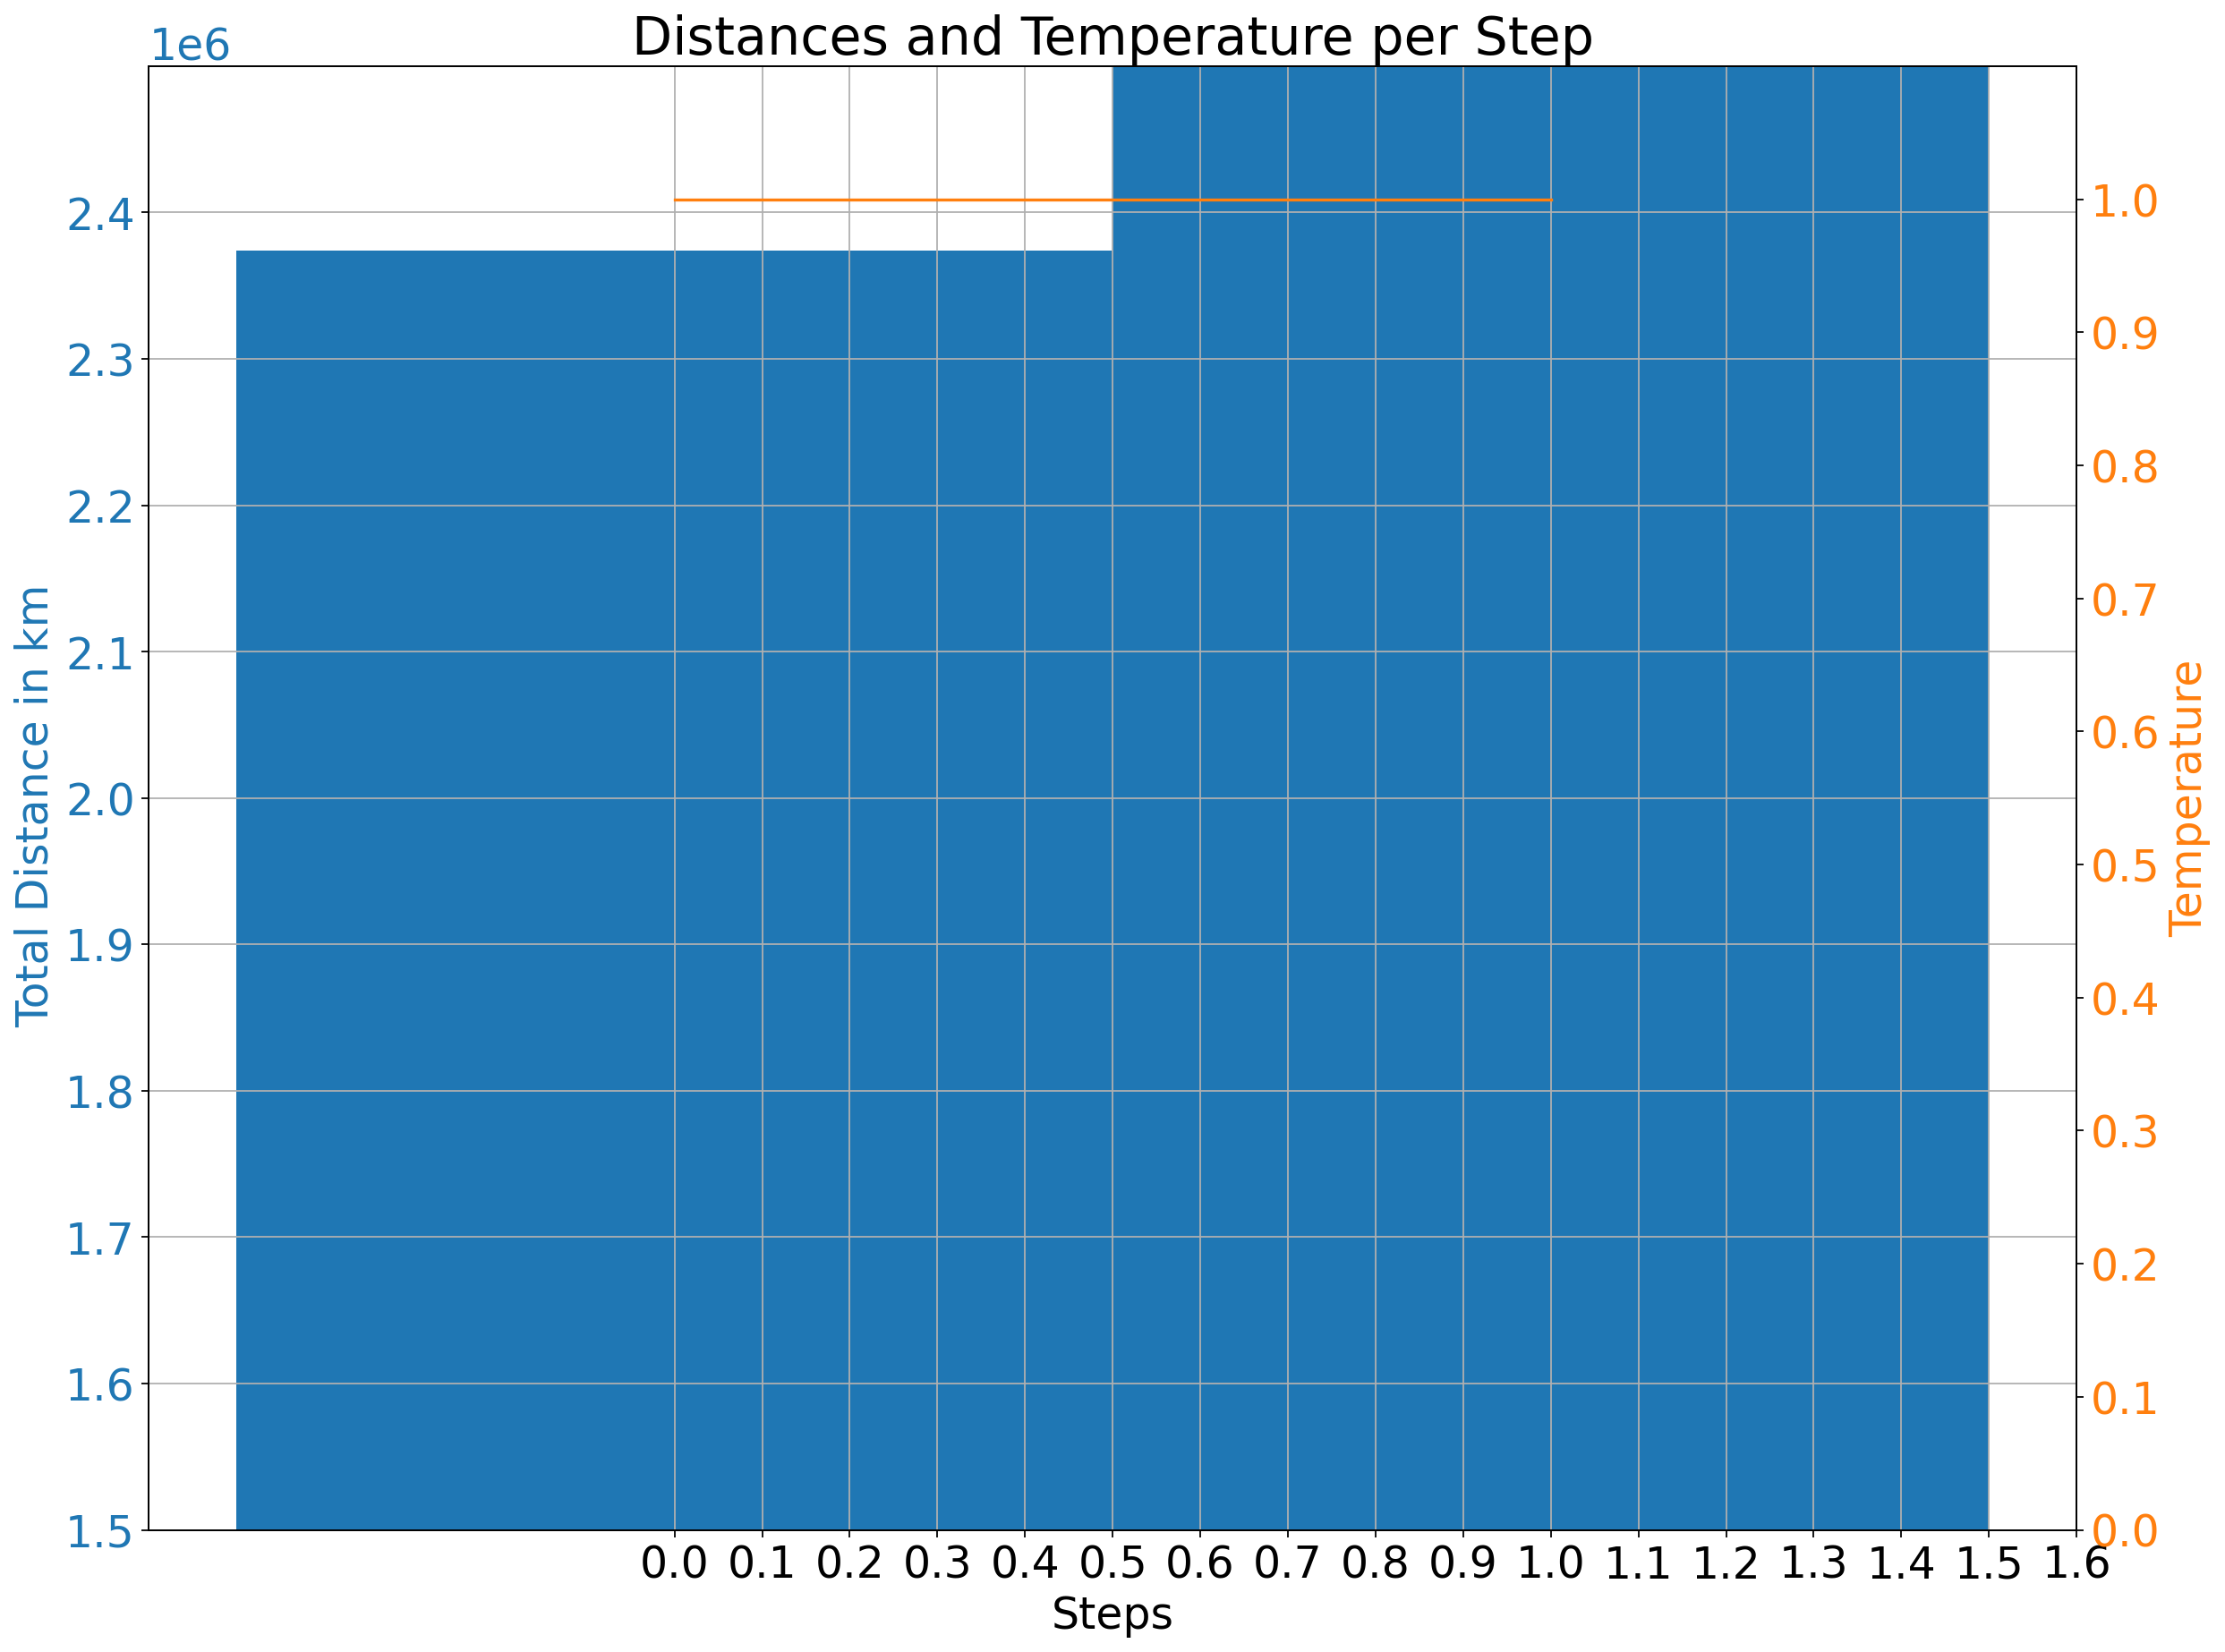

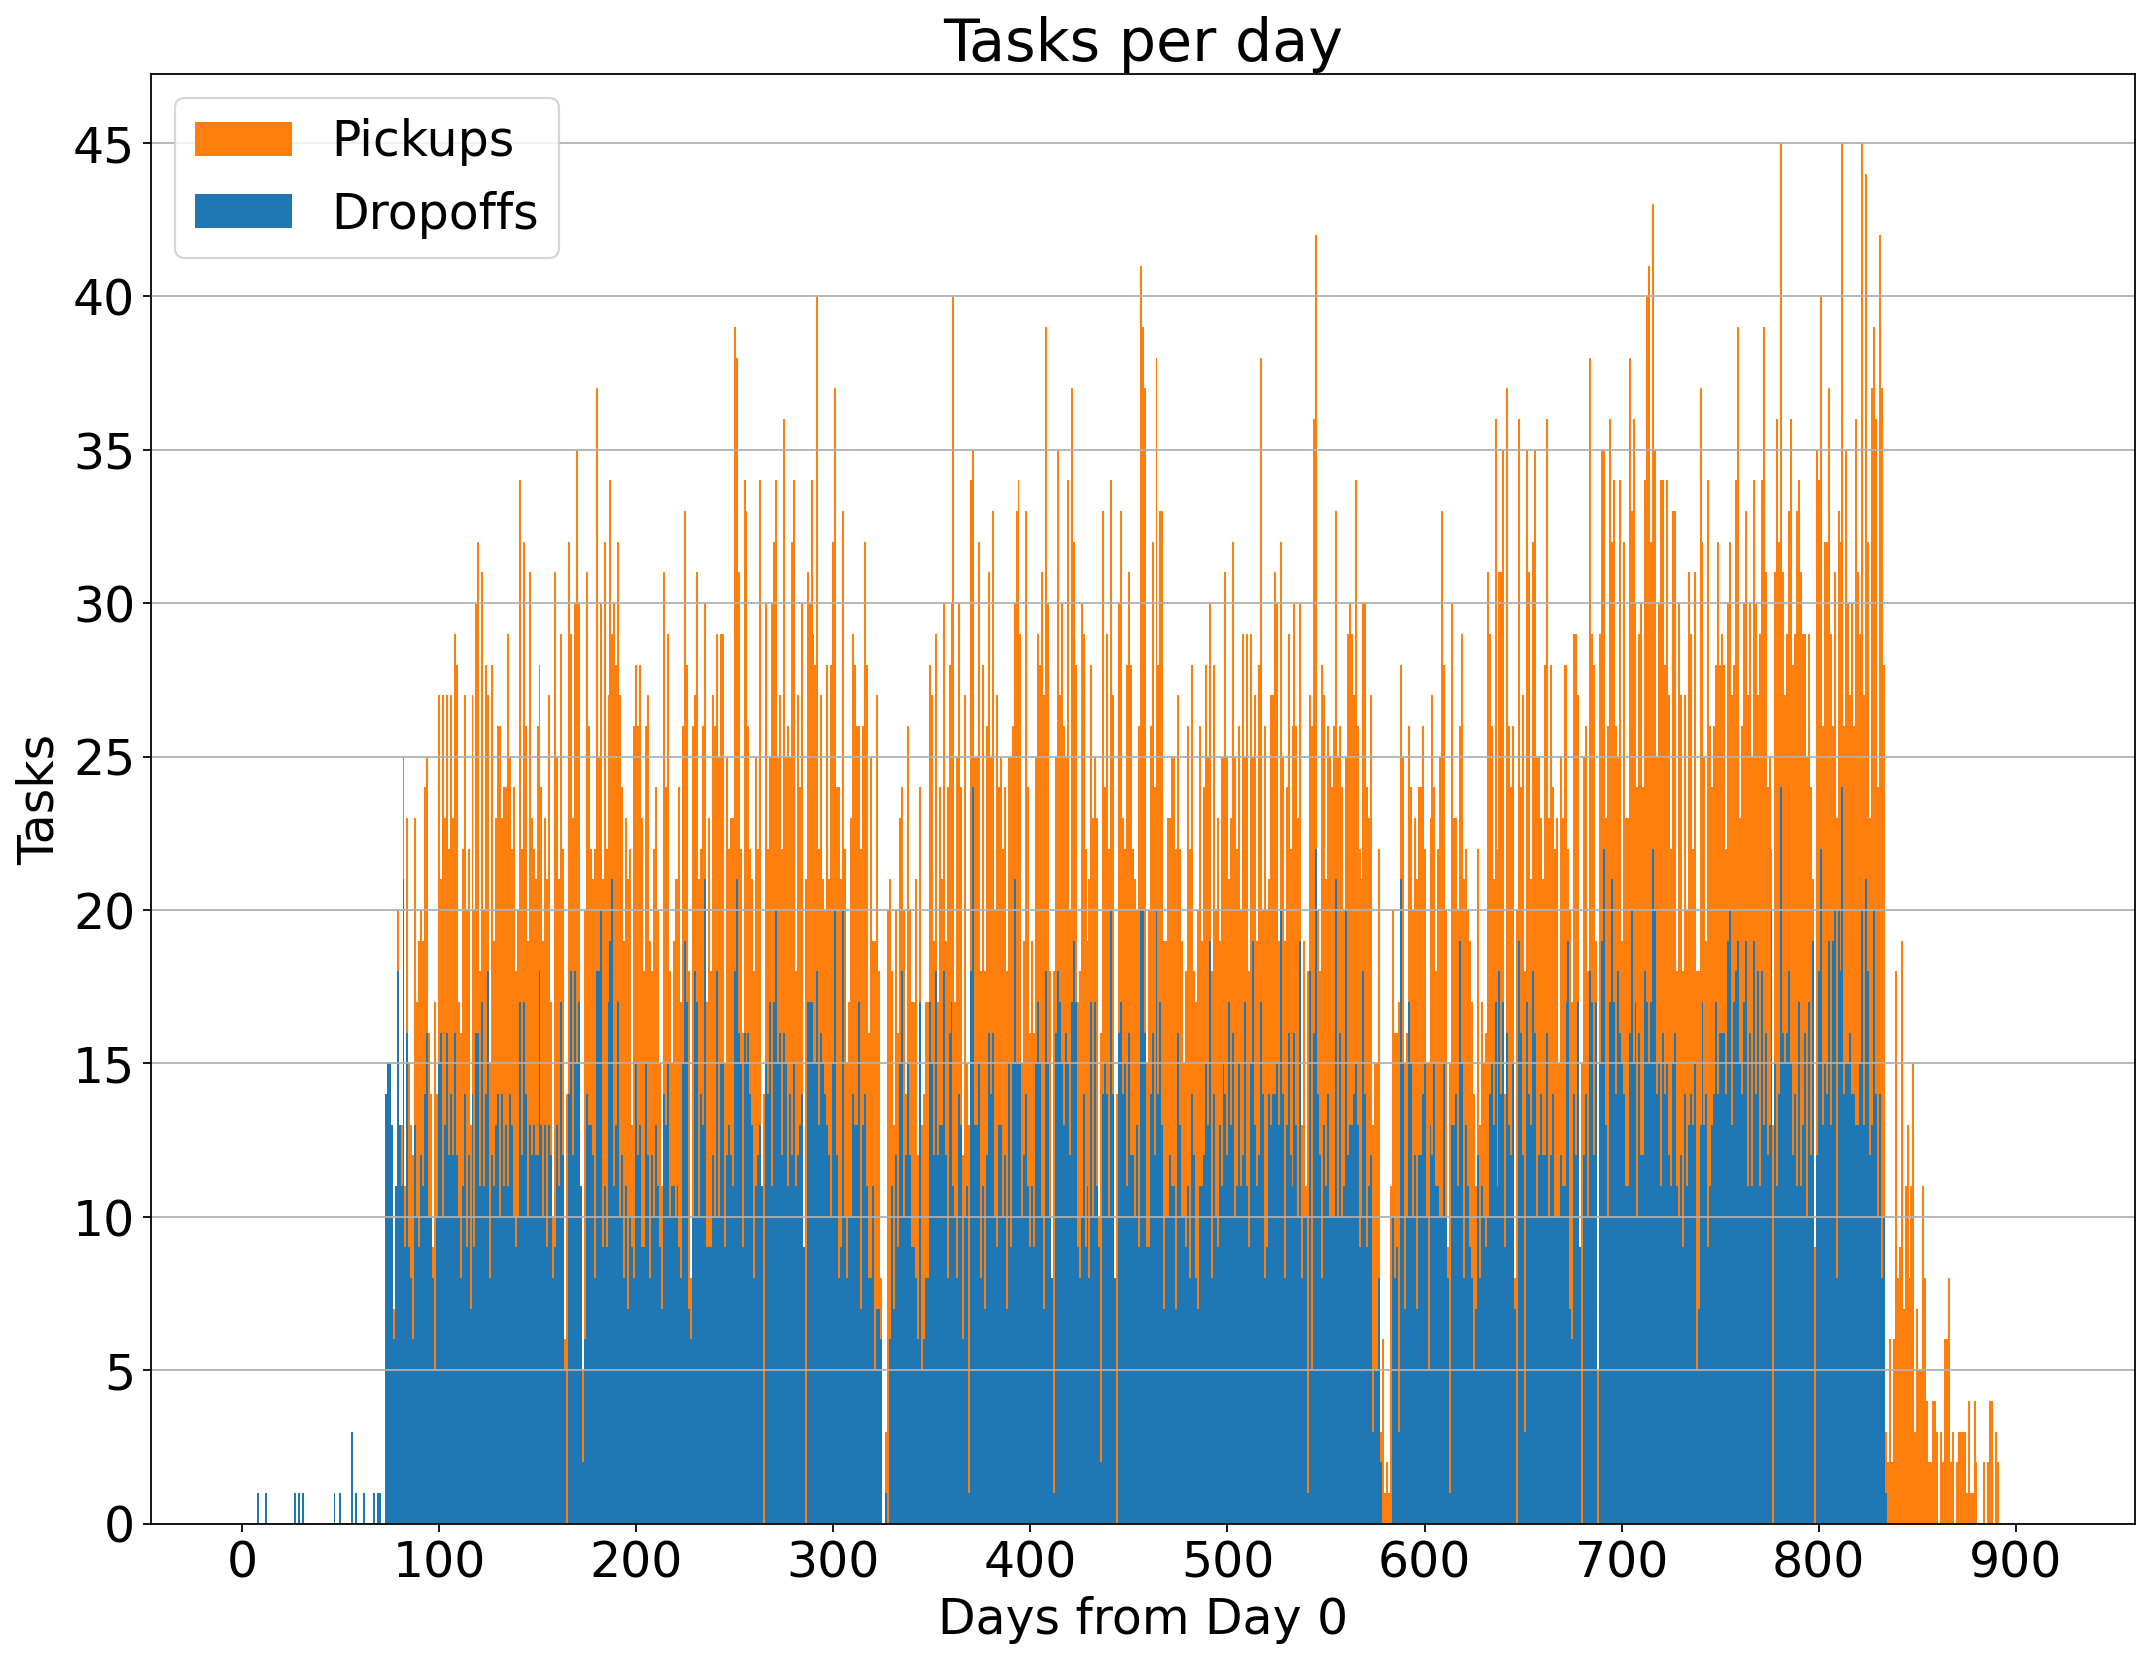

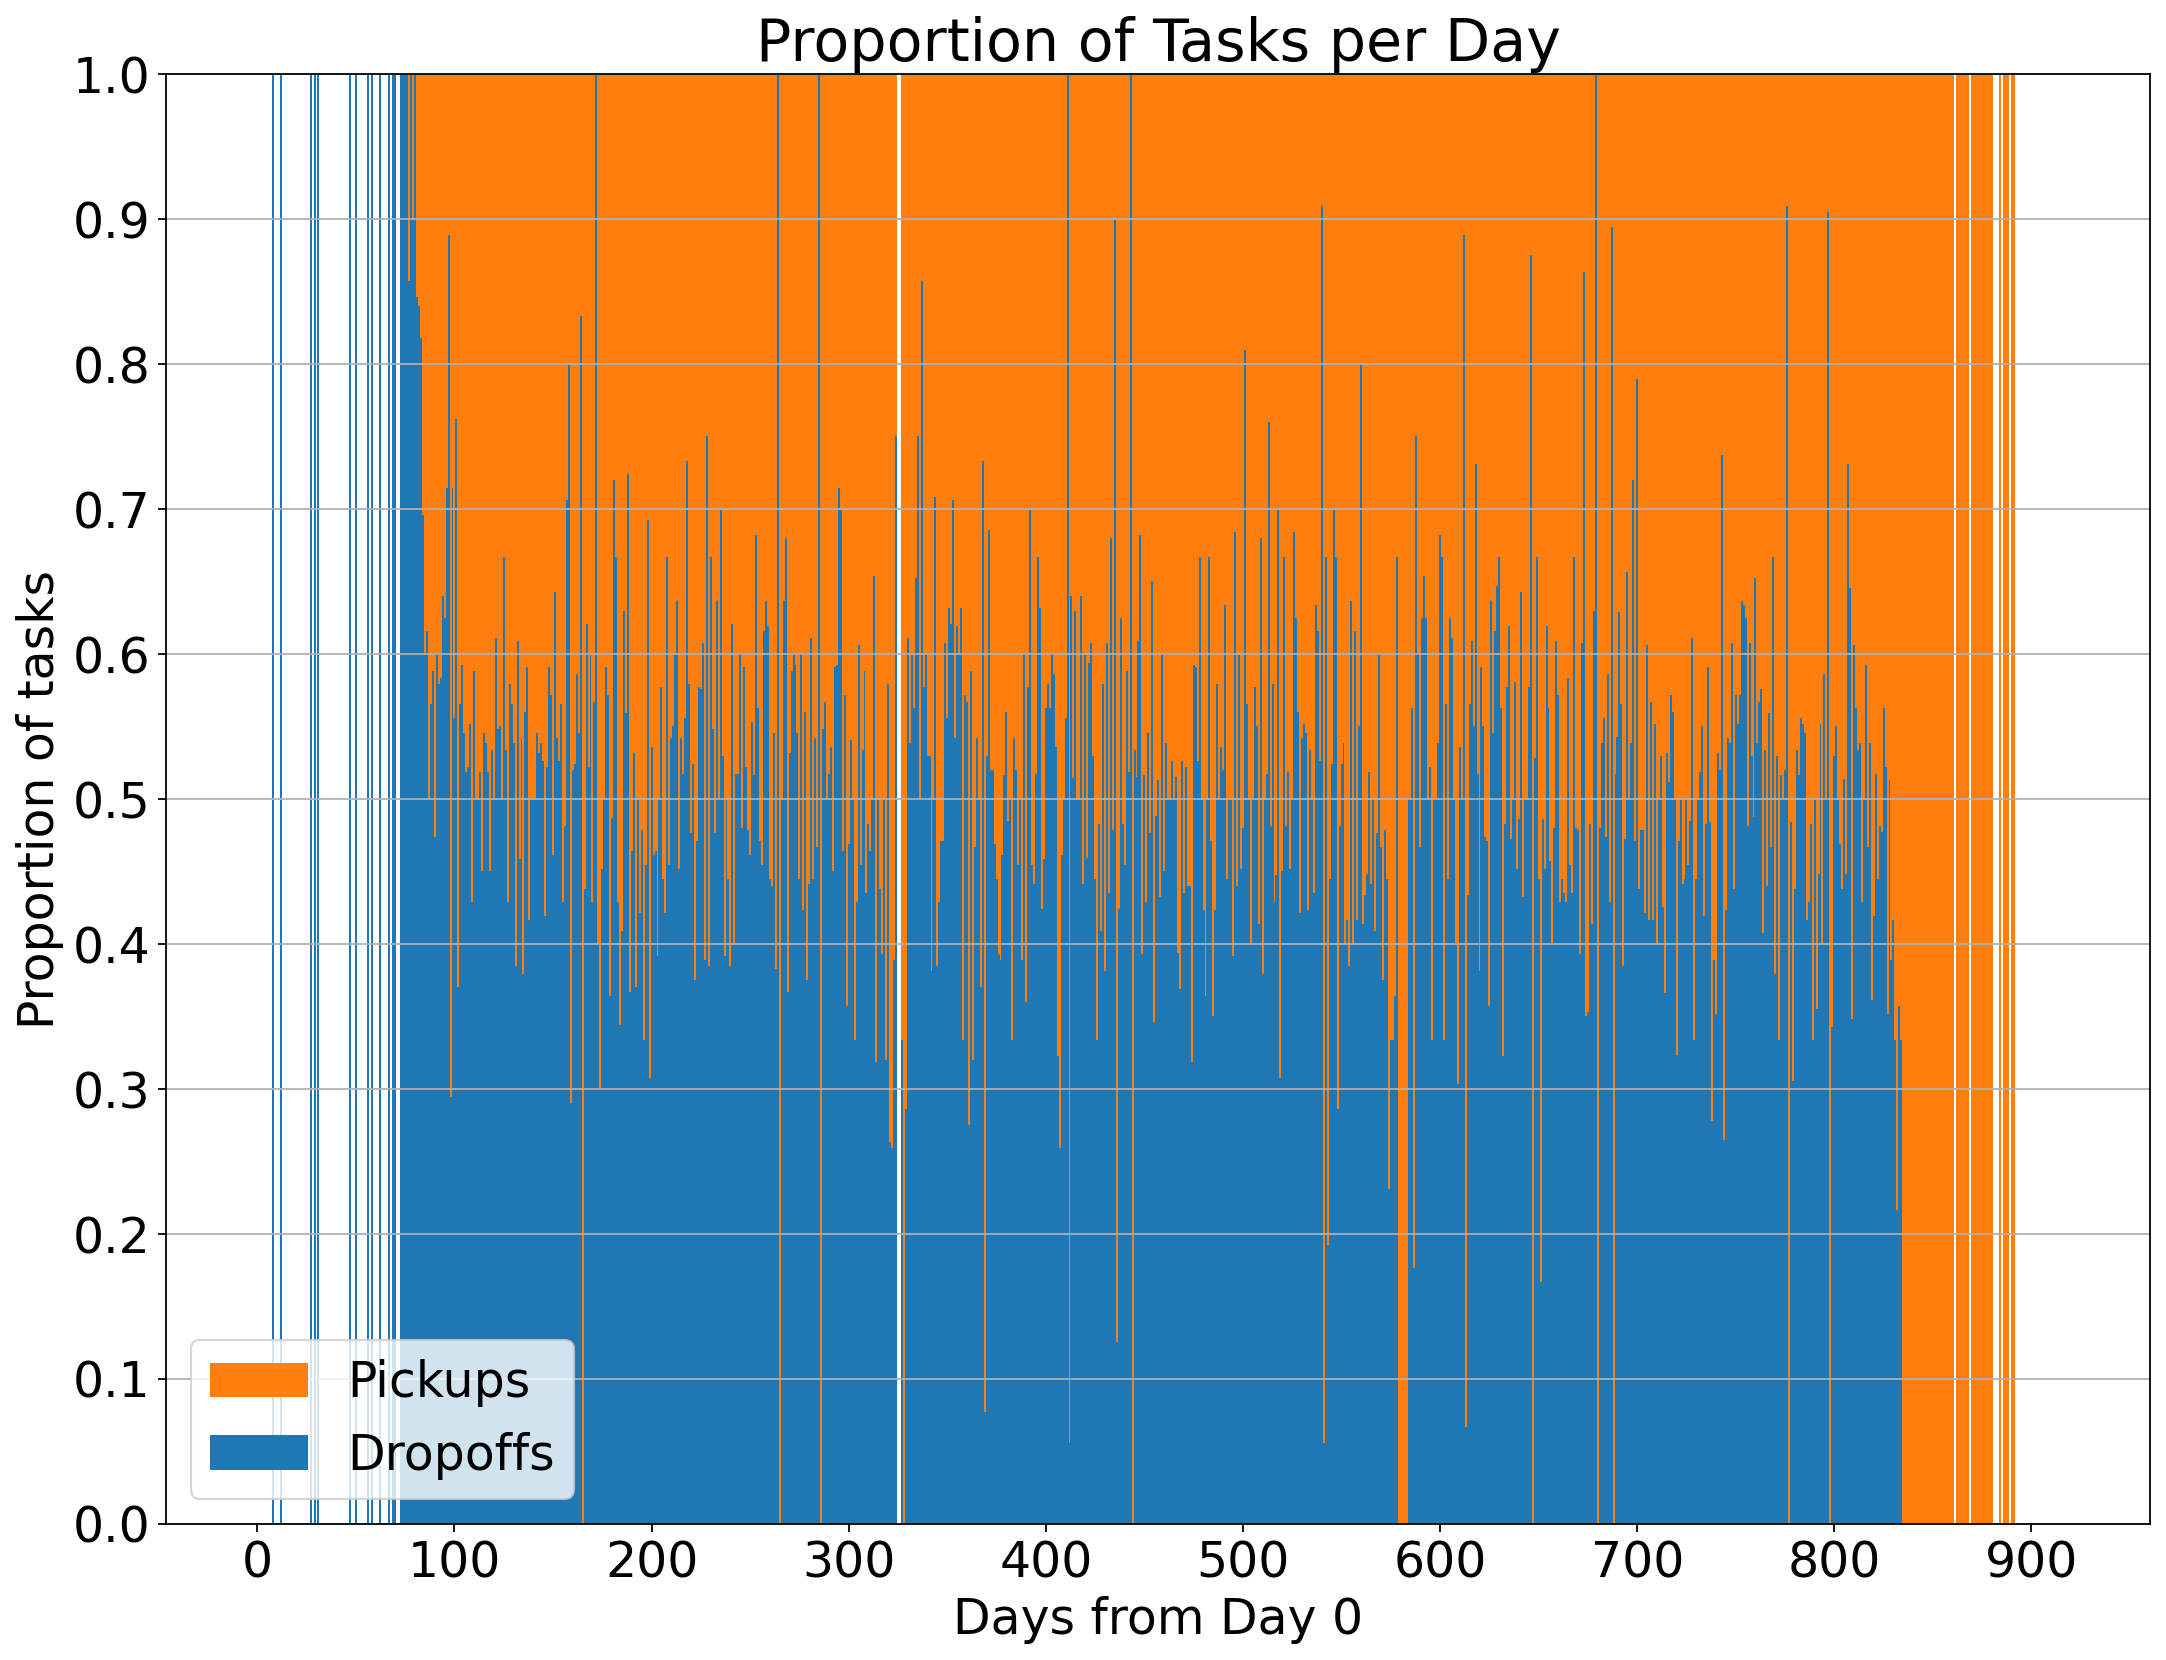

<Figure size 2560x1920 with 0 Axes>

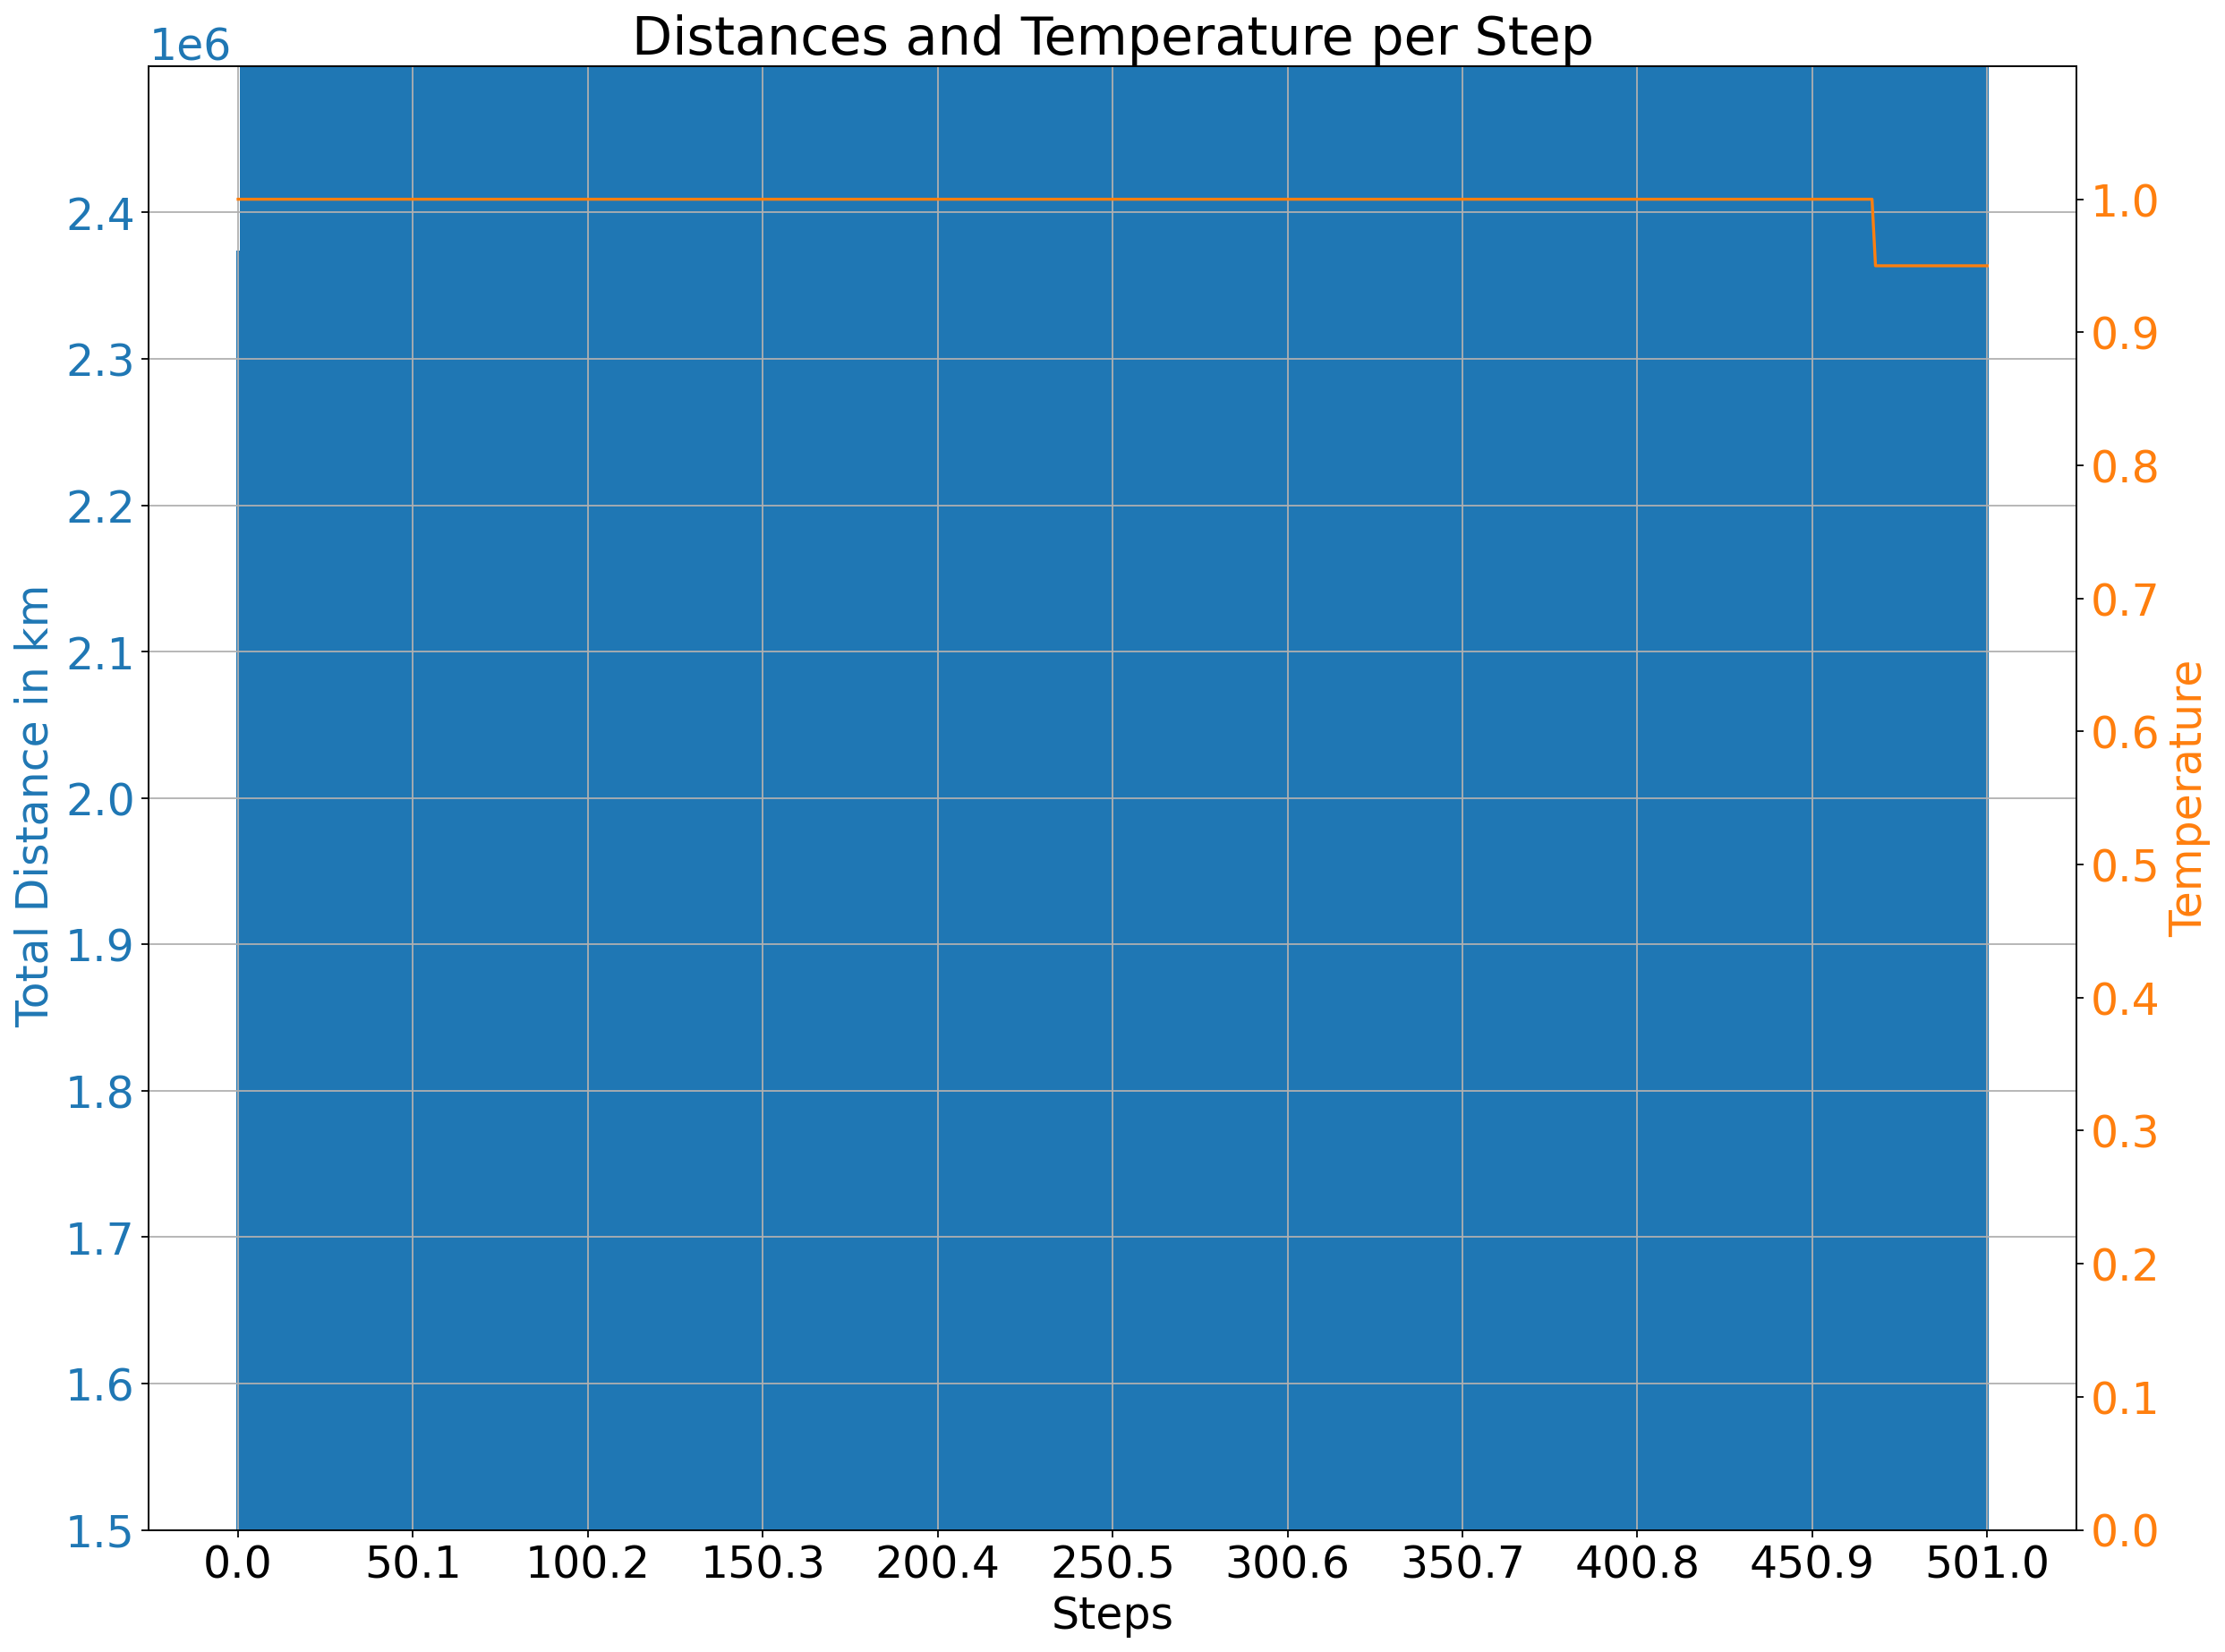

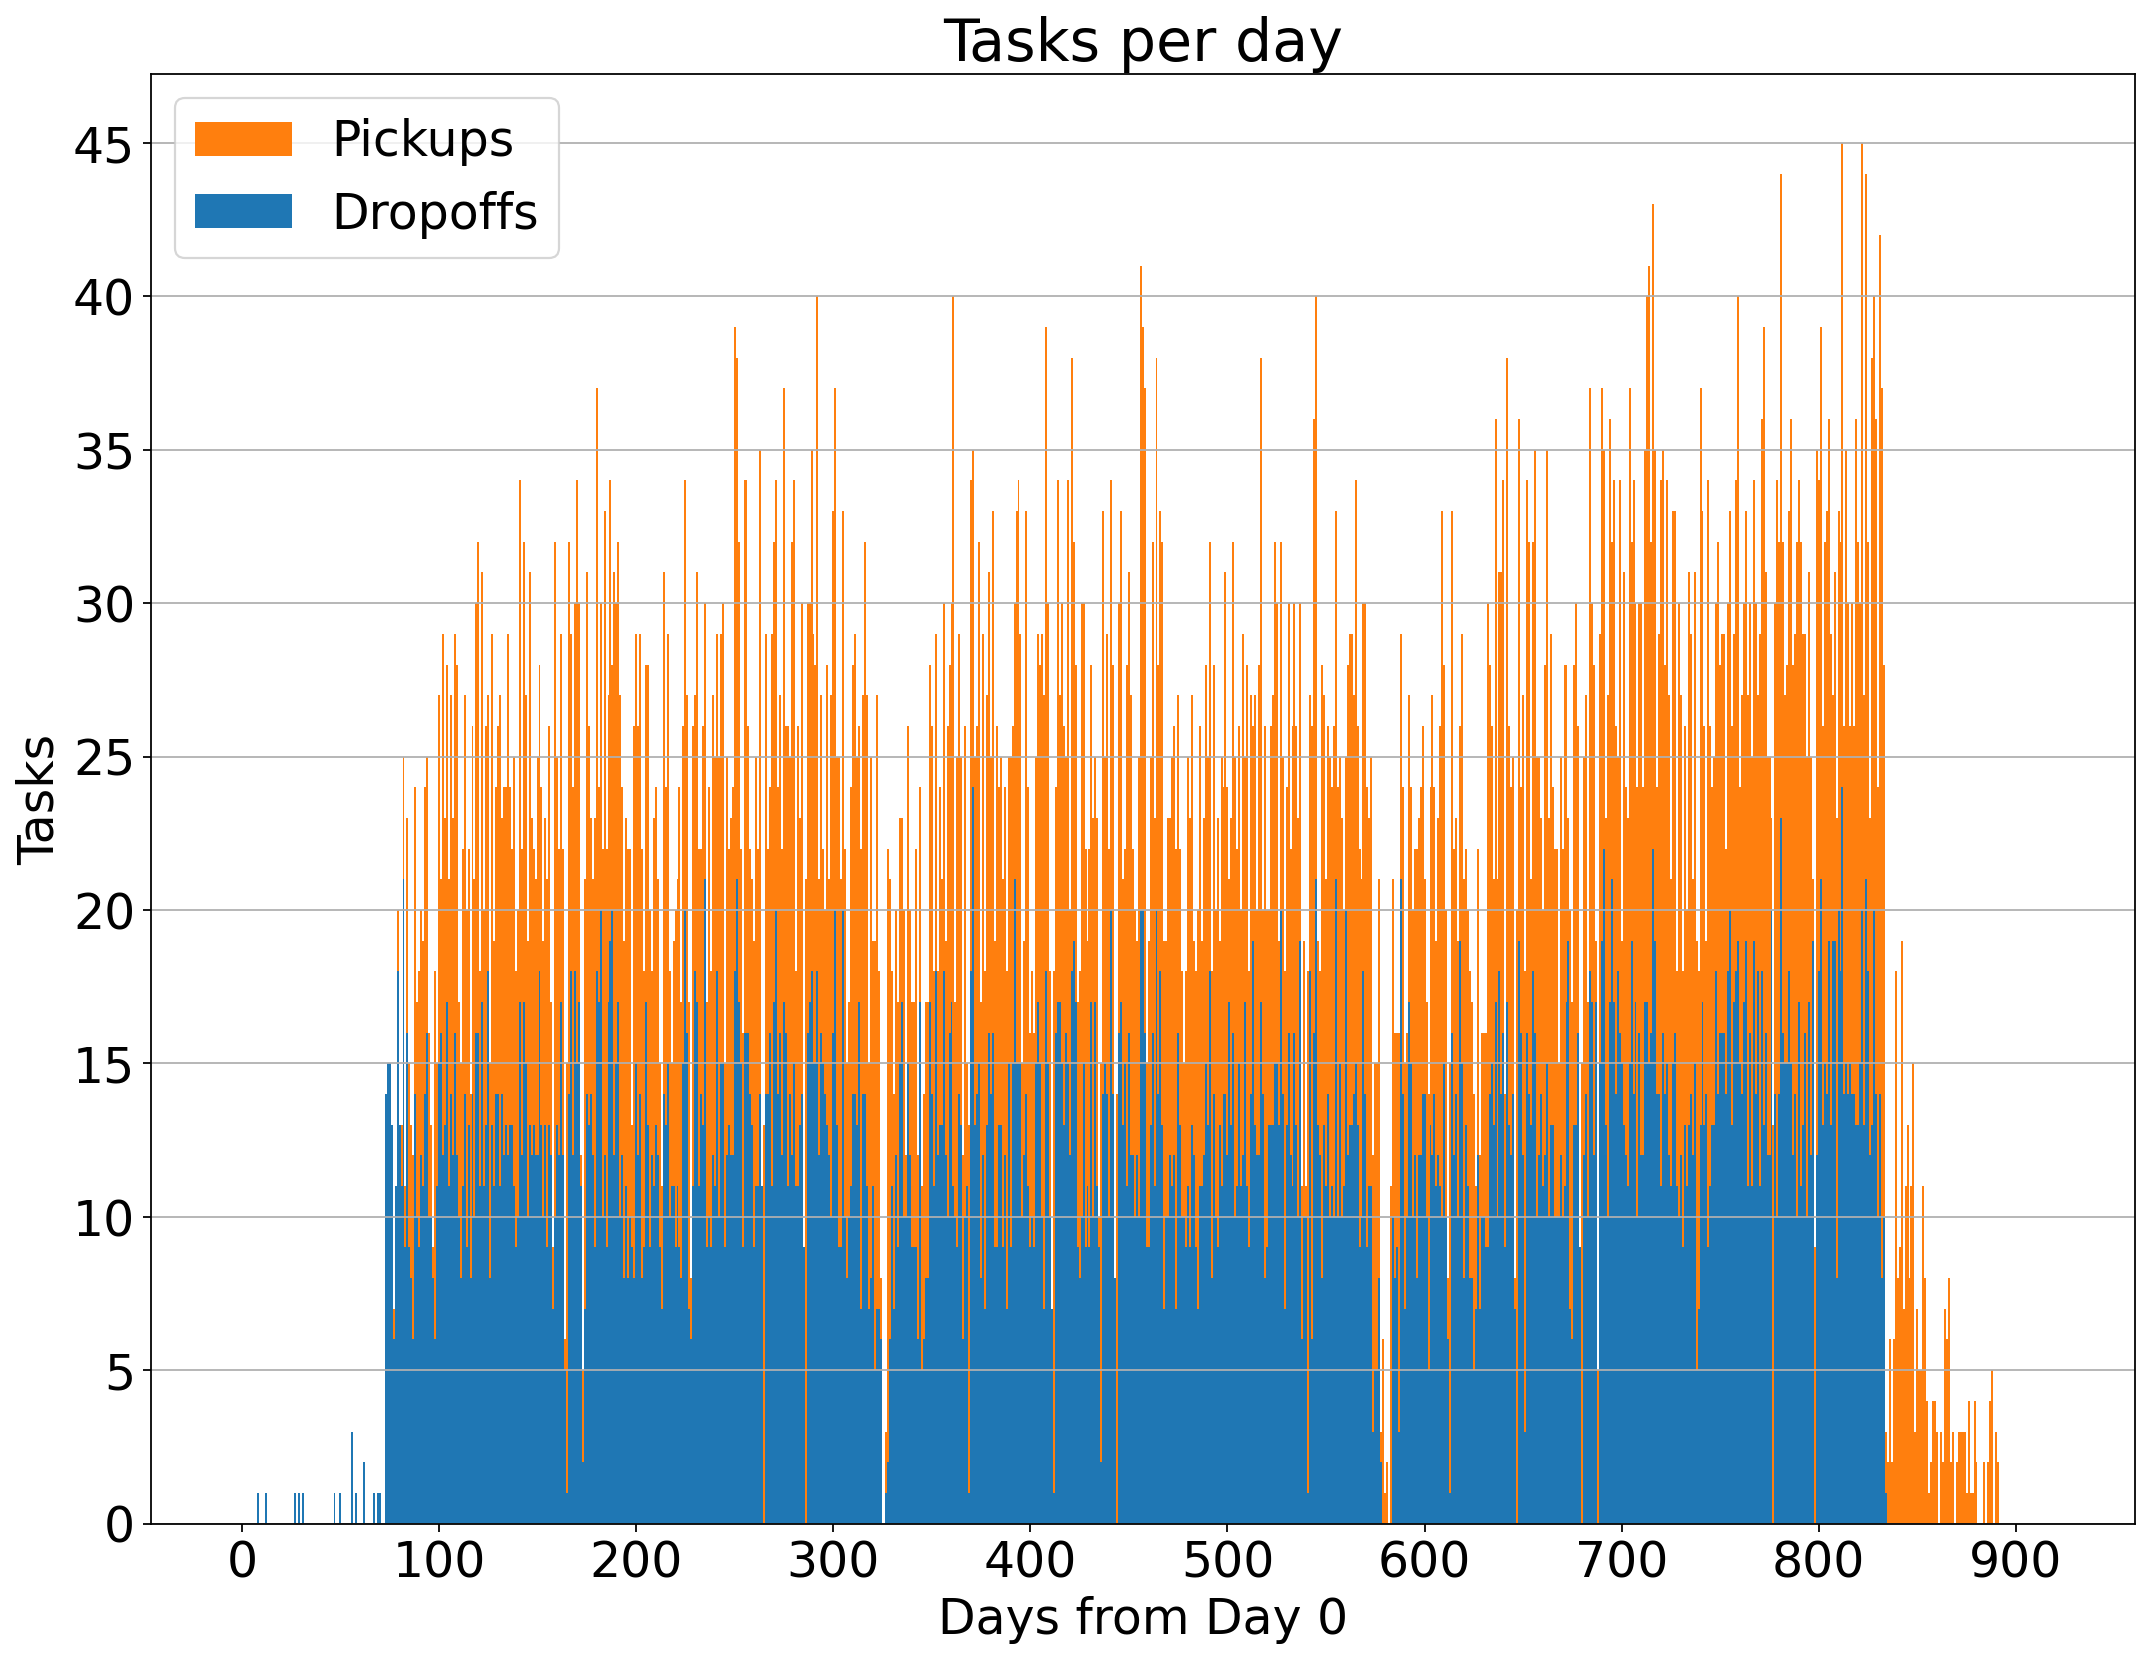

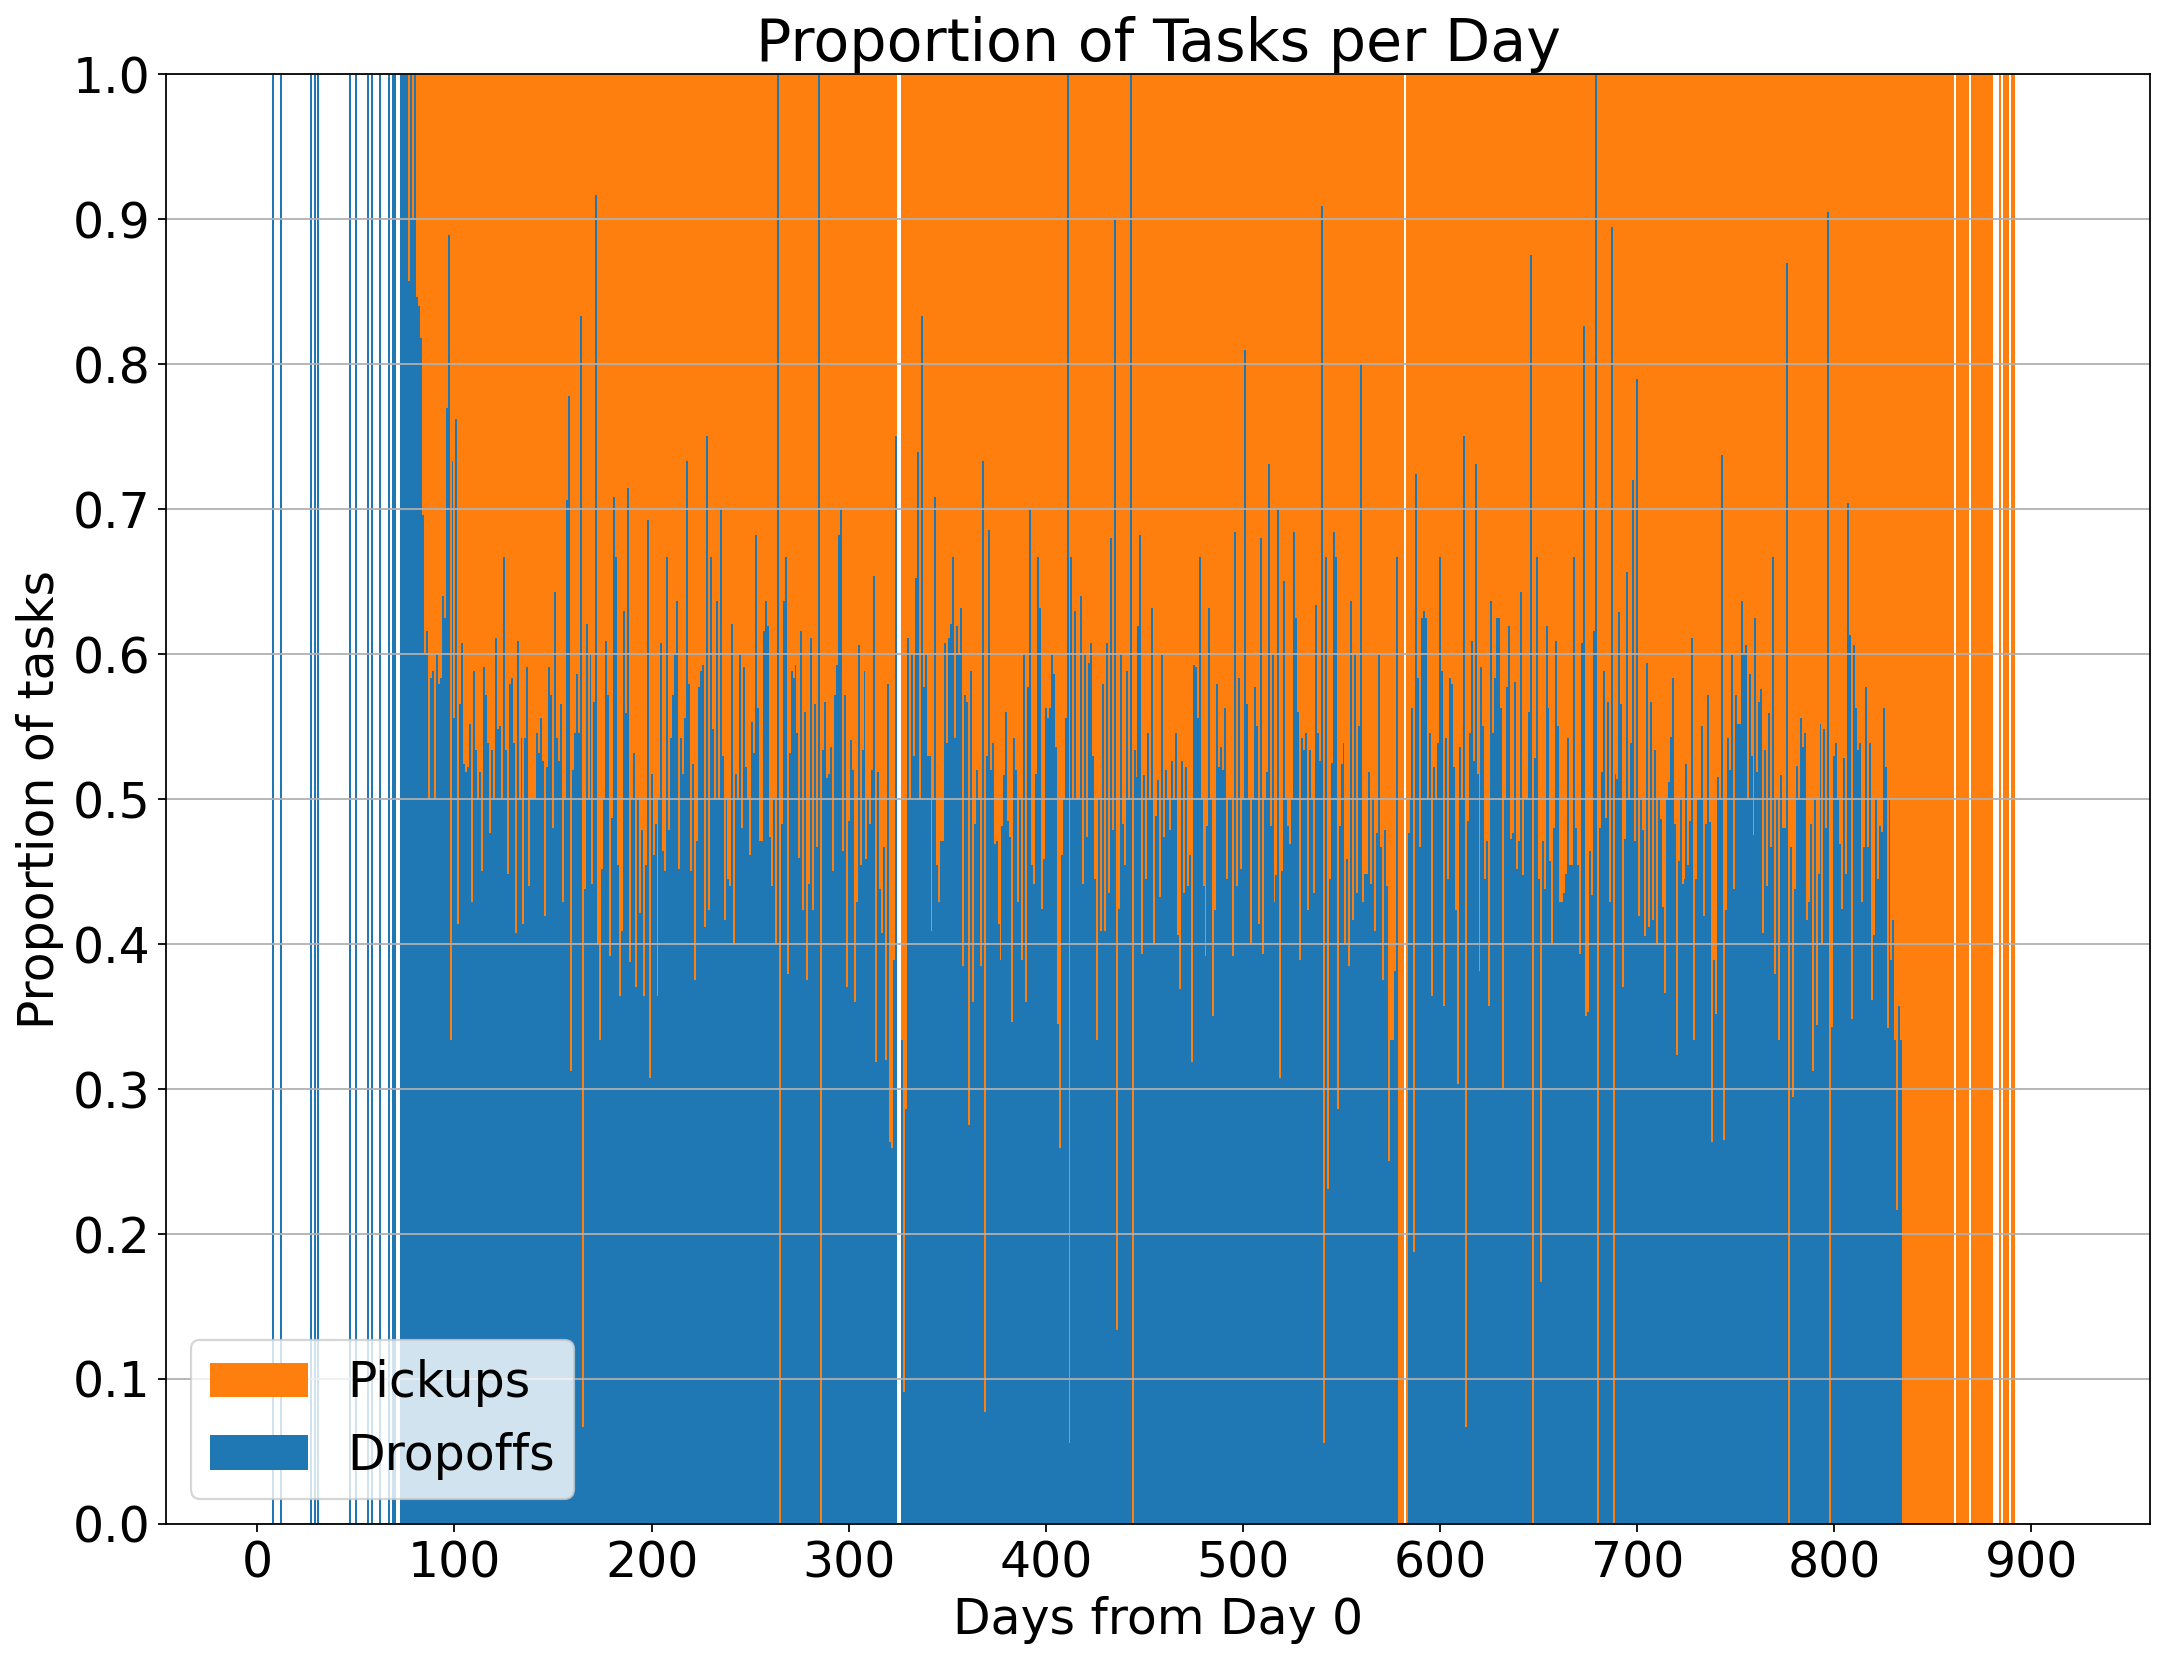

<Figure size 2560x1920 with 0 Axes>

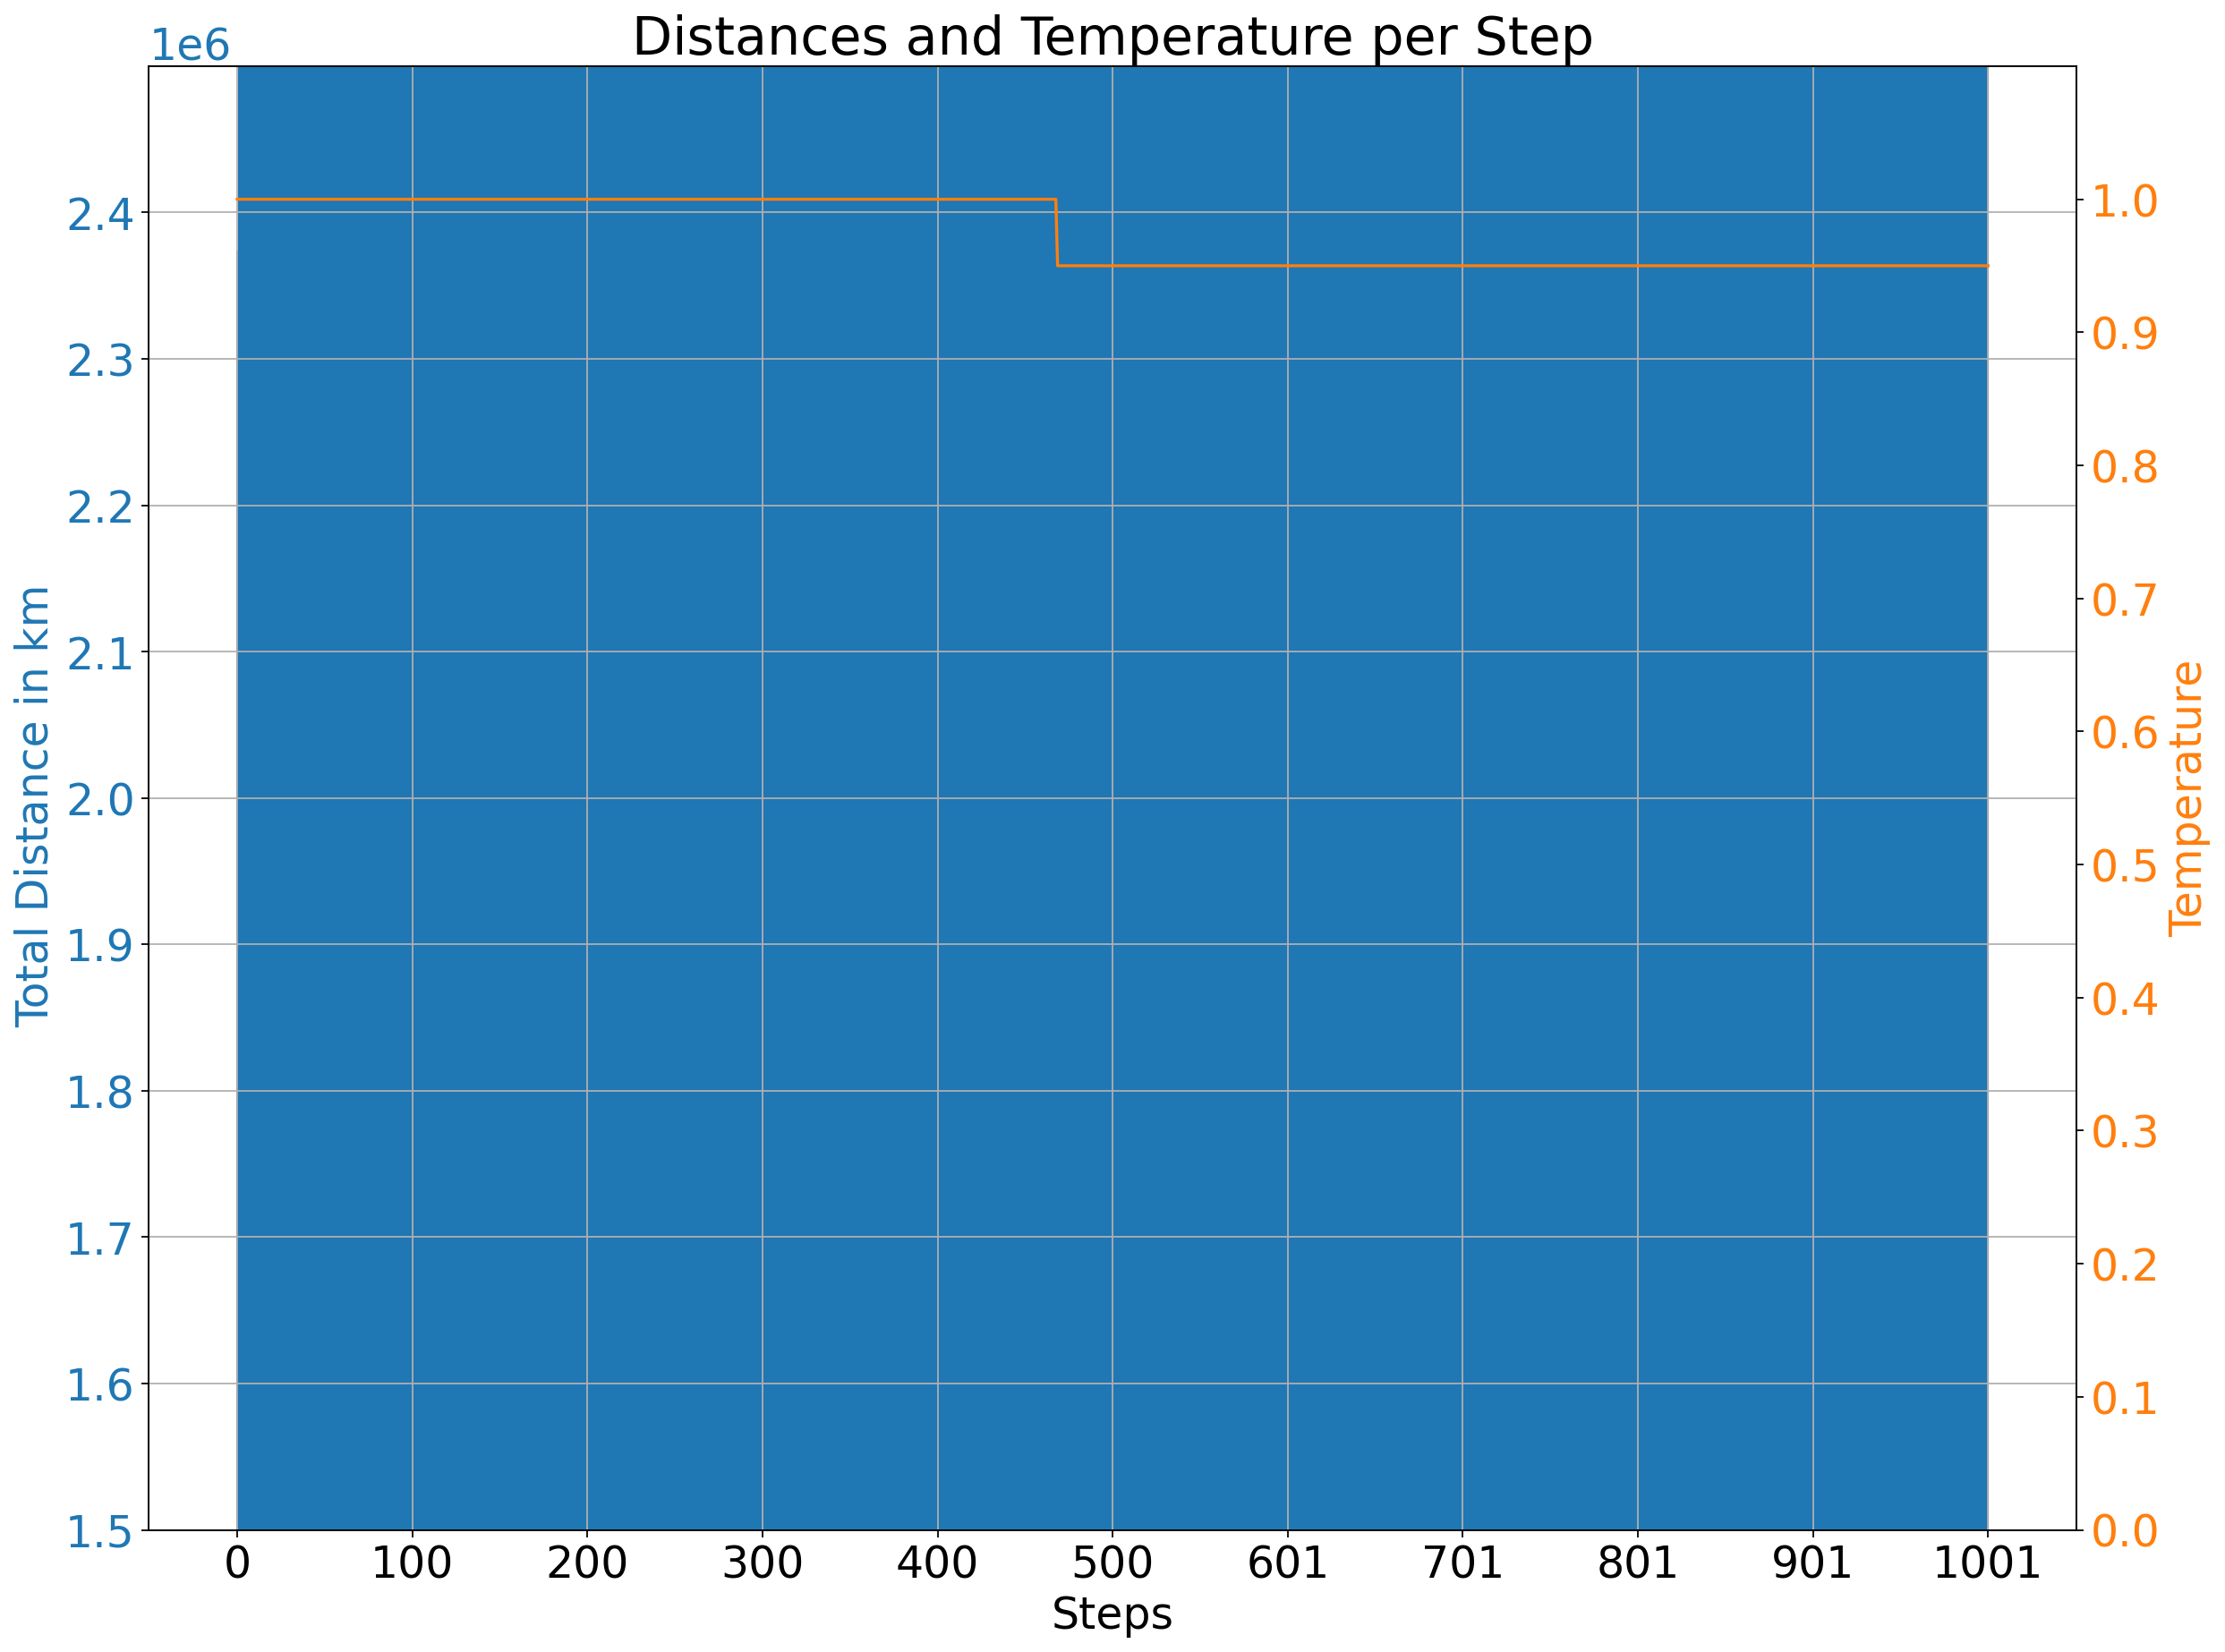

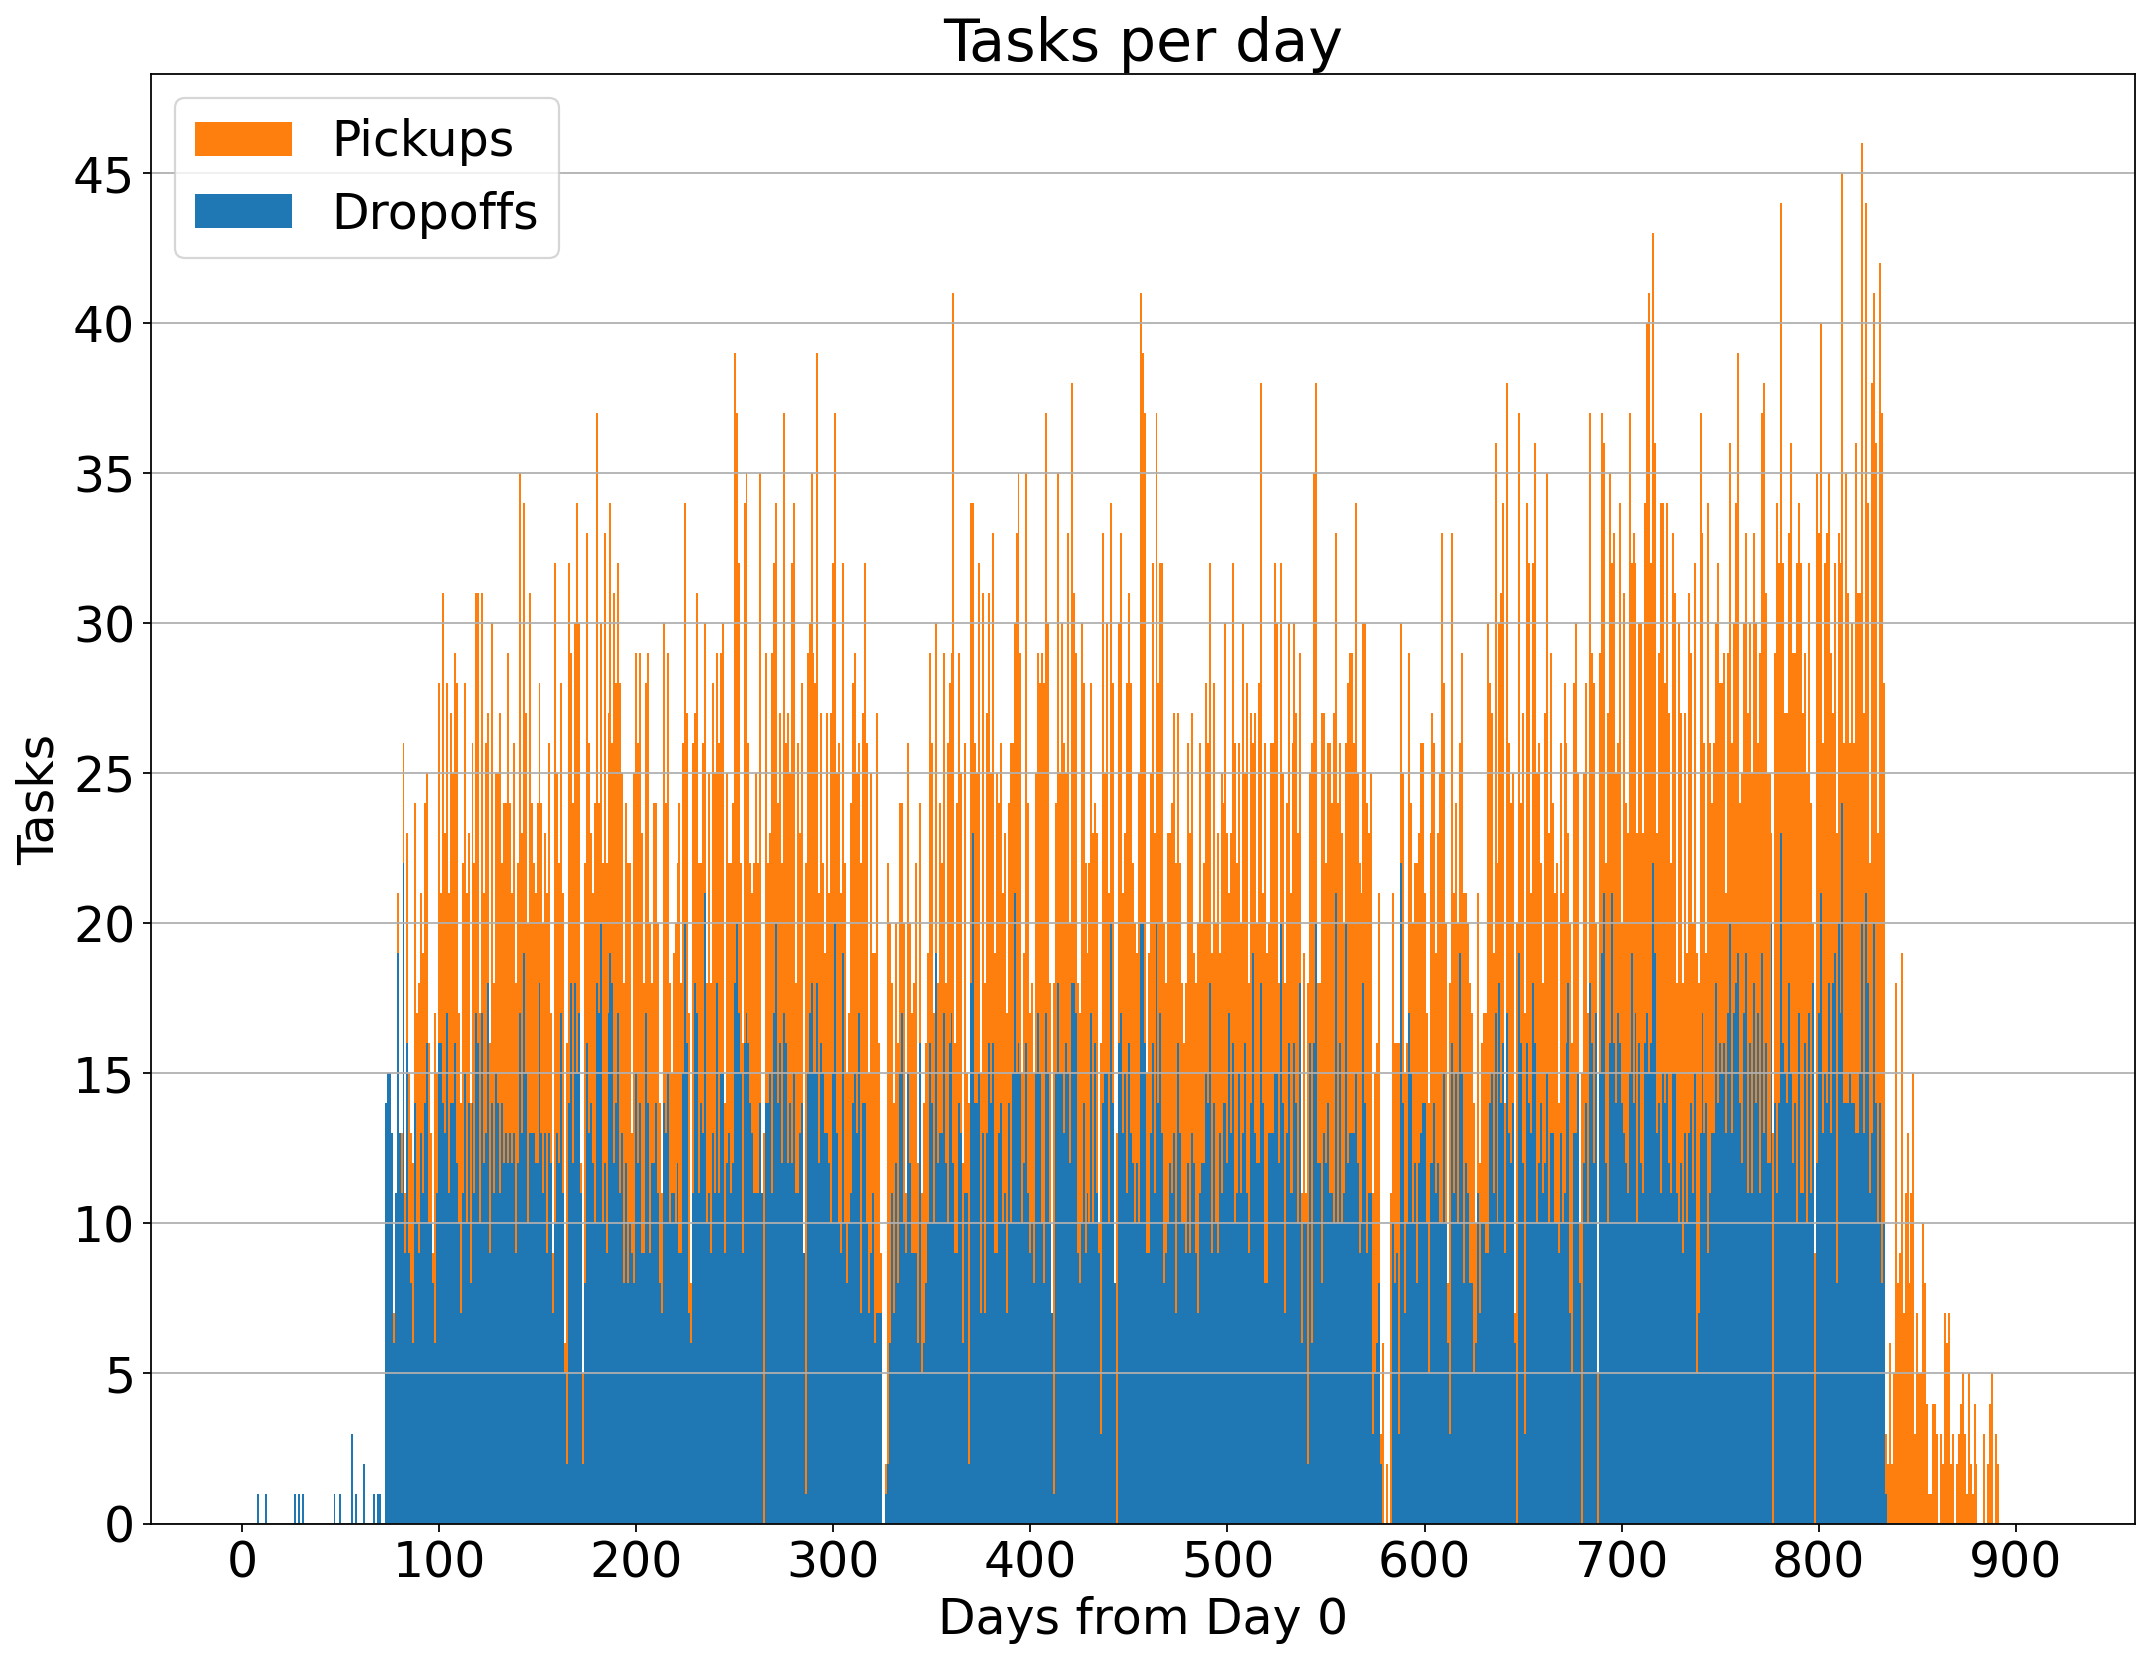

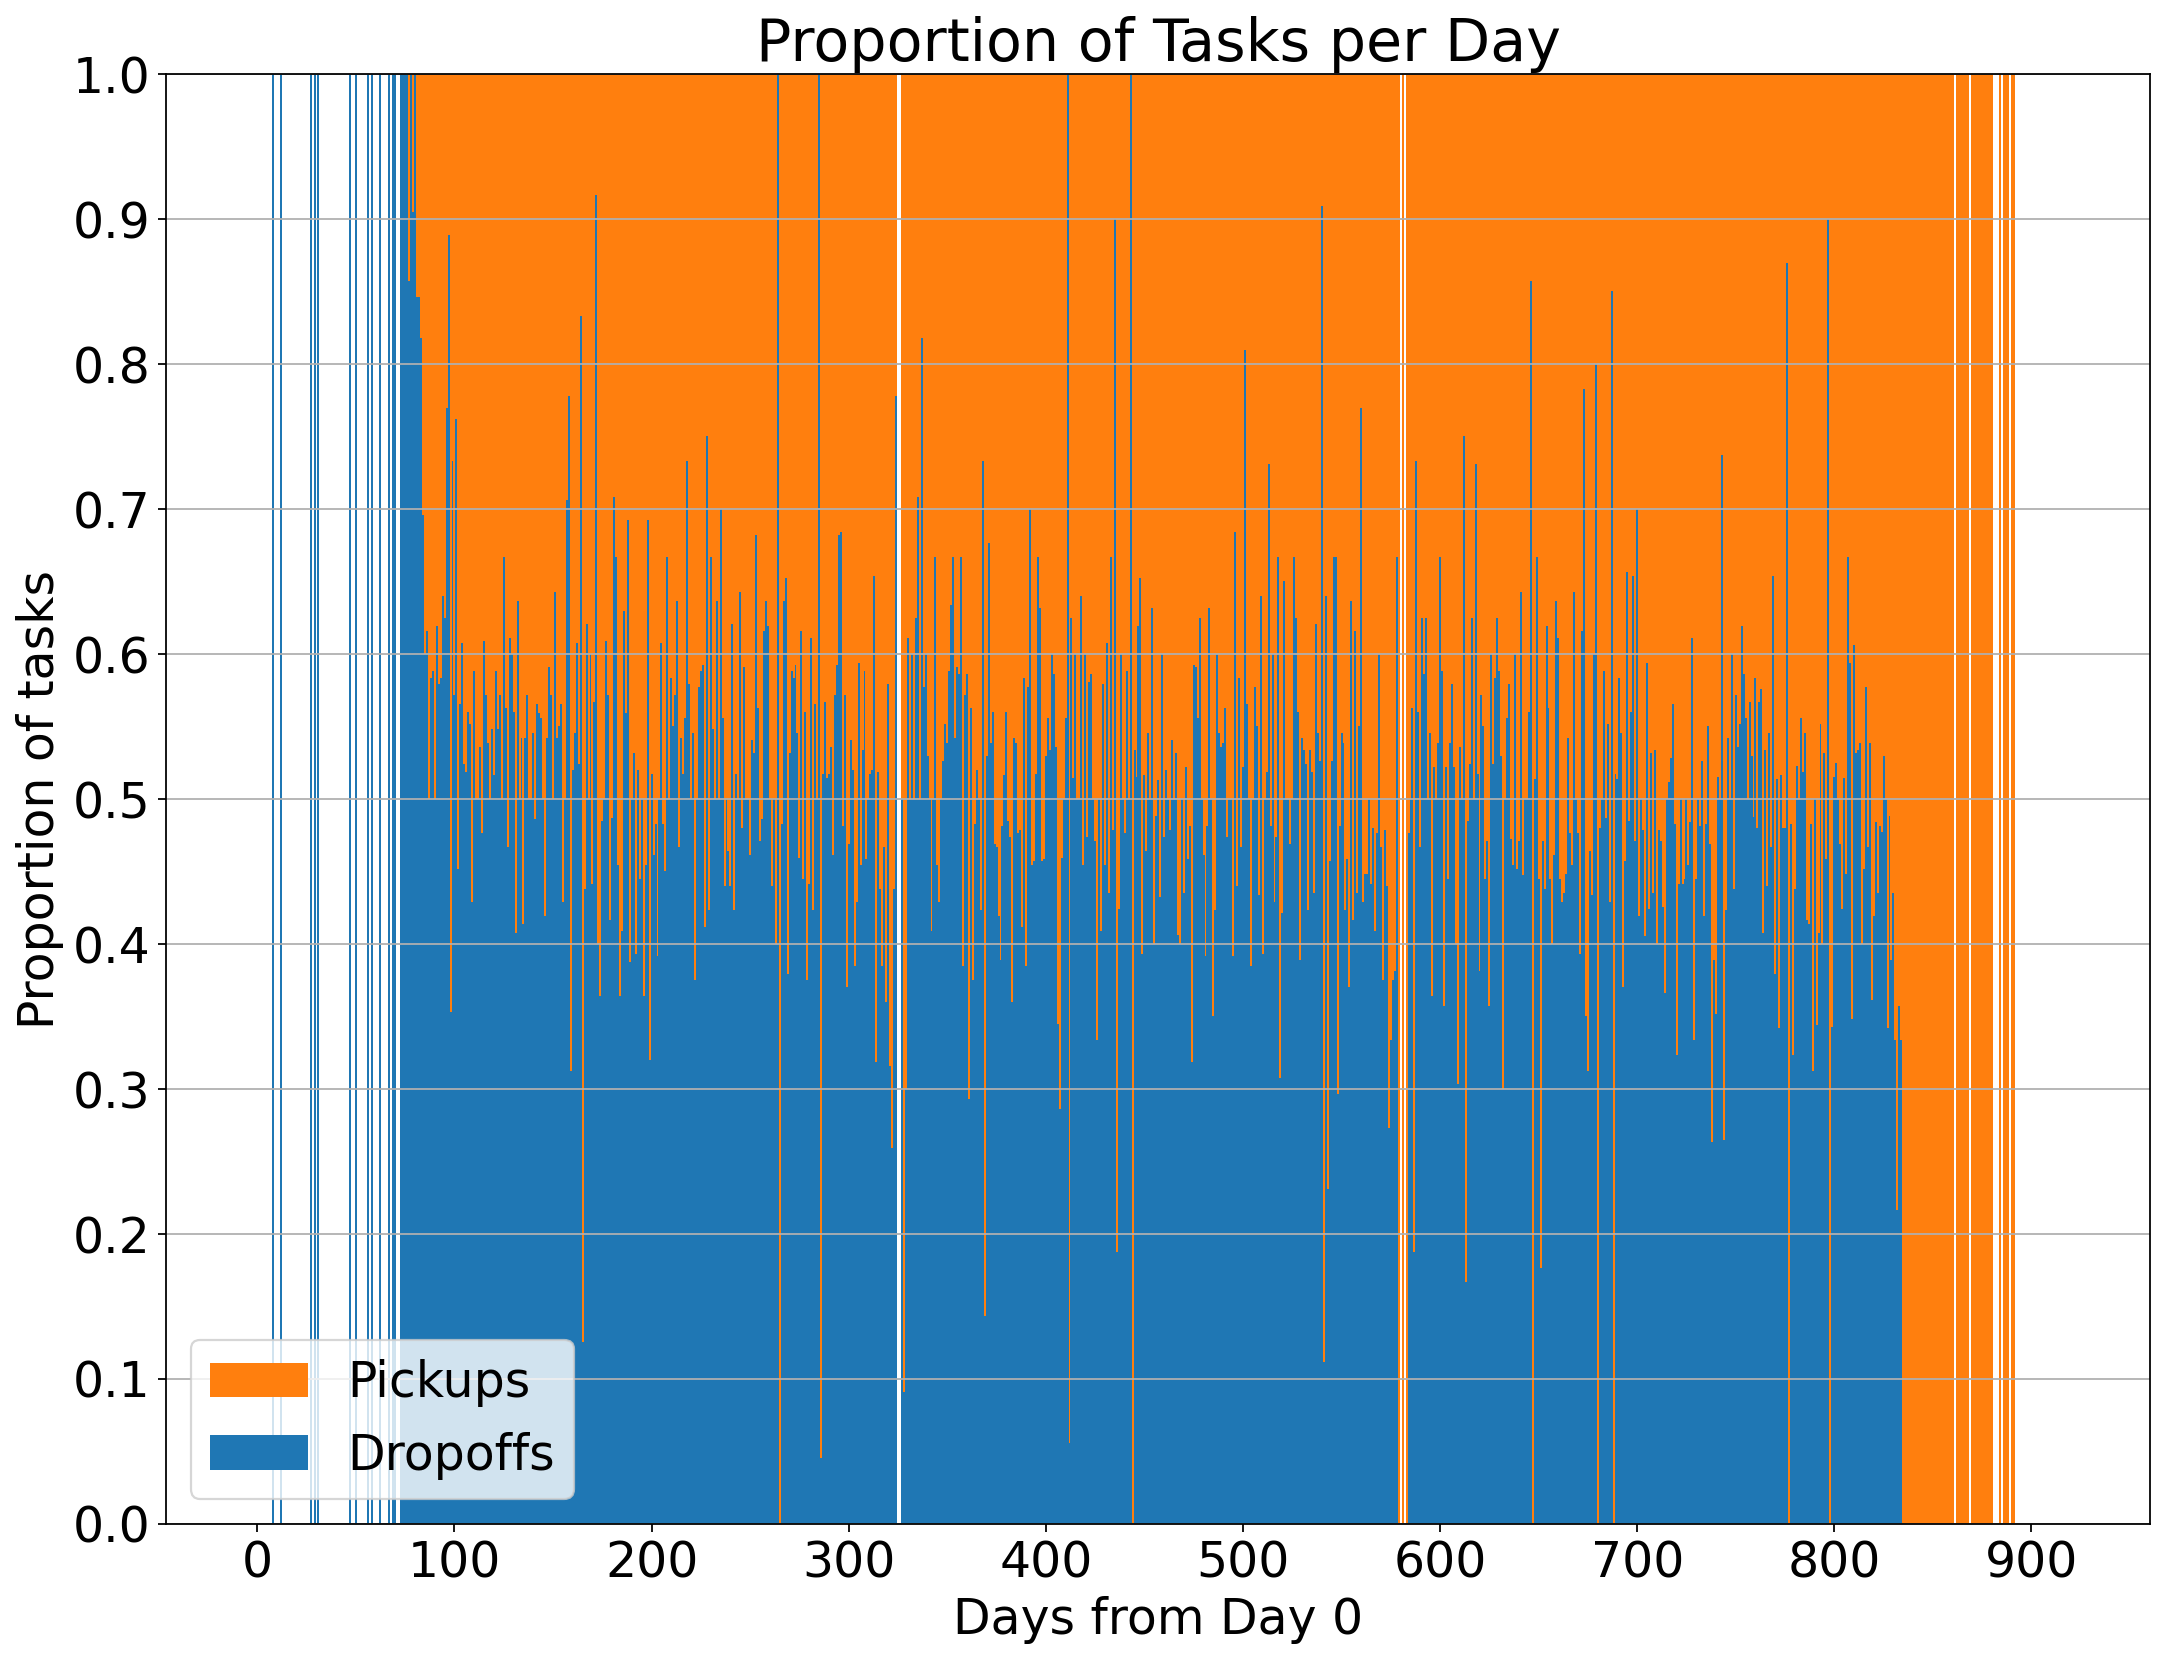

<Figure size 2560x1920 with 0 Axes>

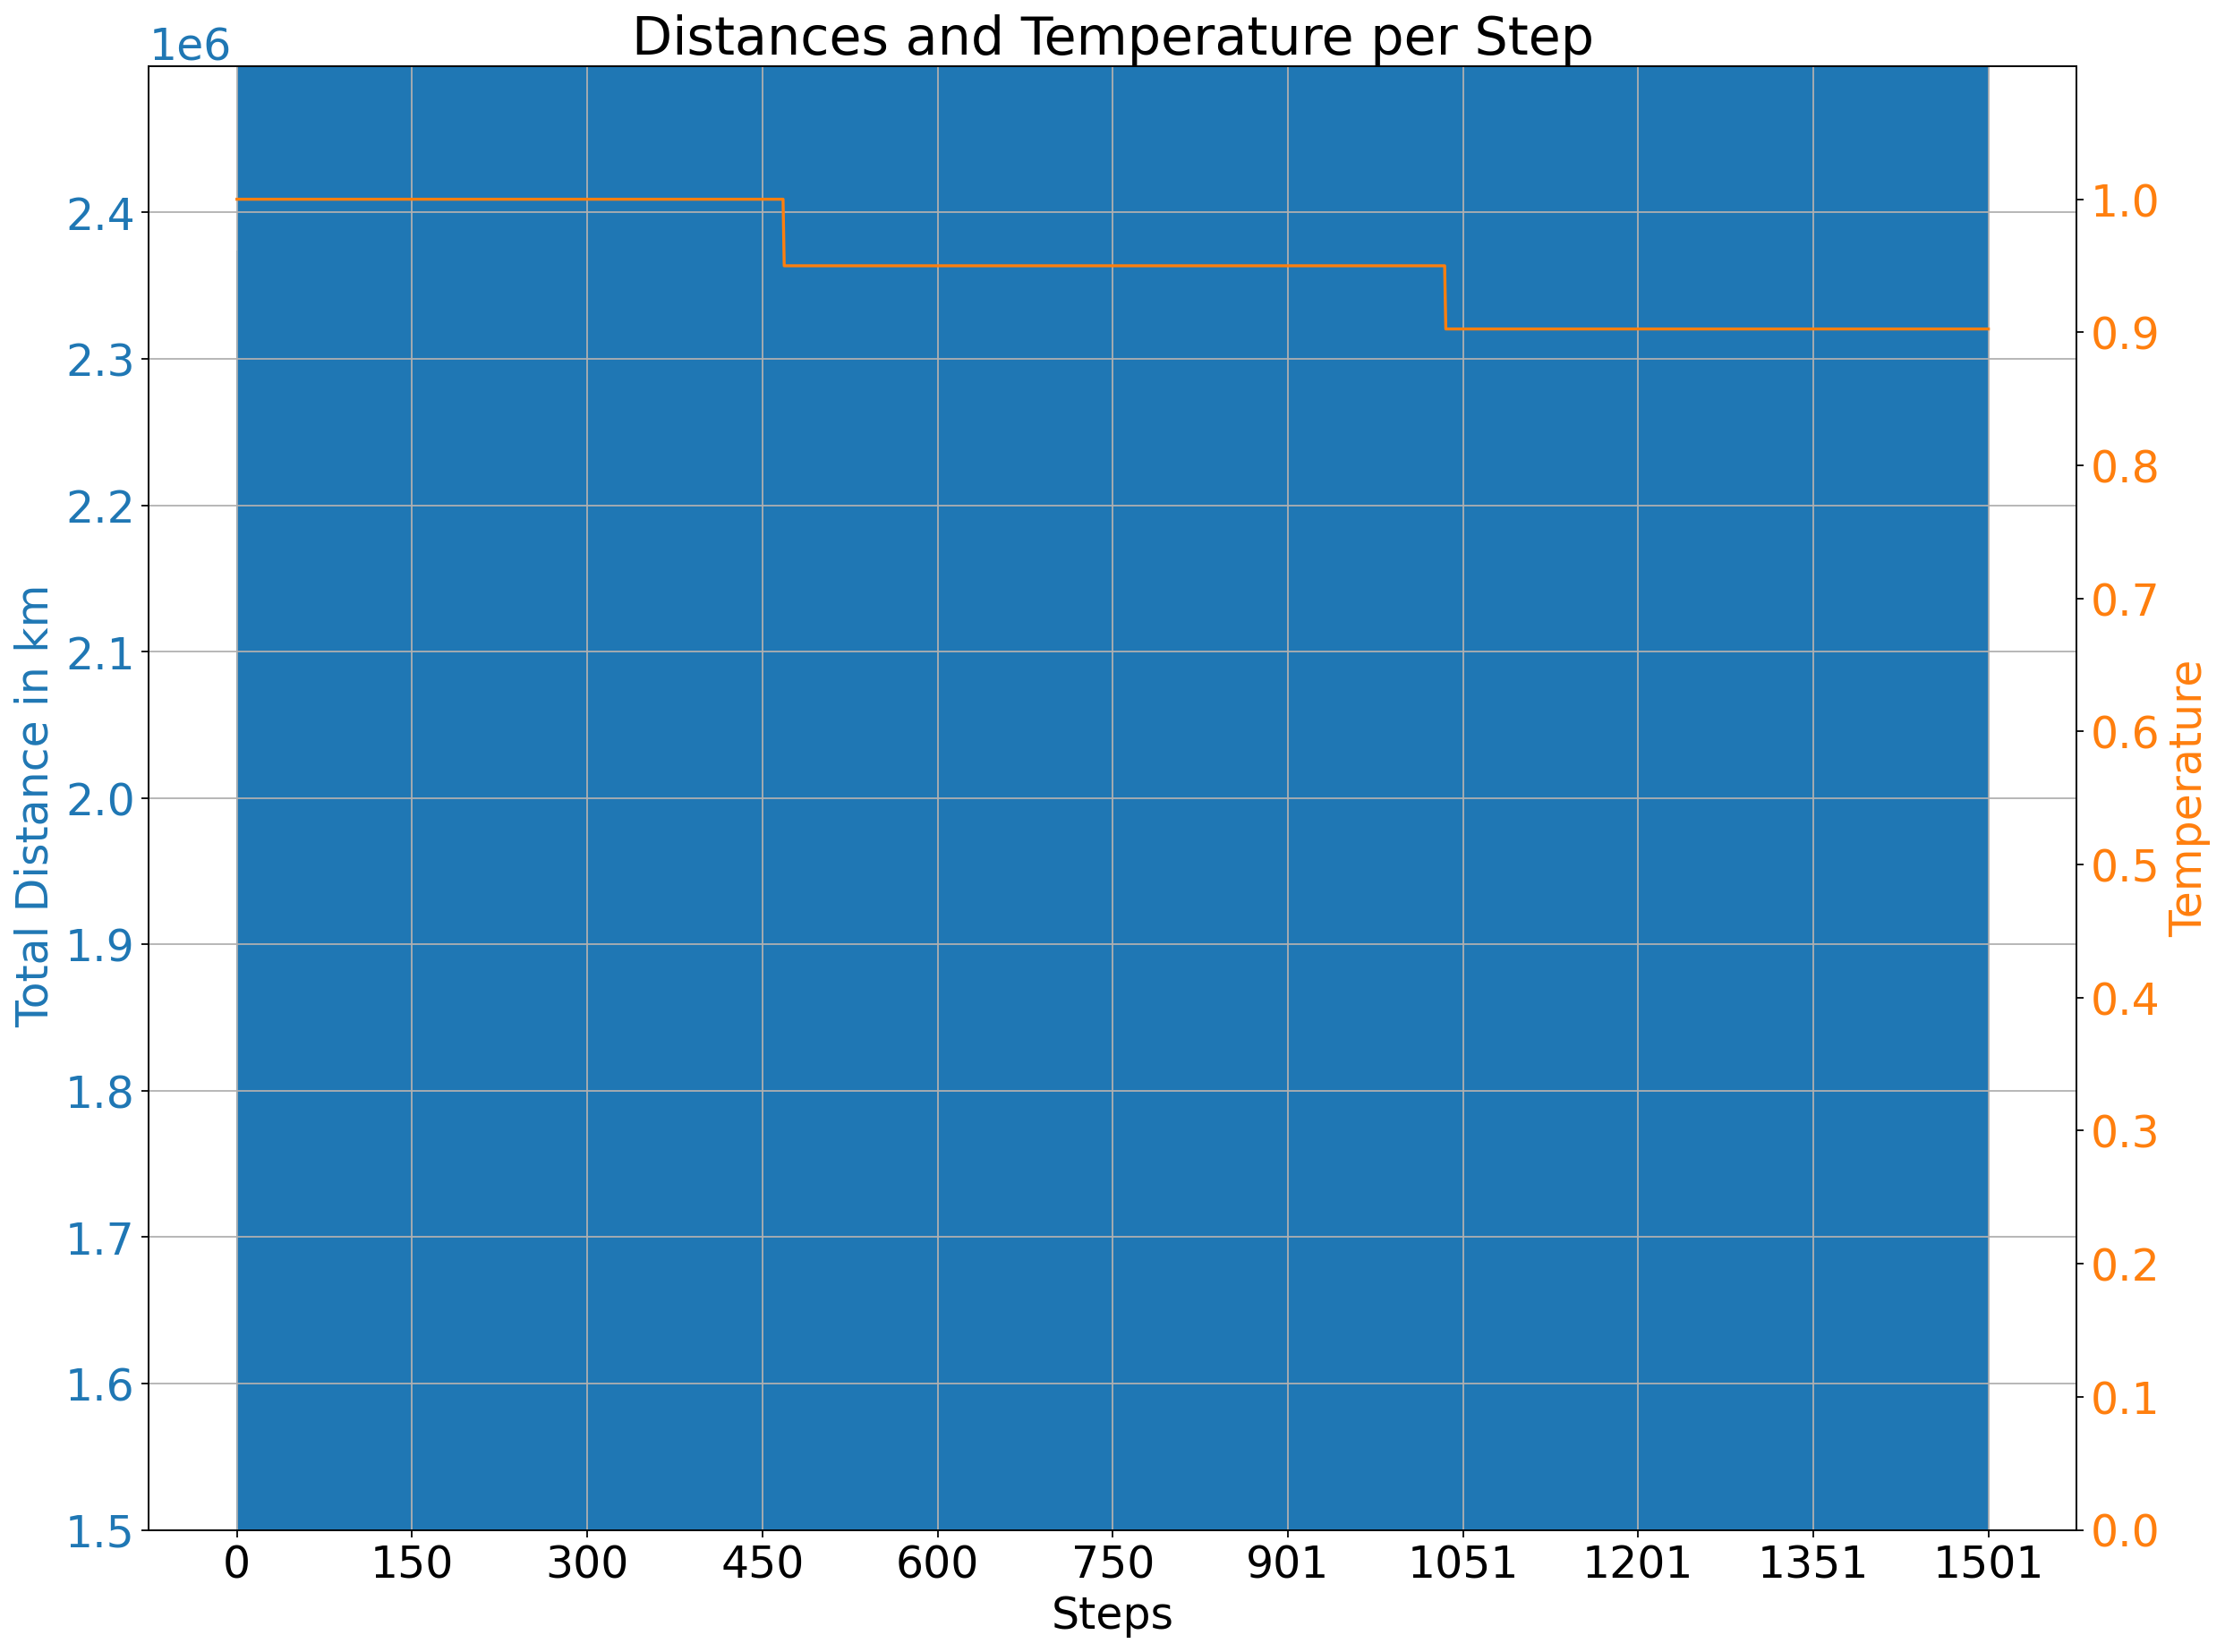

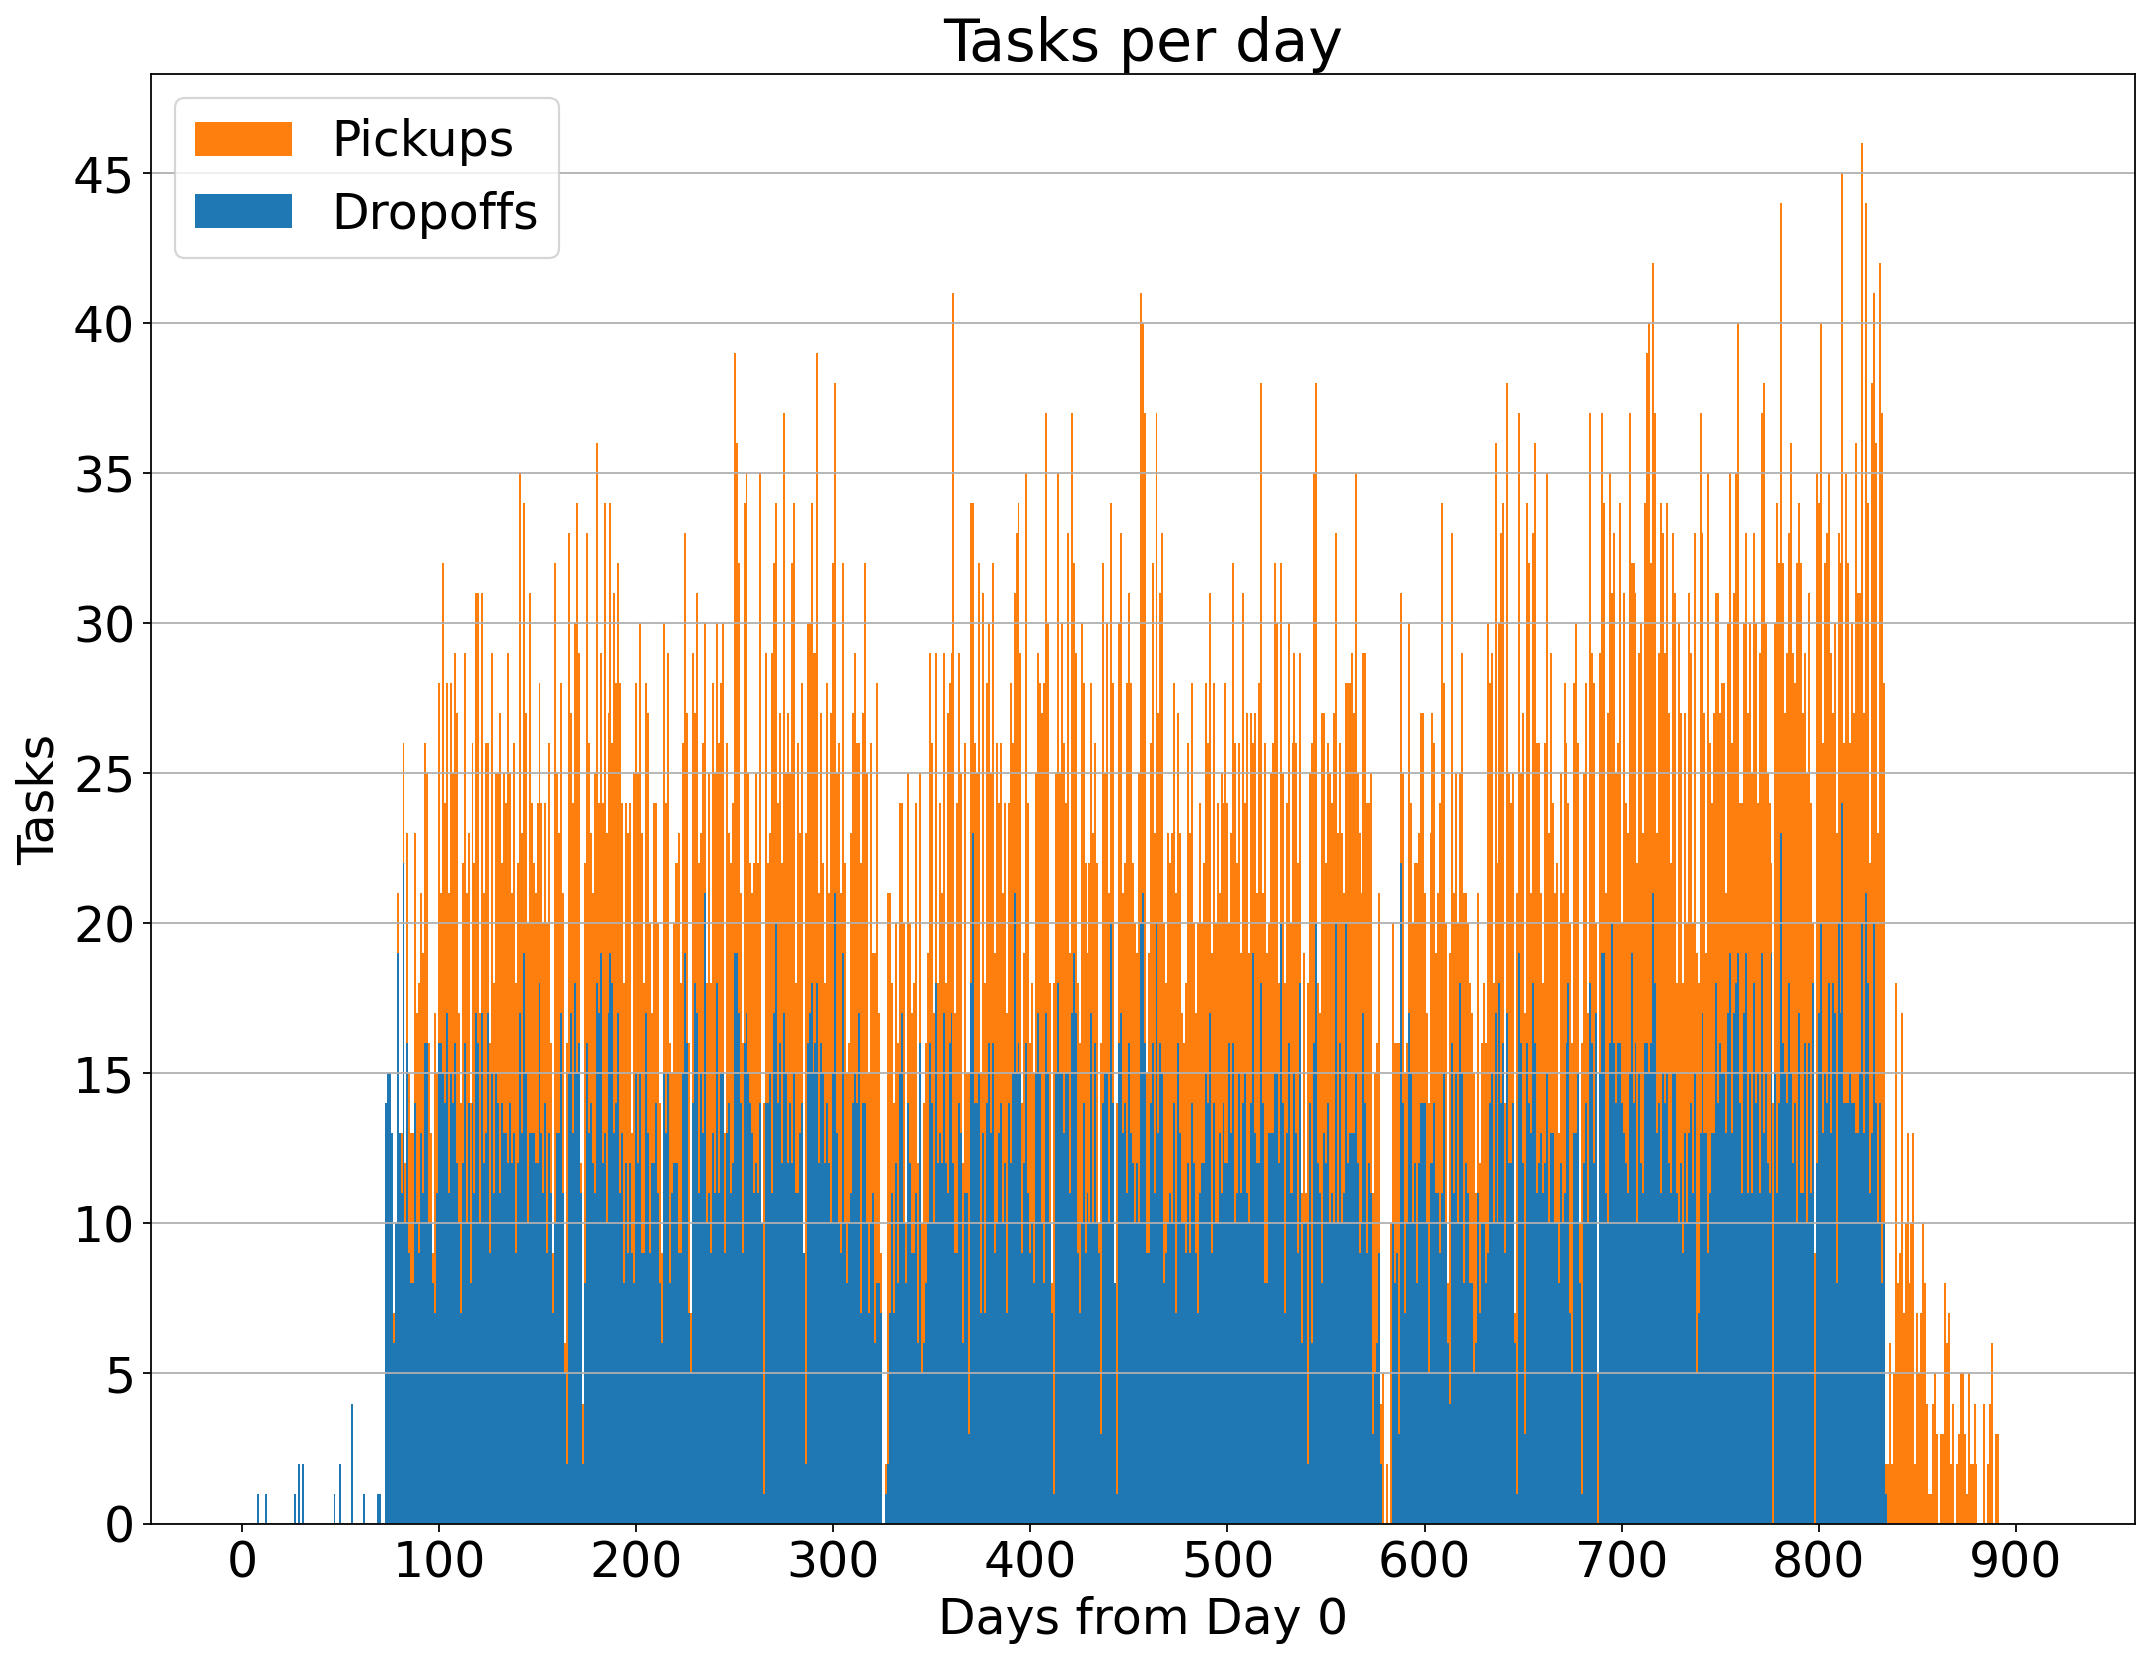

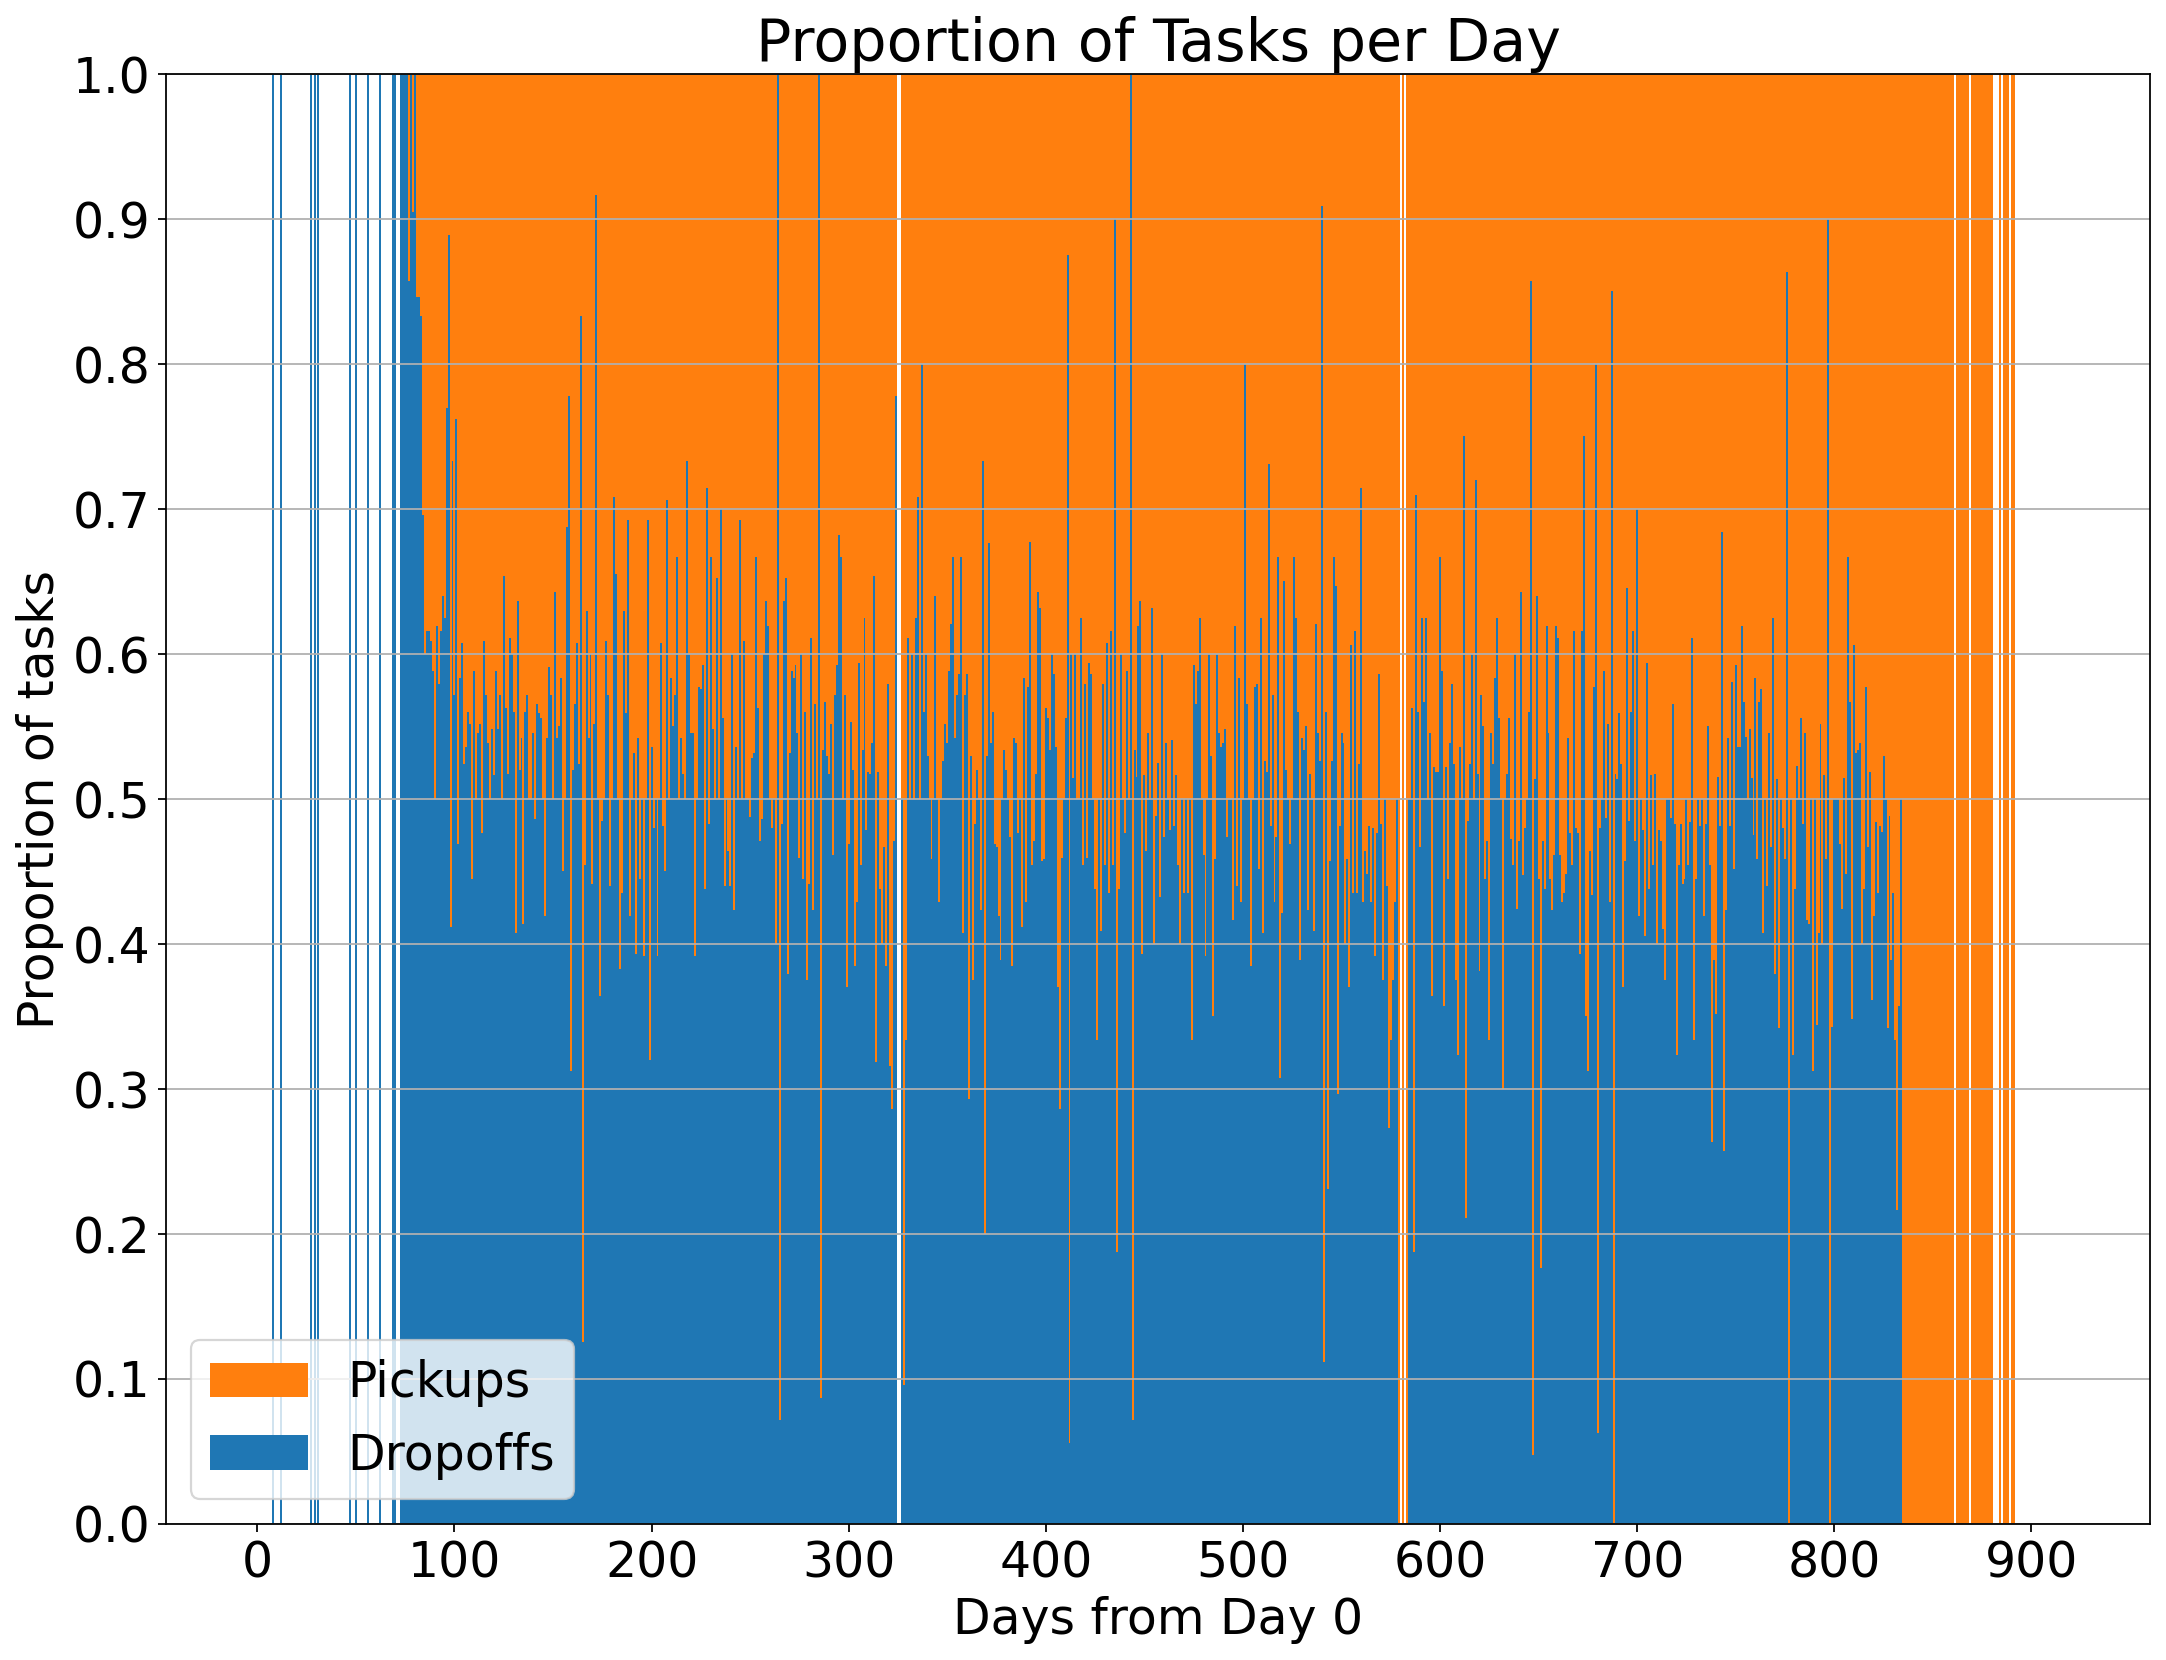

<Figure size 2560x1920 with 0 Axes>

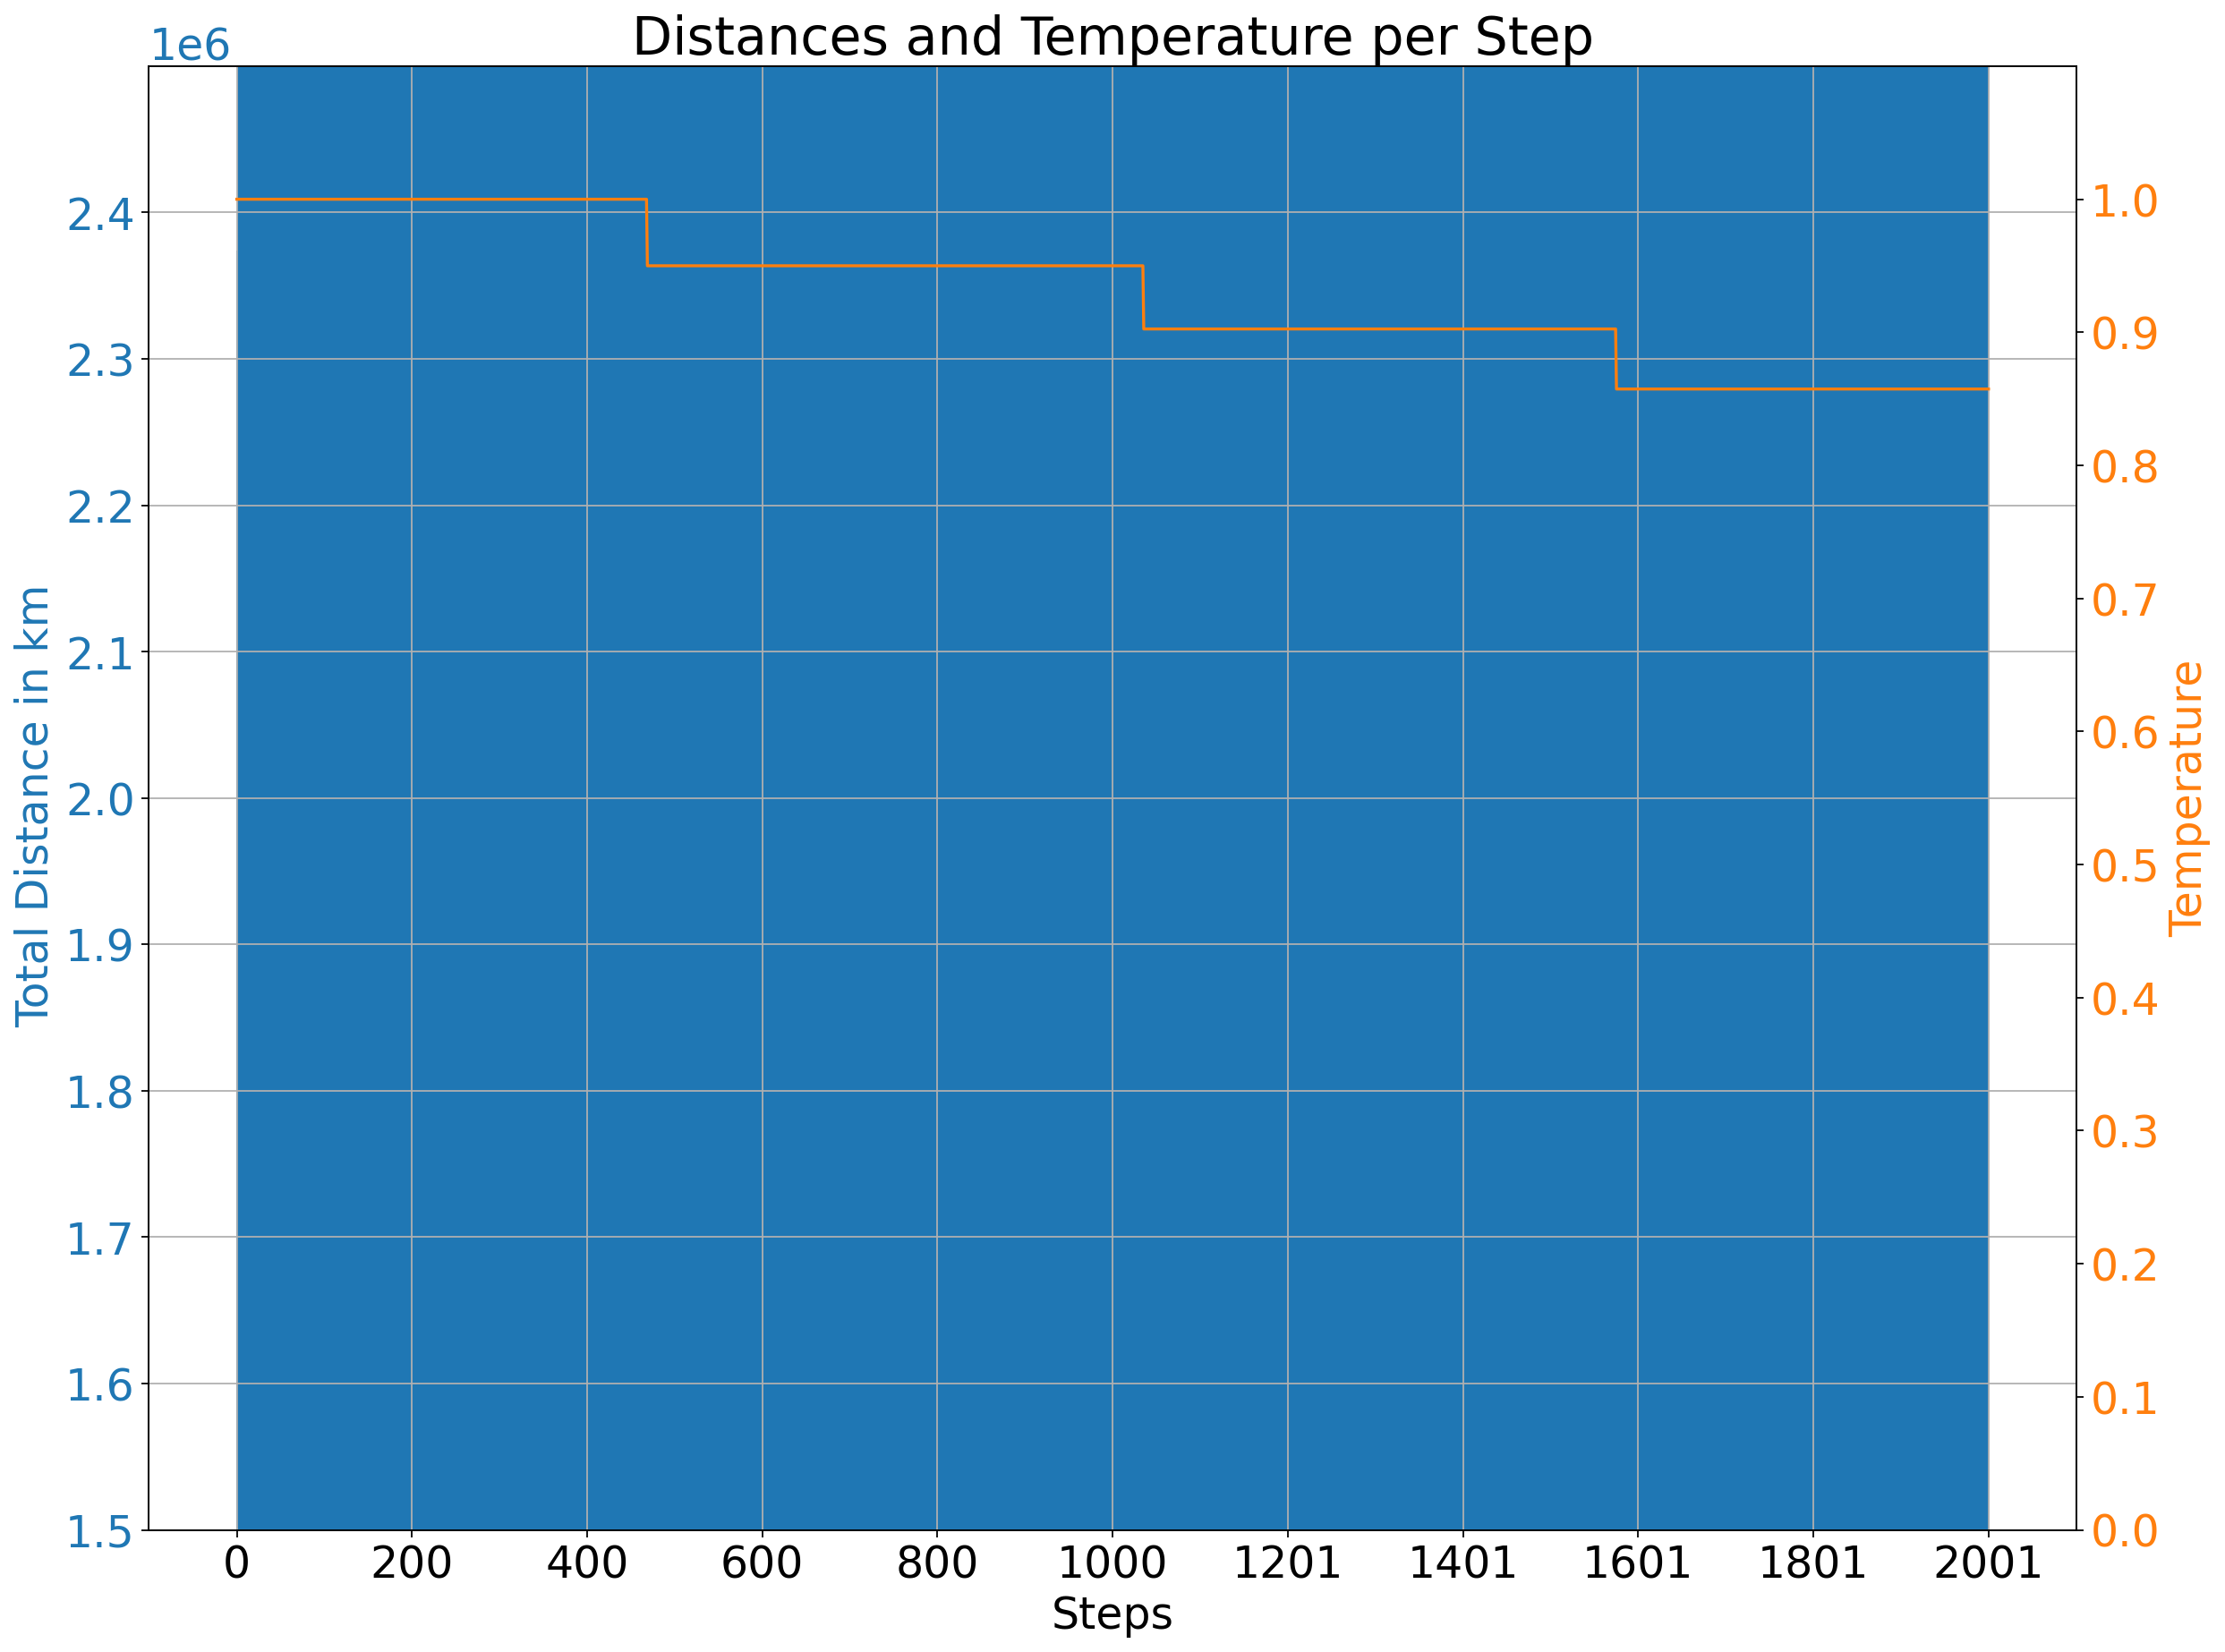

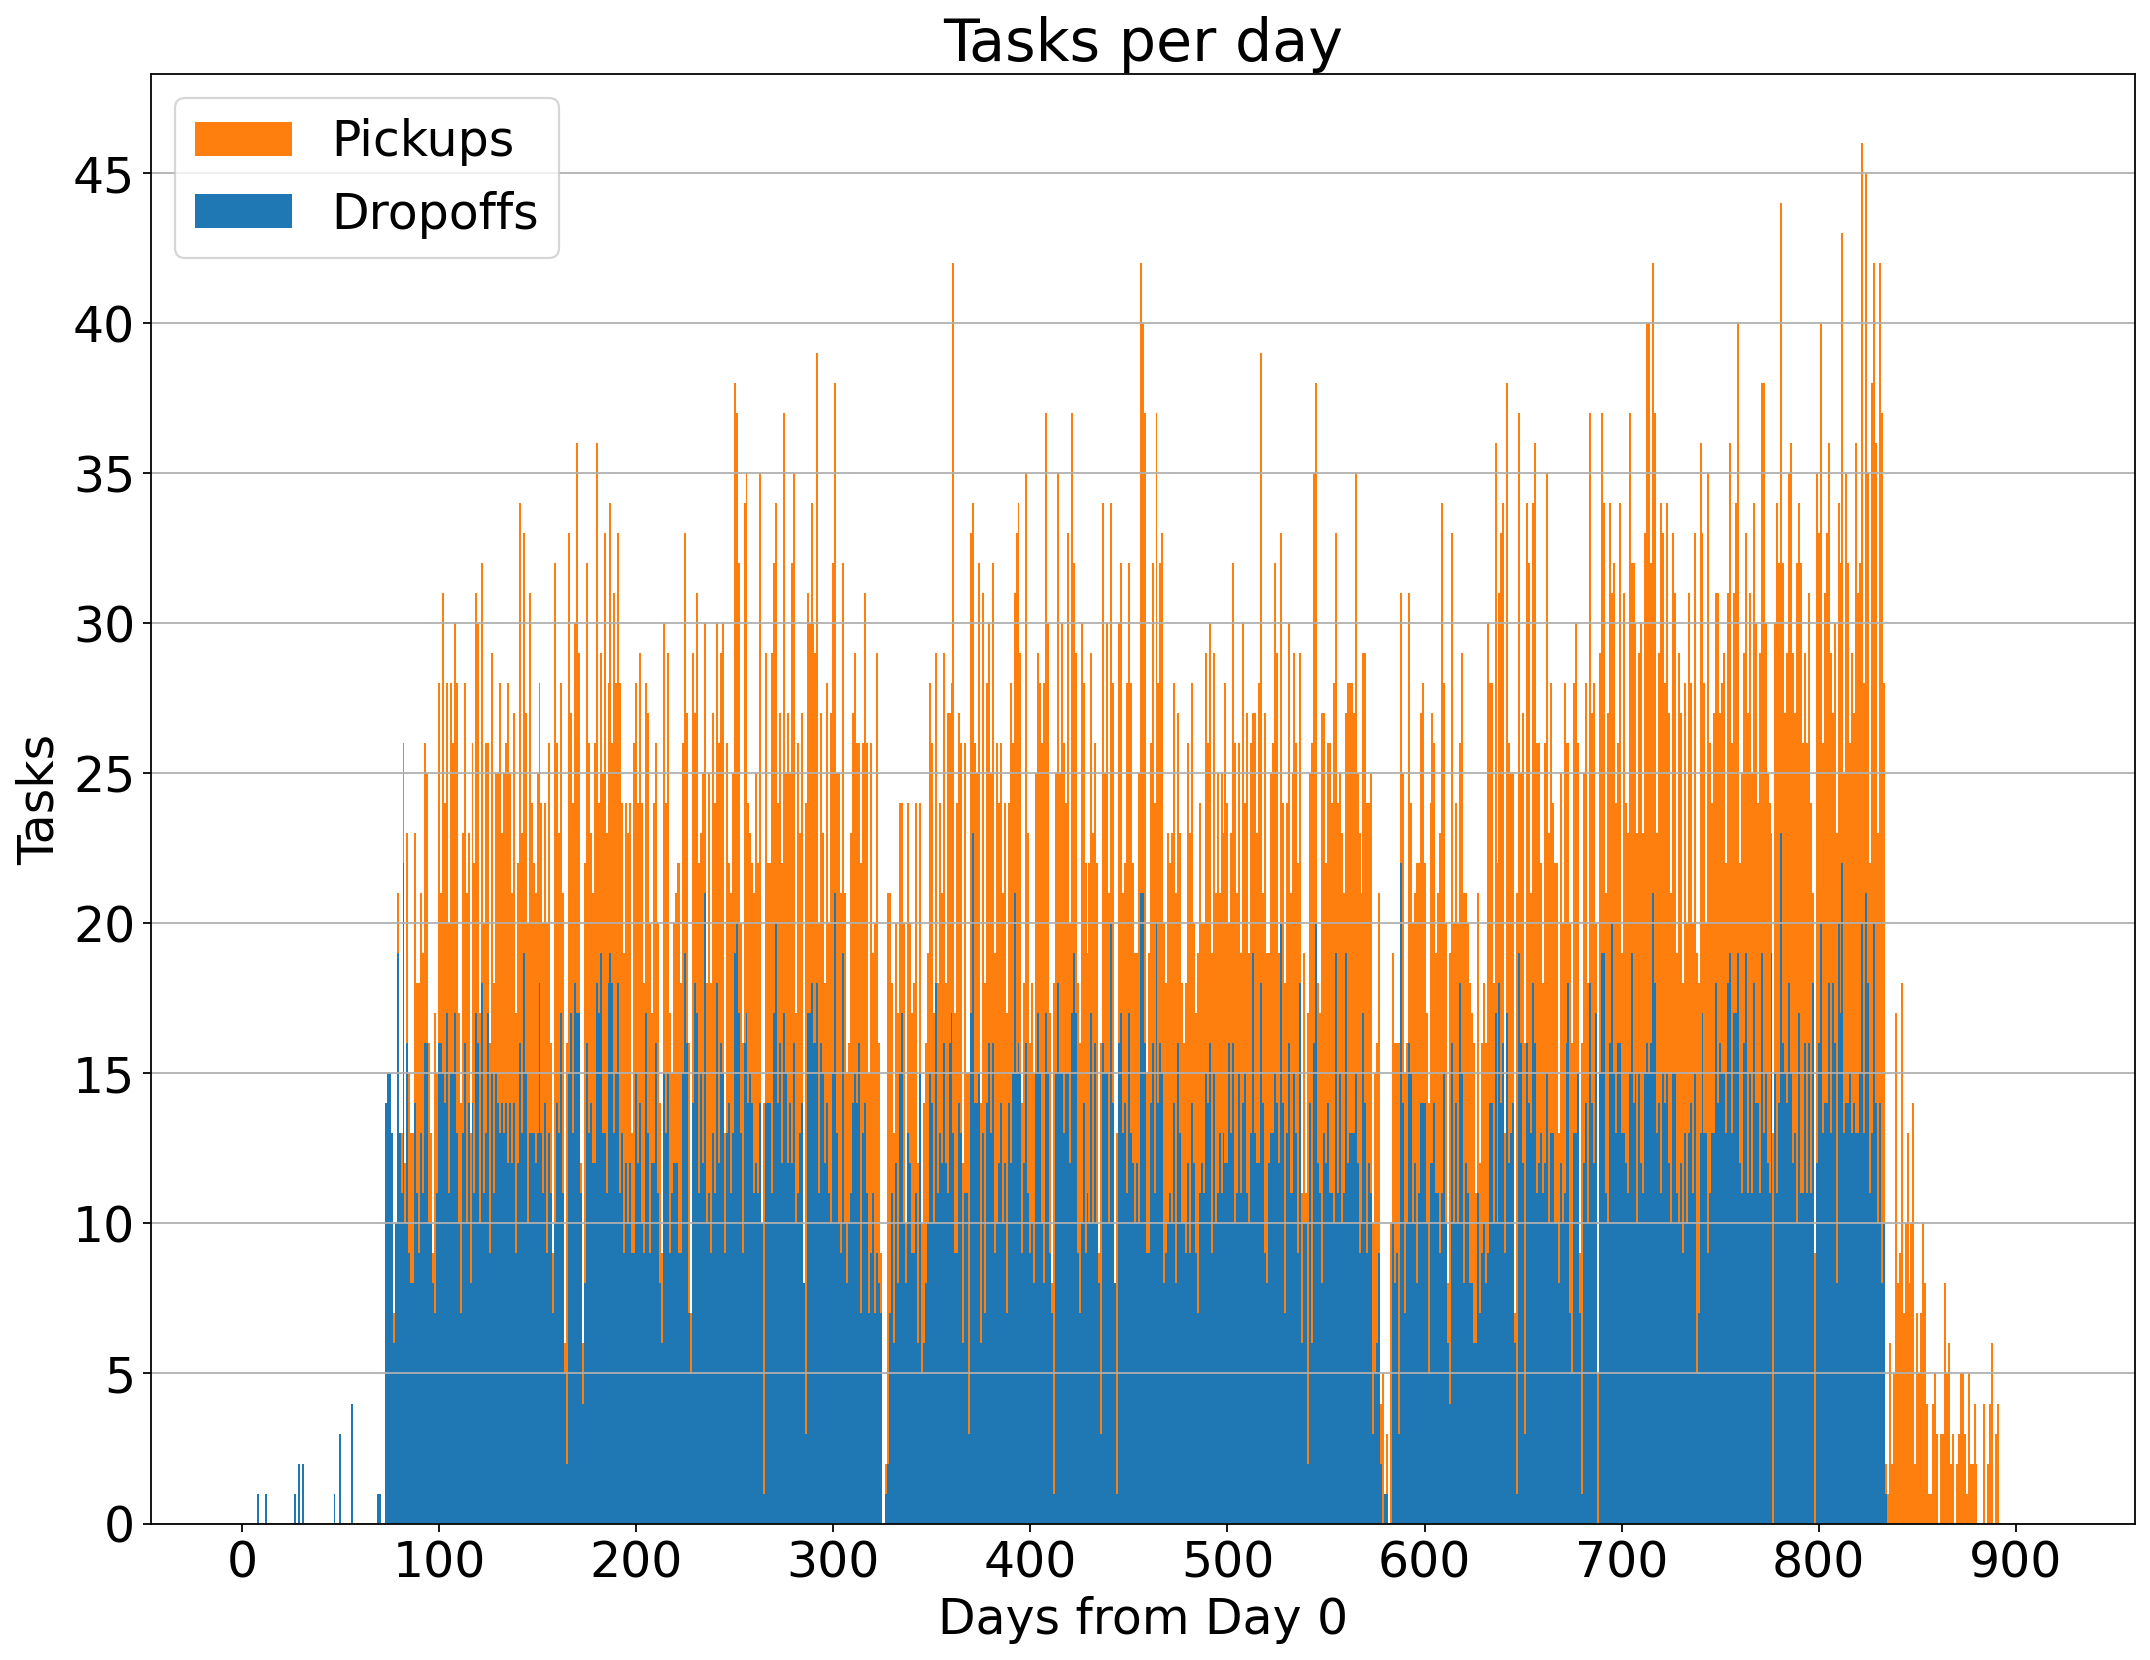

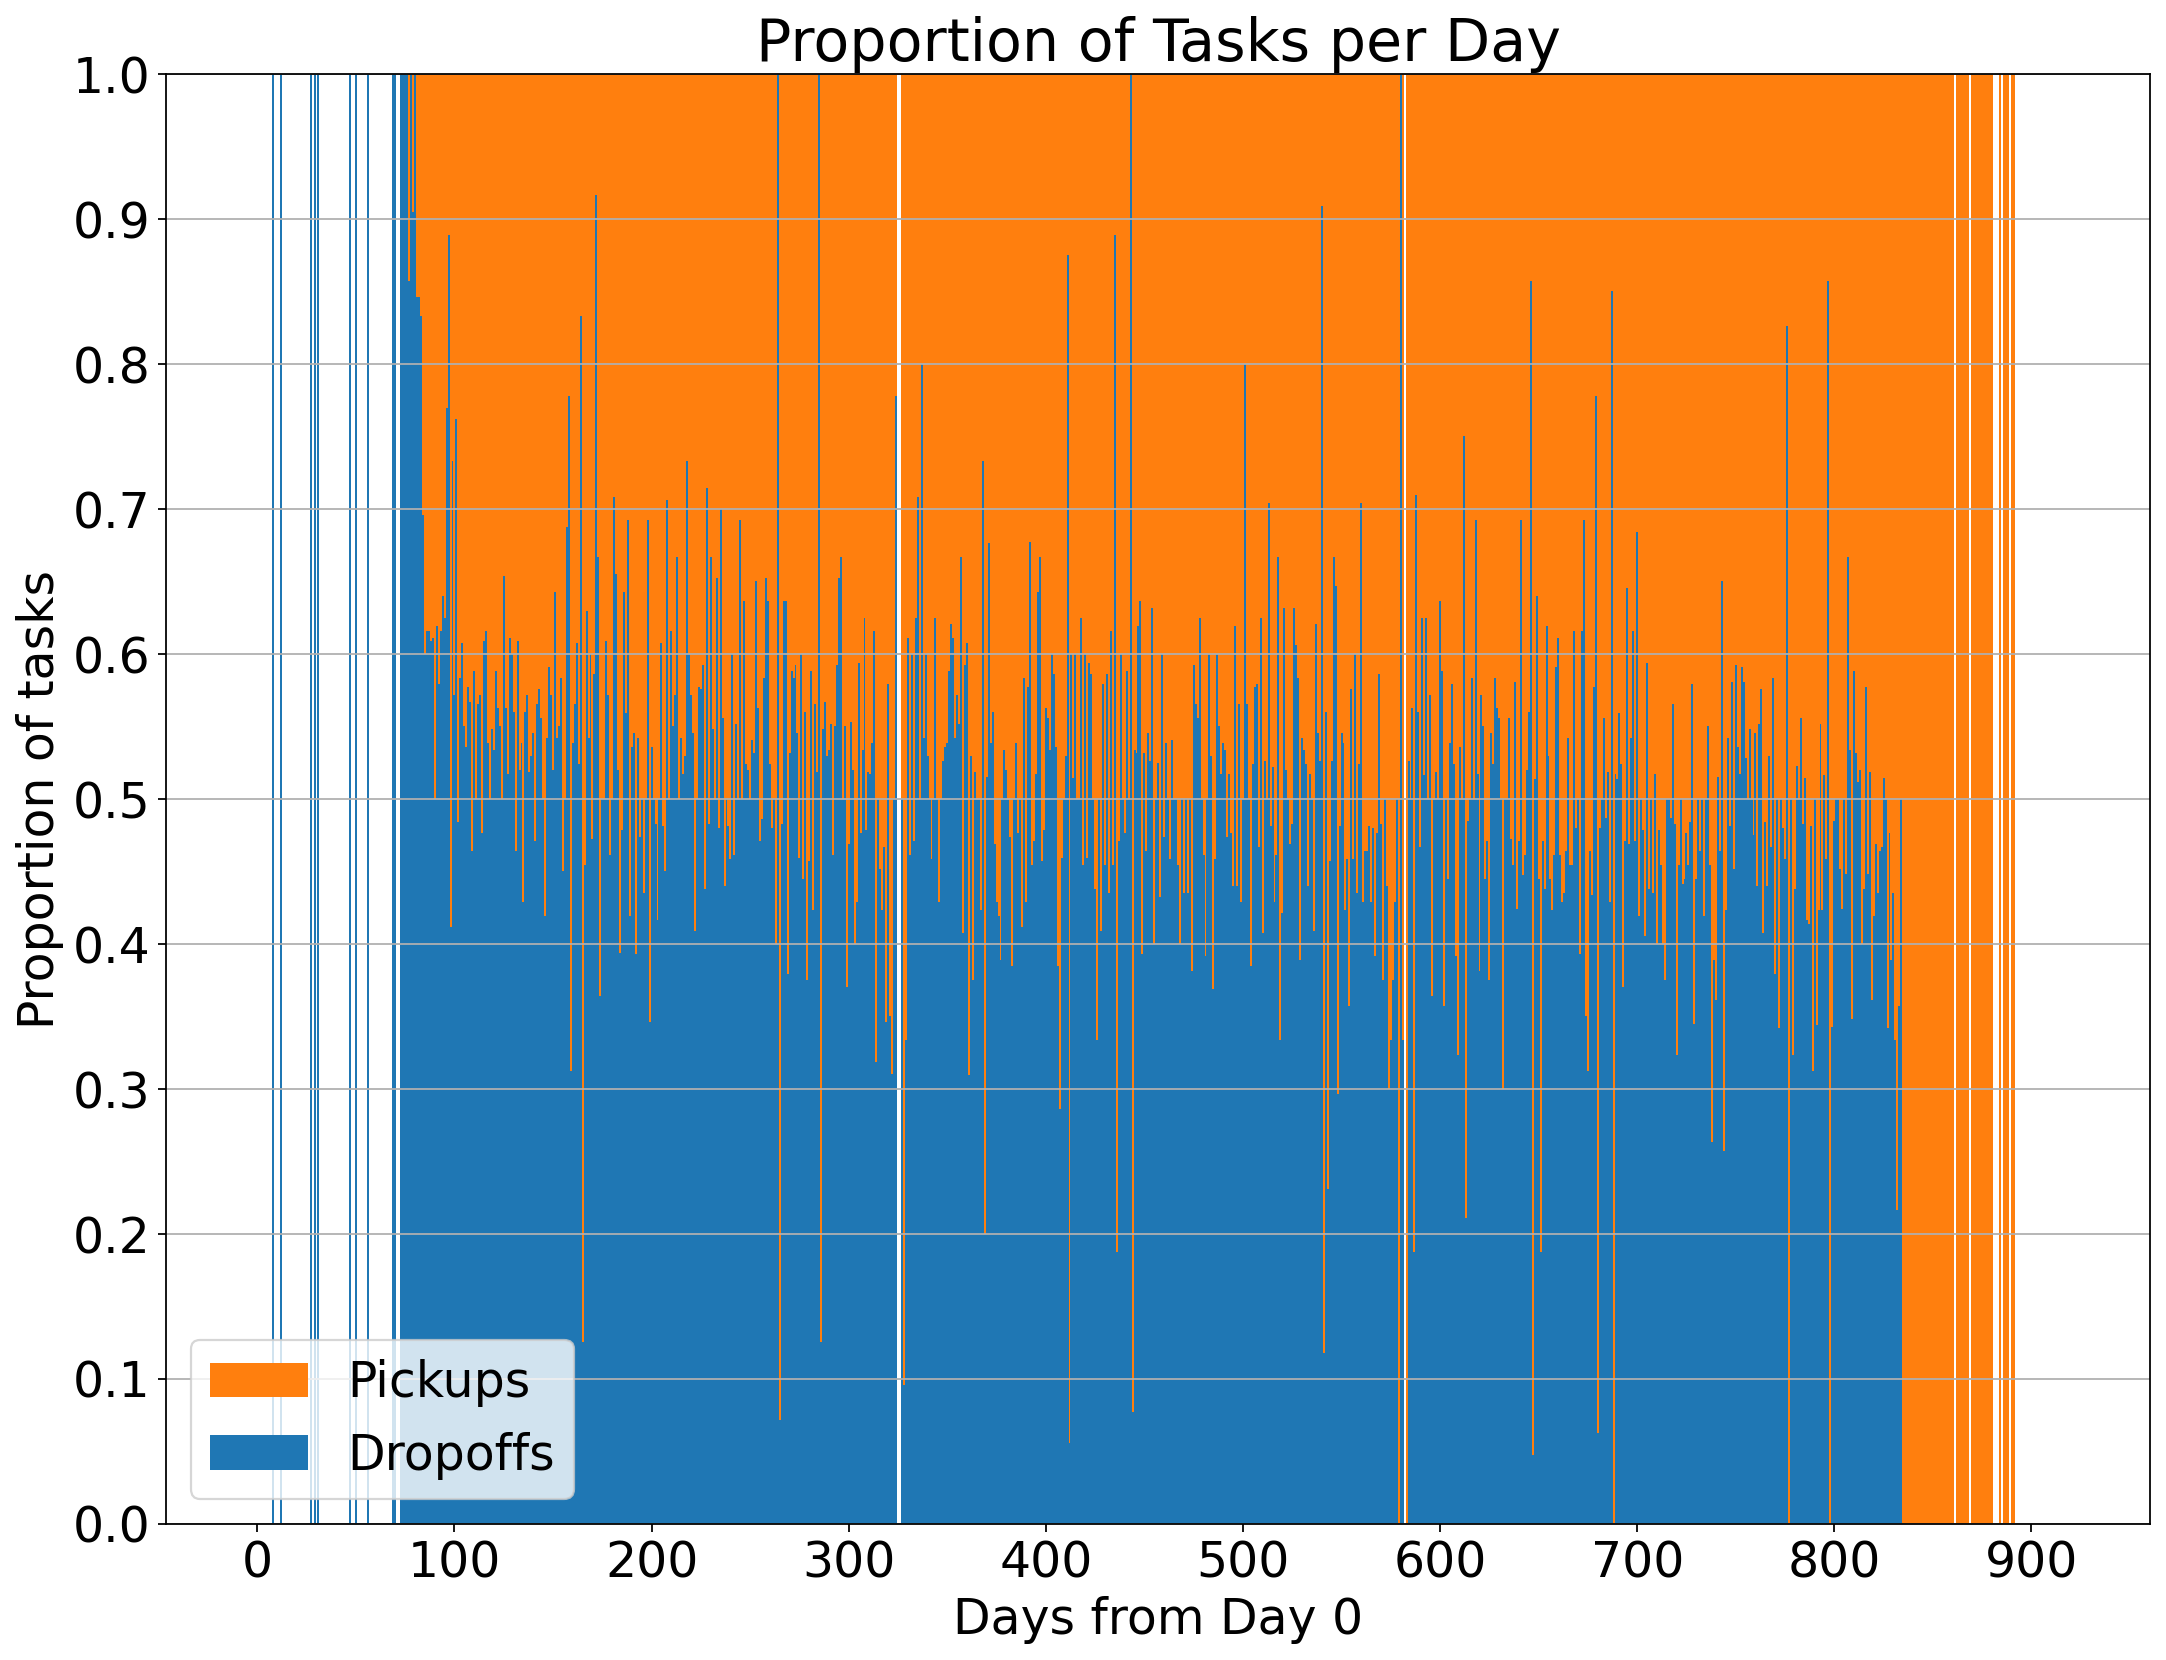

<Figure size 2560x1920 with 0 Axes>

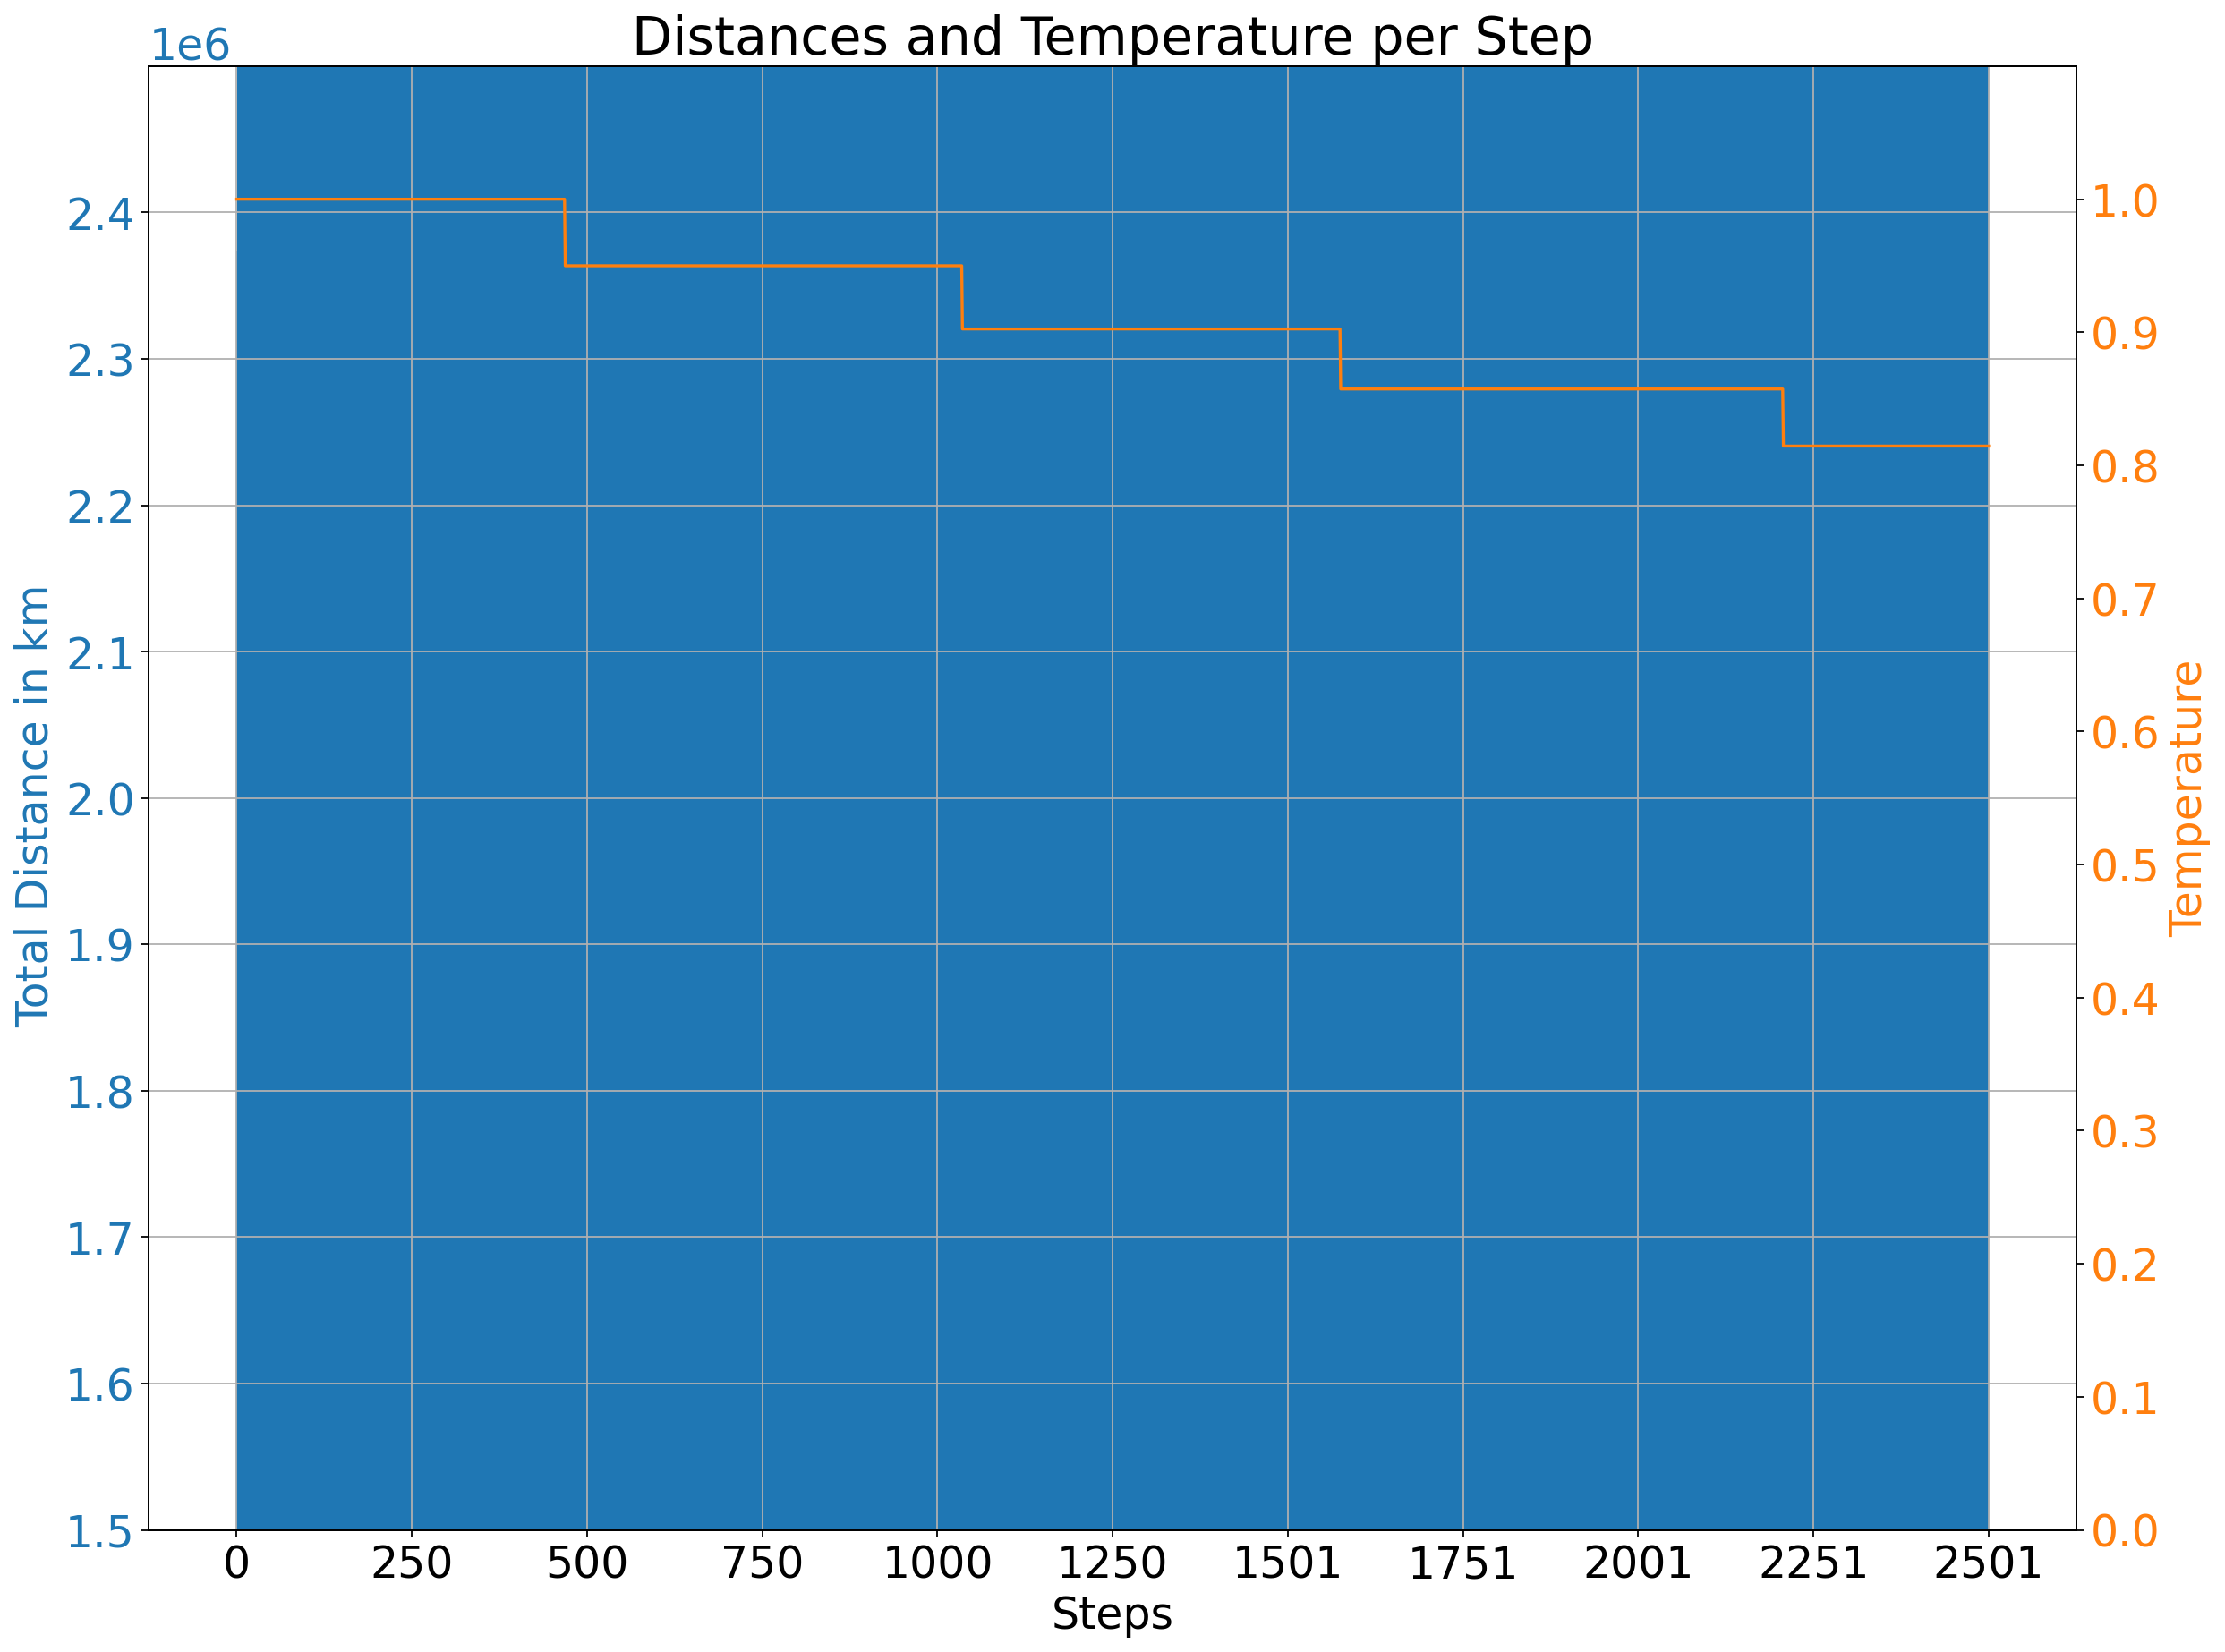

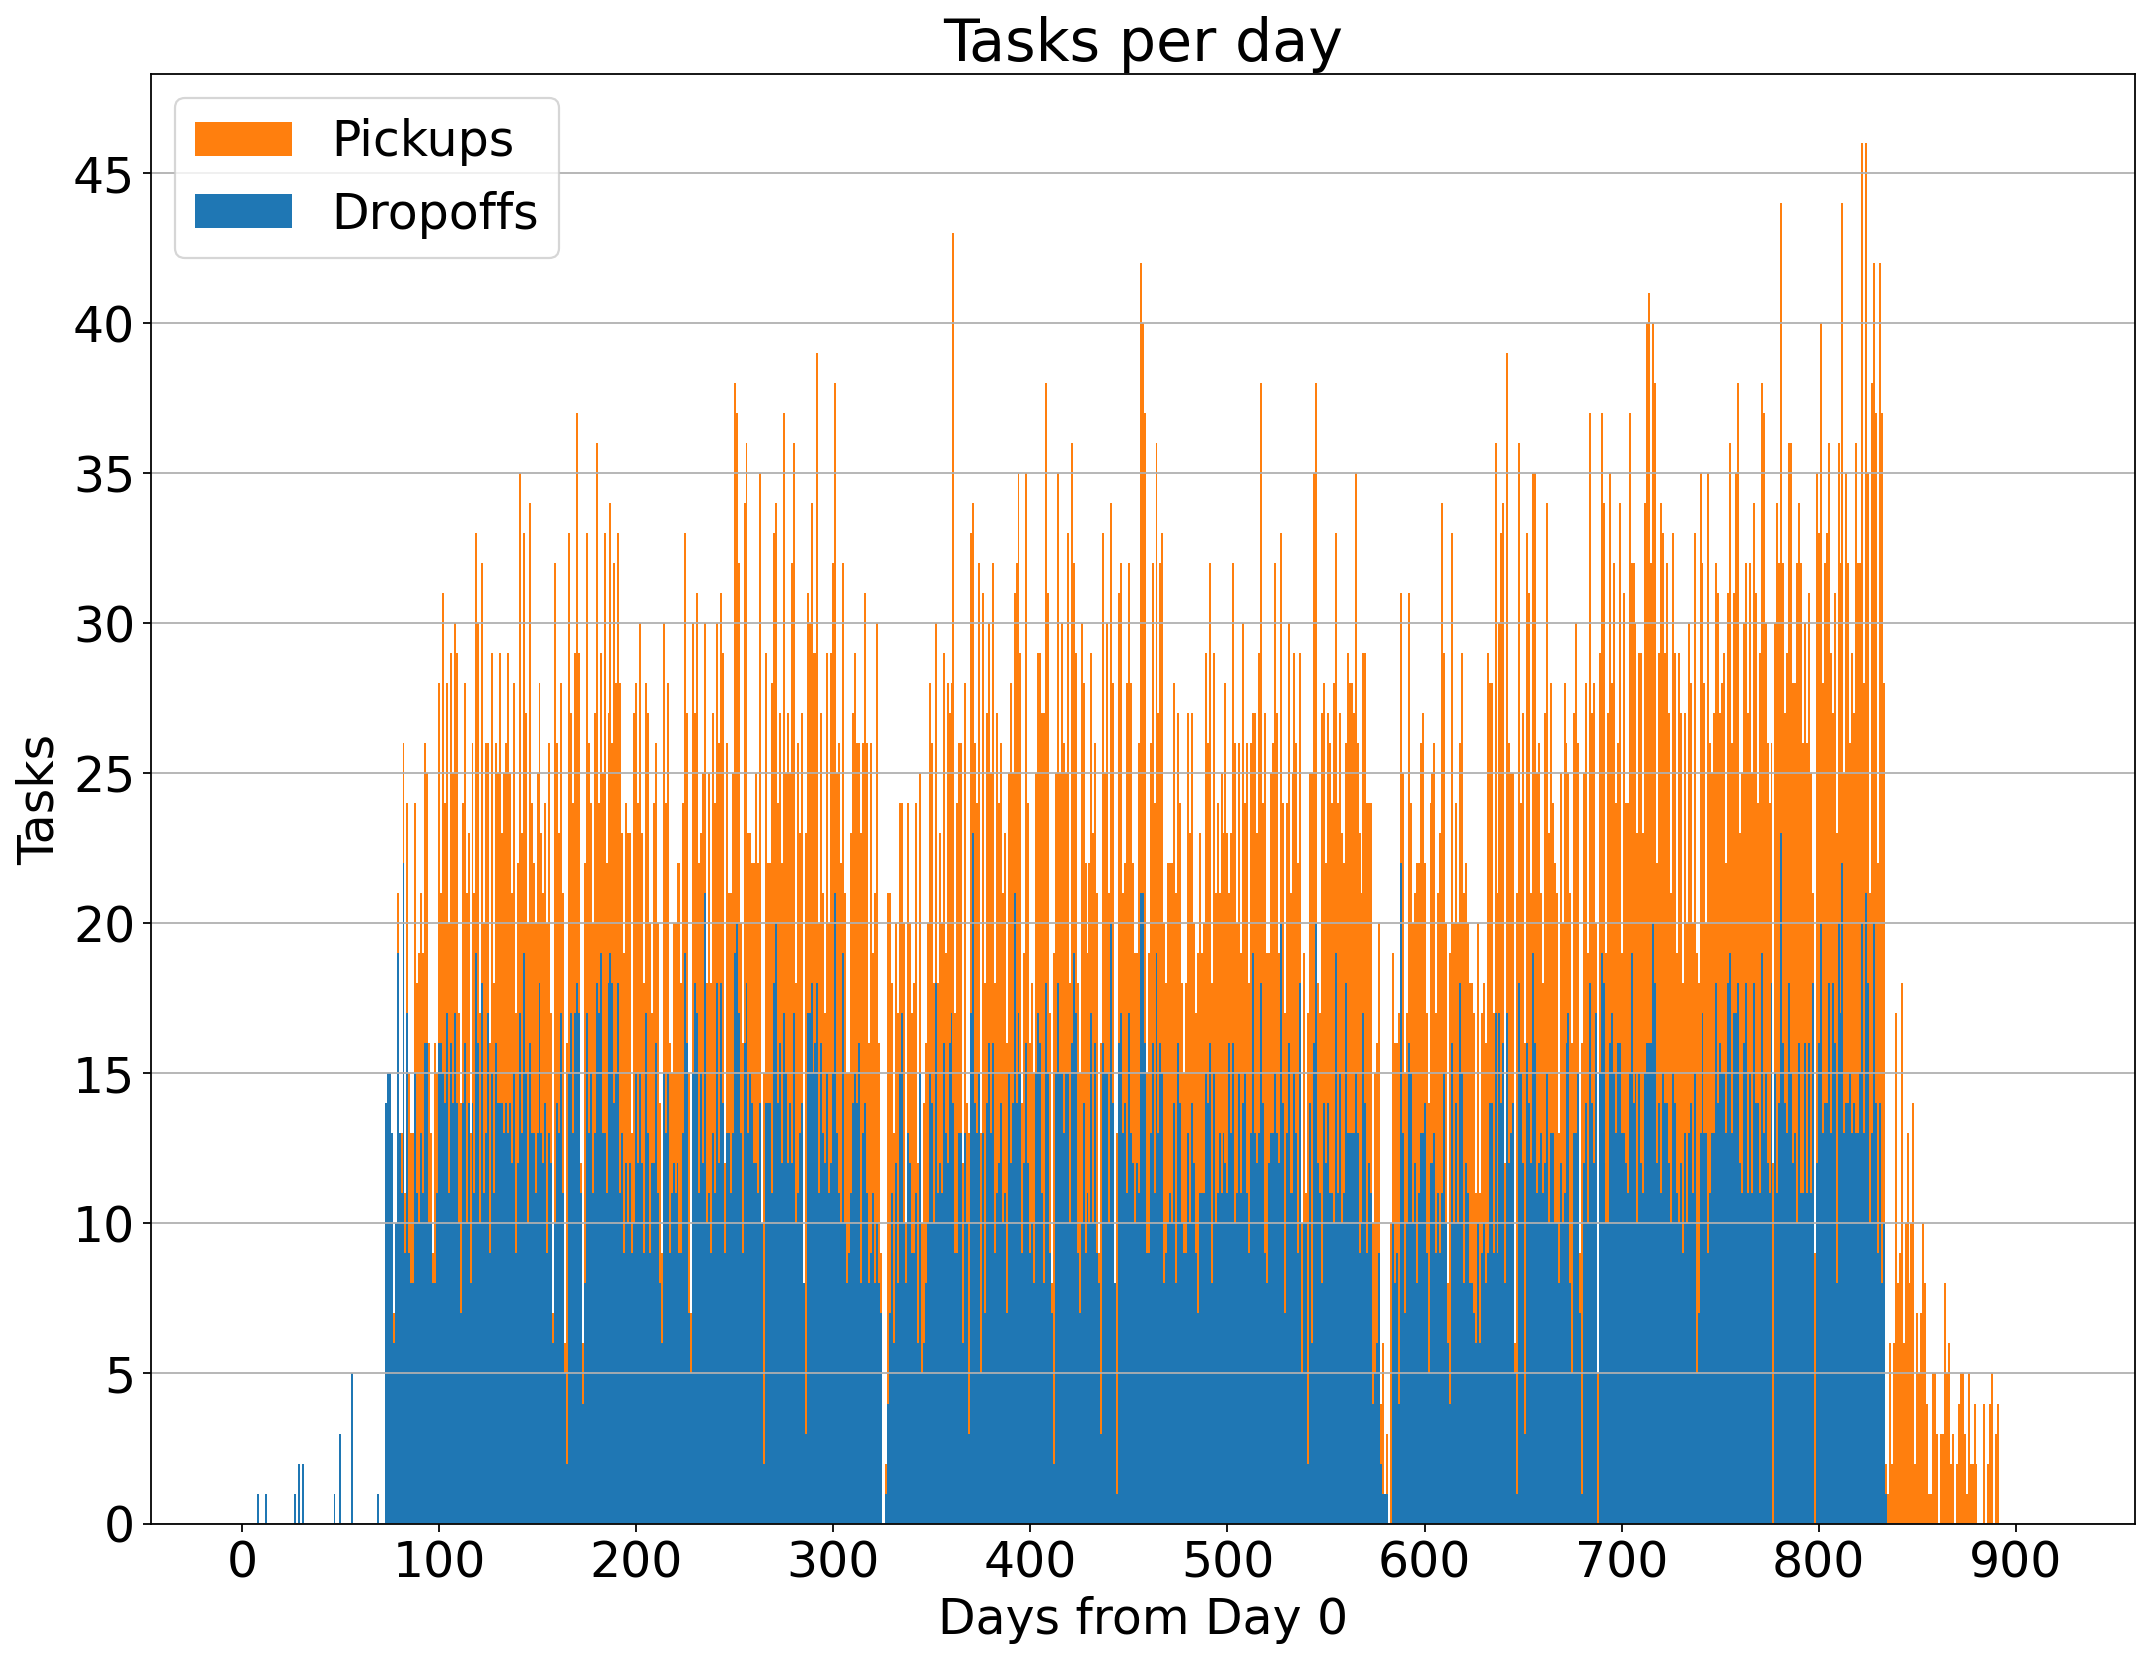

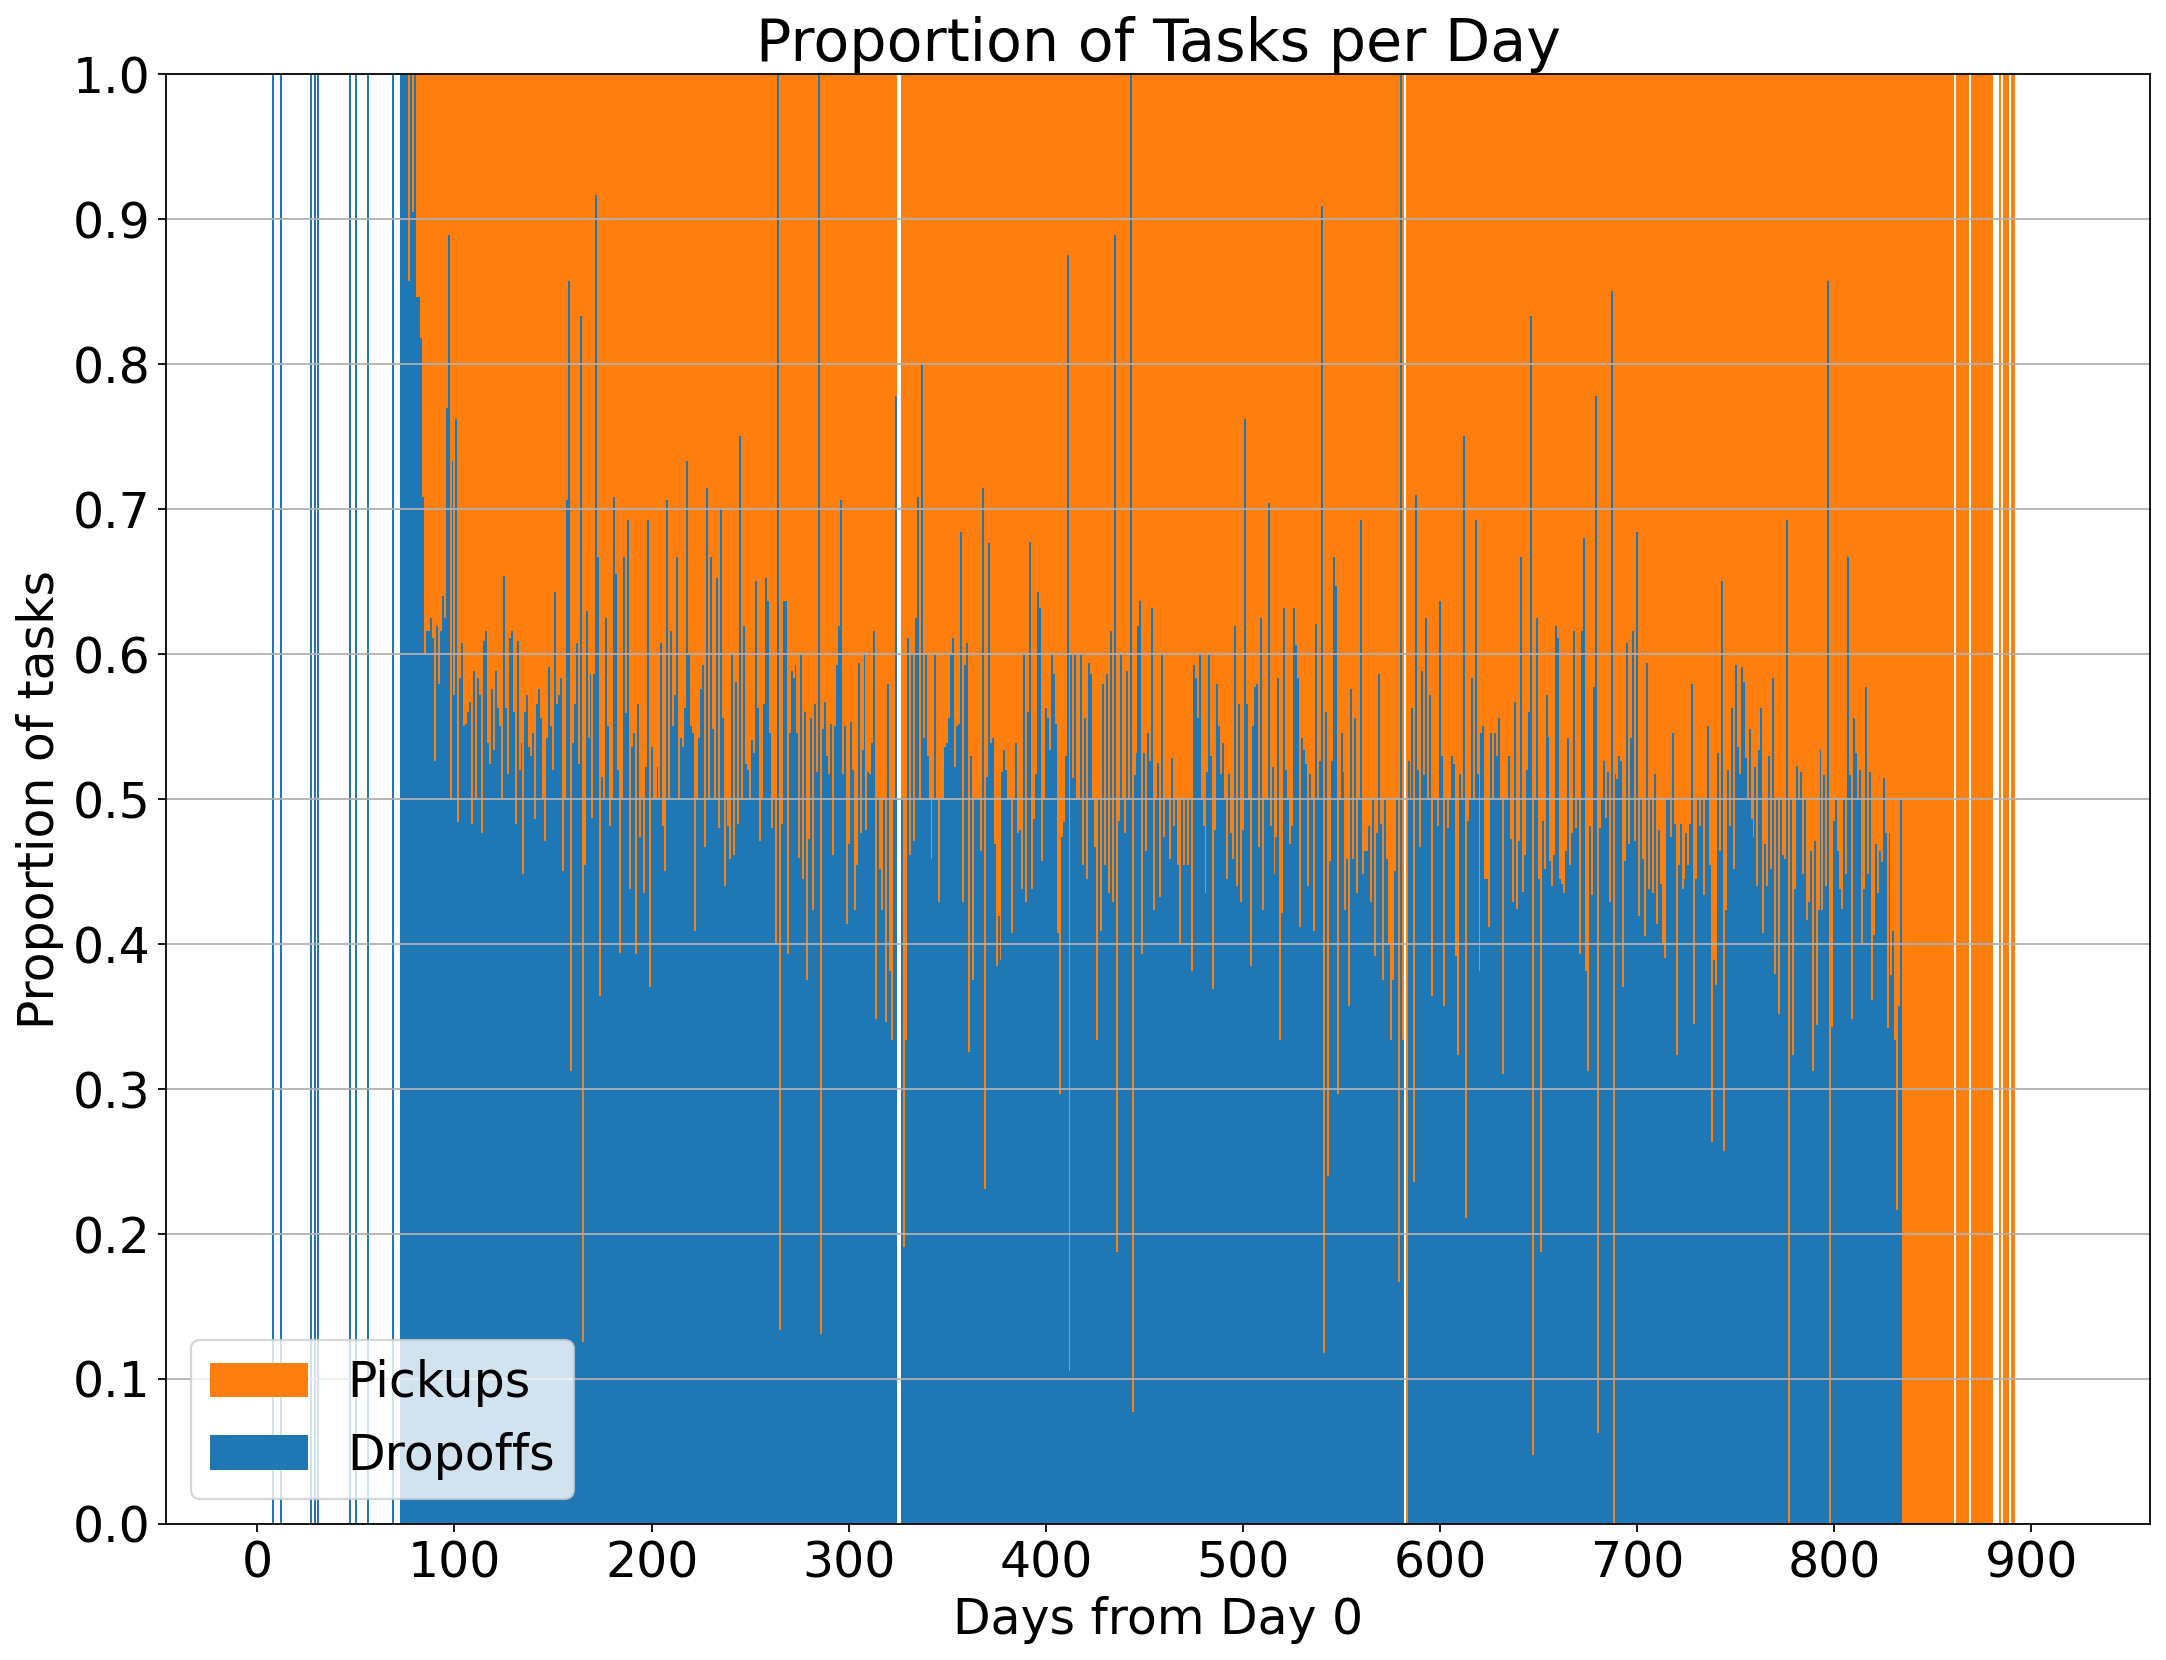

<Figure size 2560x1920 with 0 Axes>

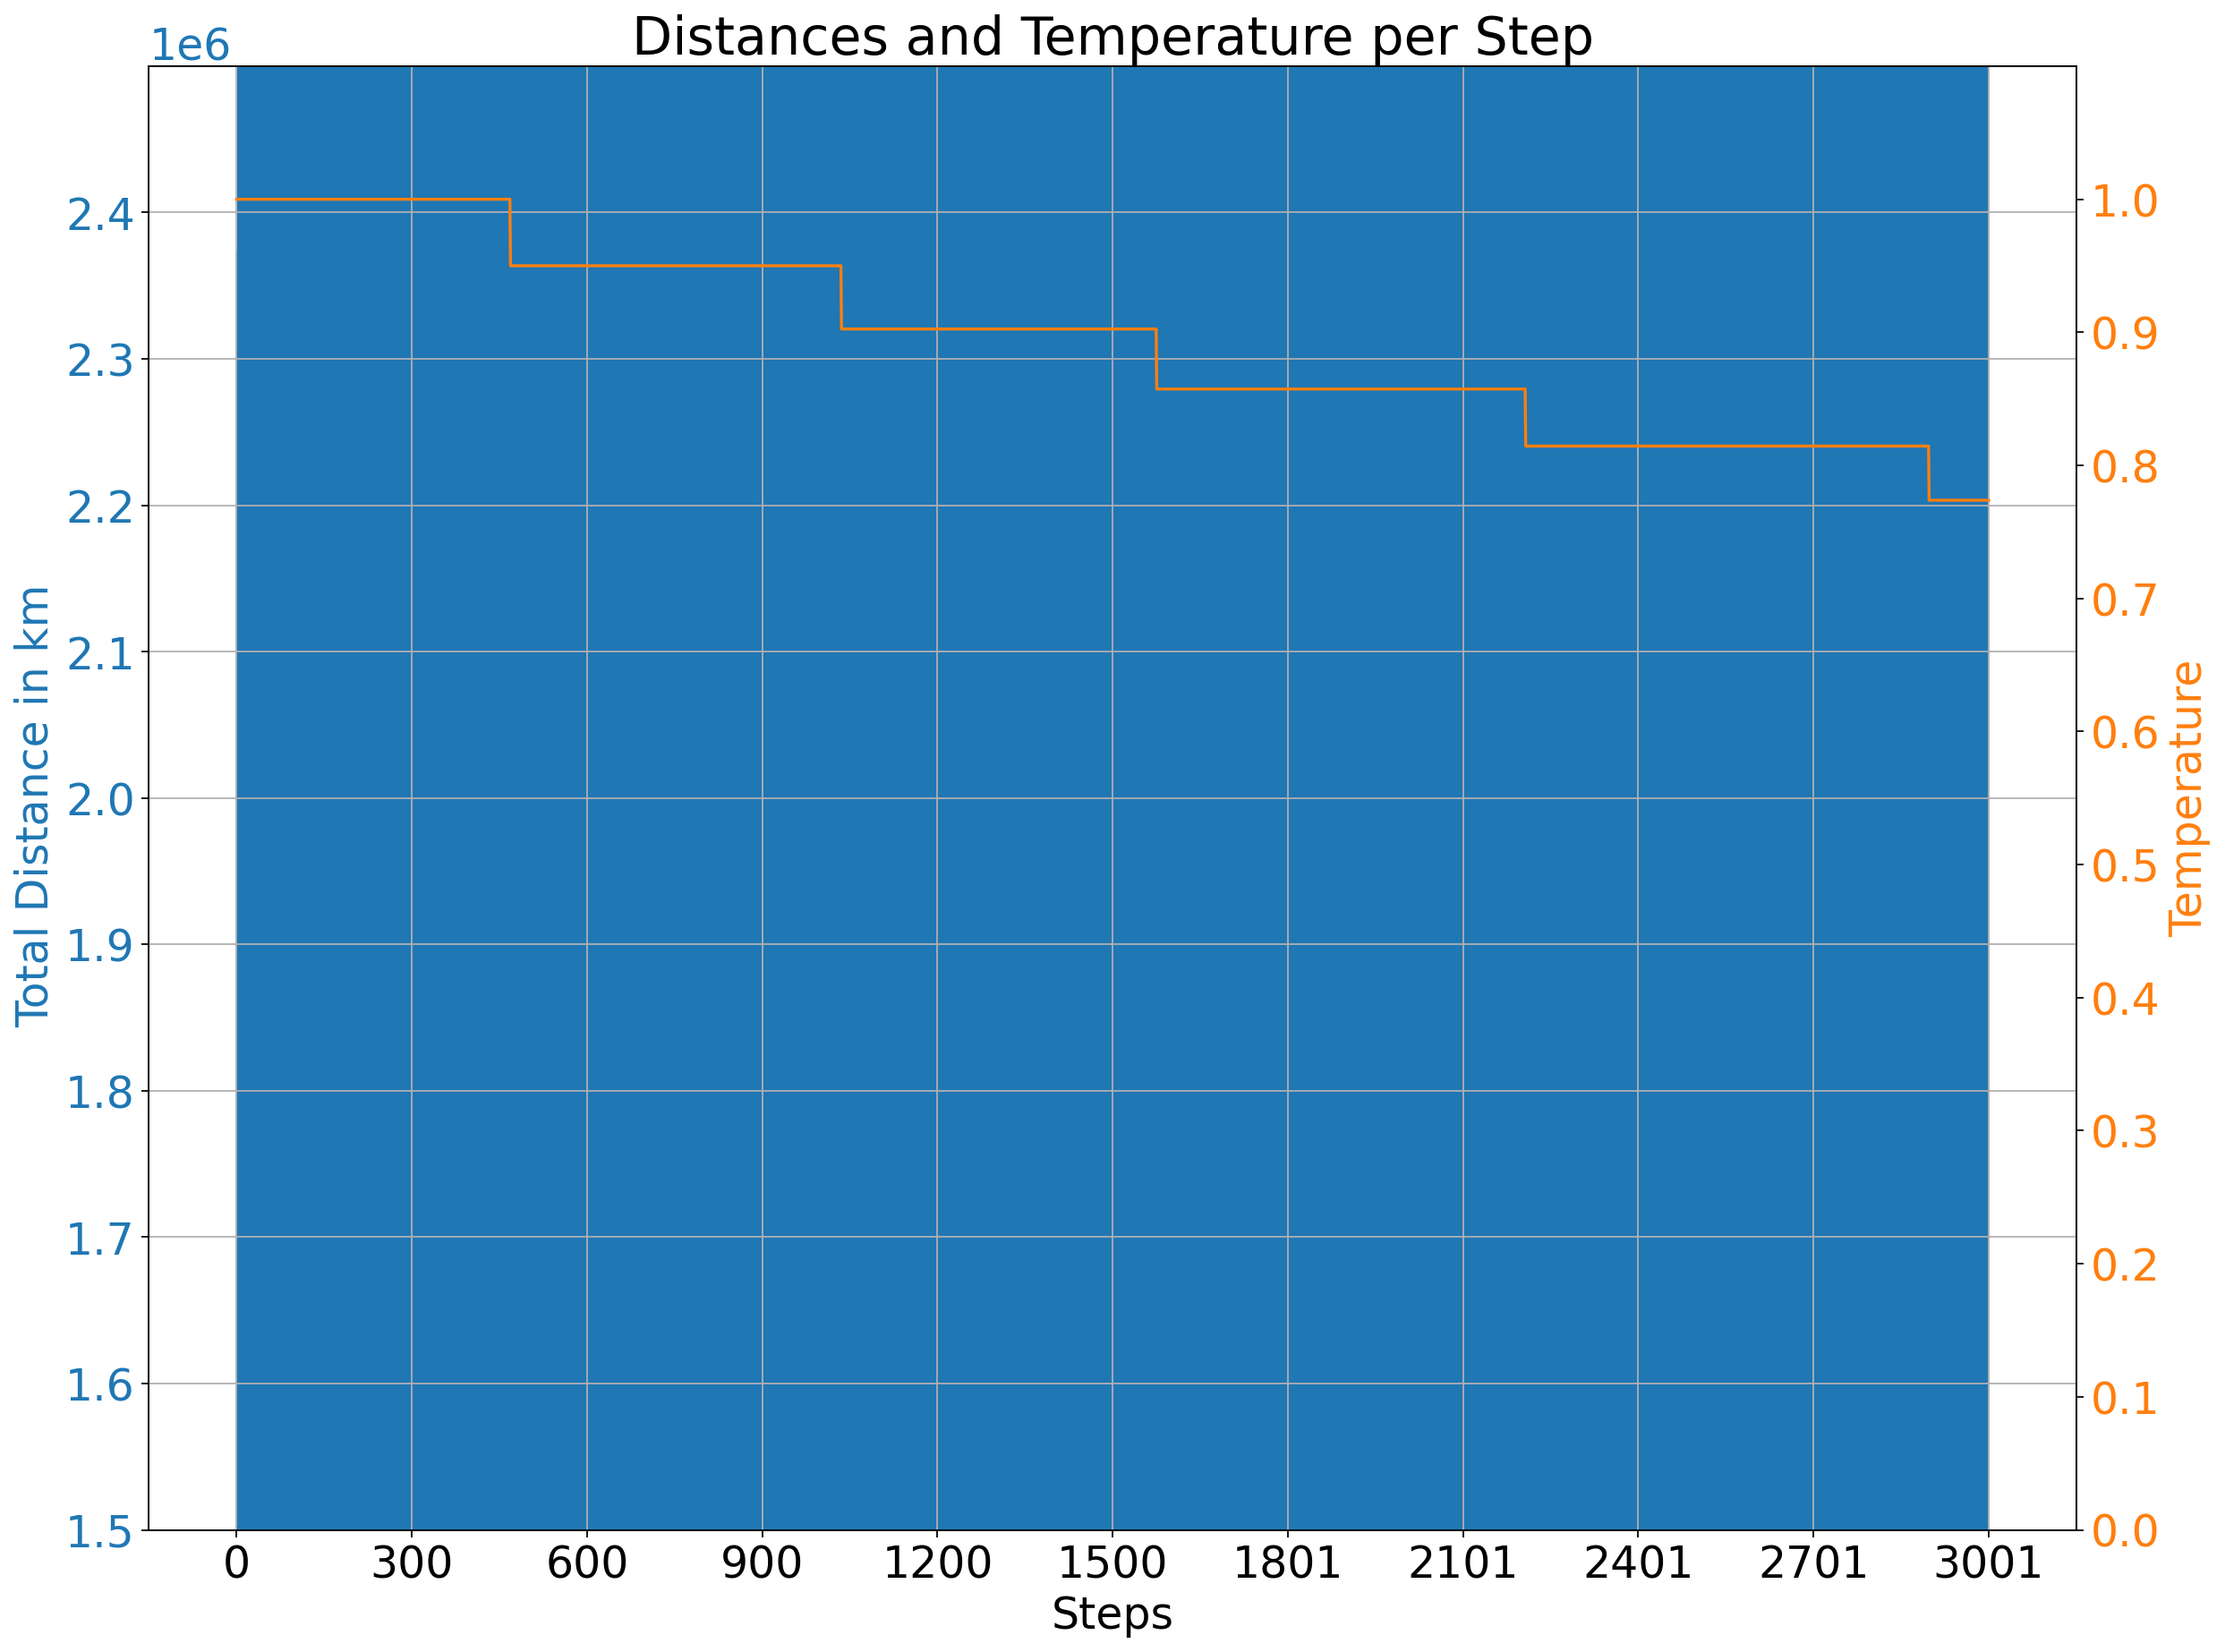

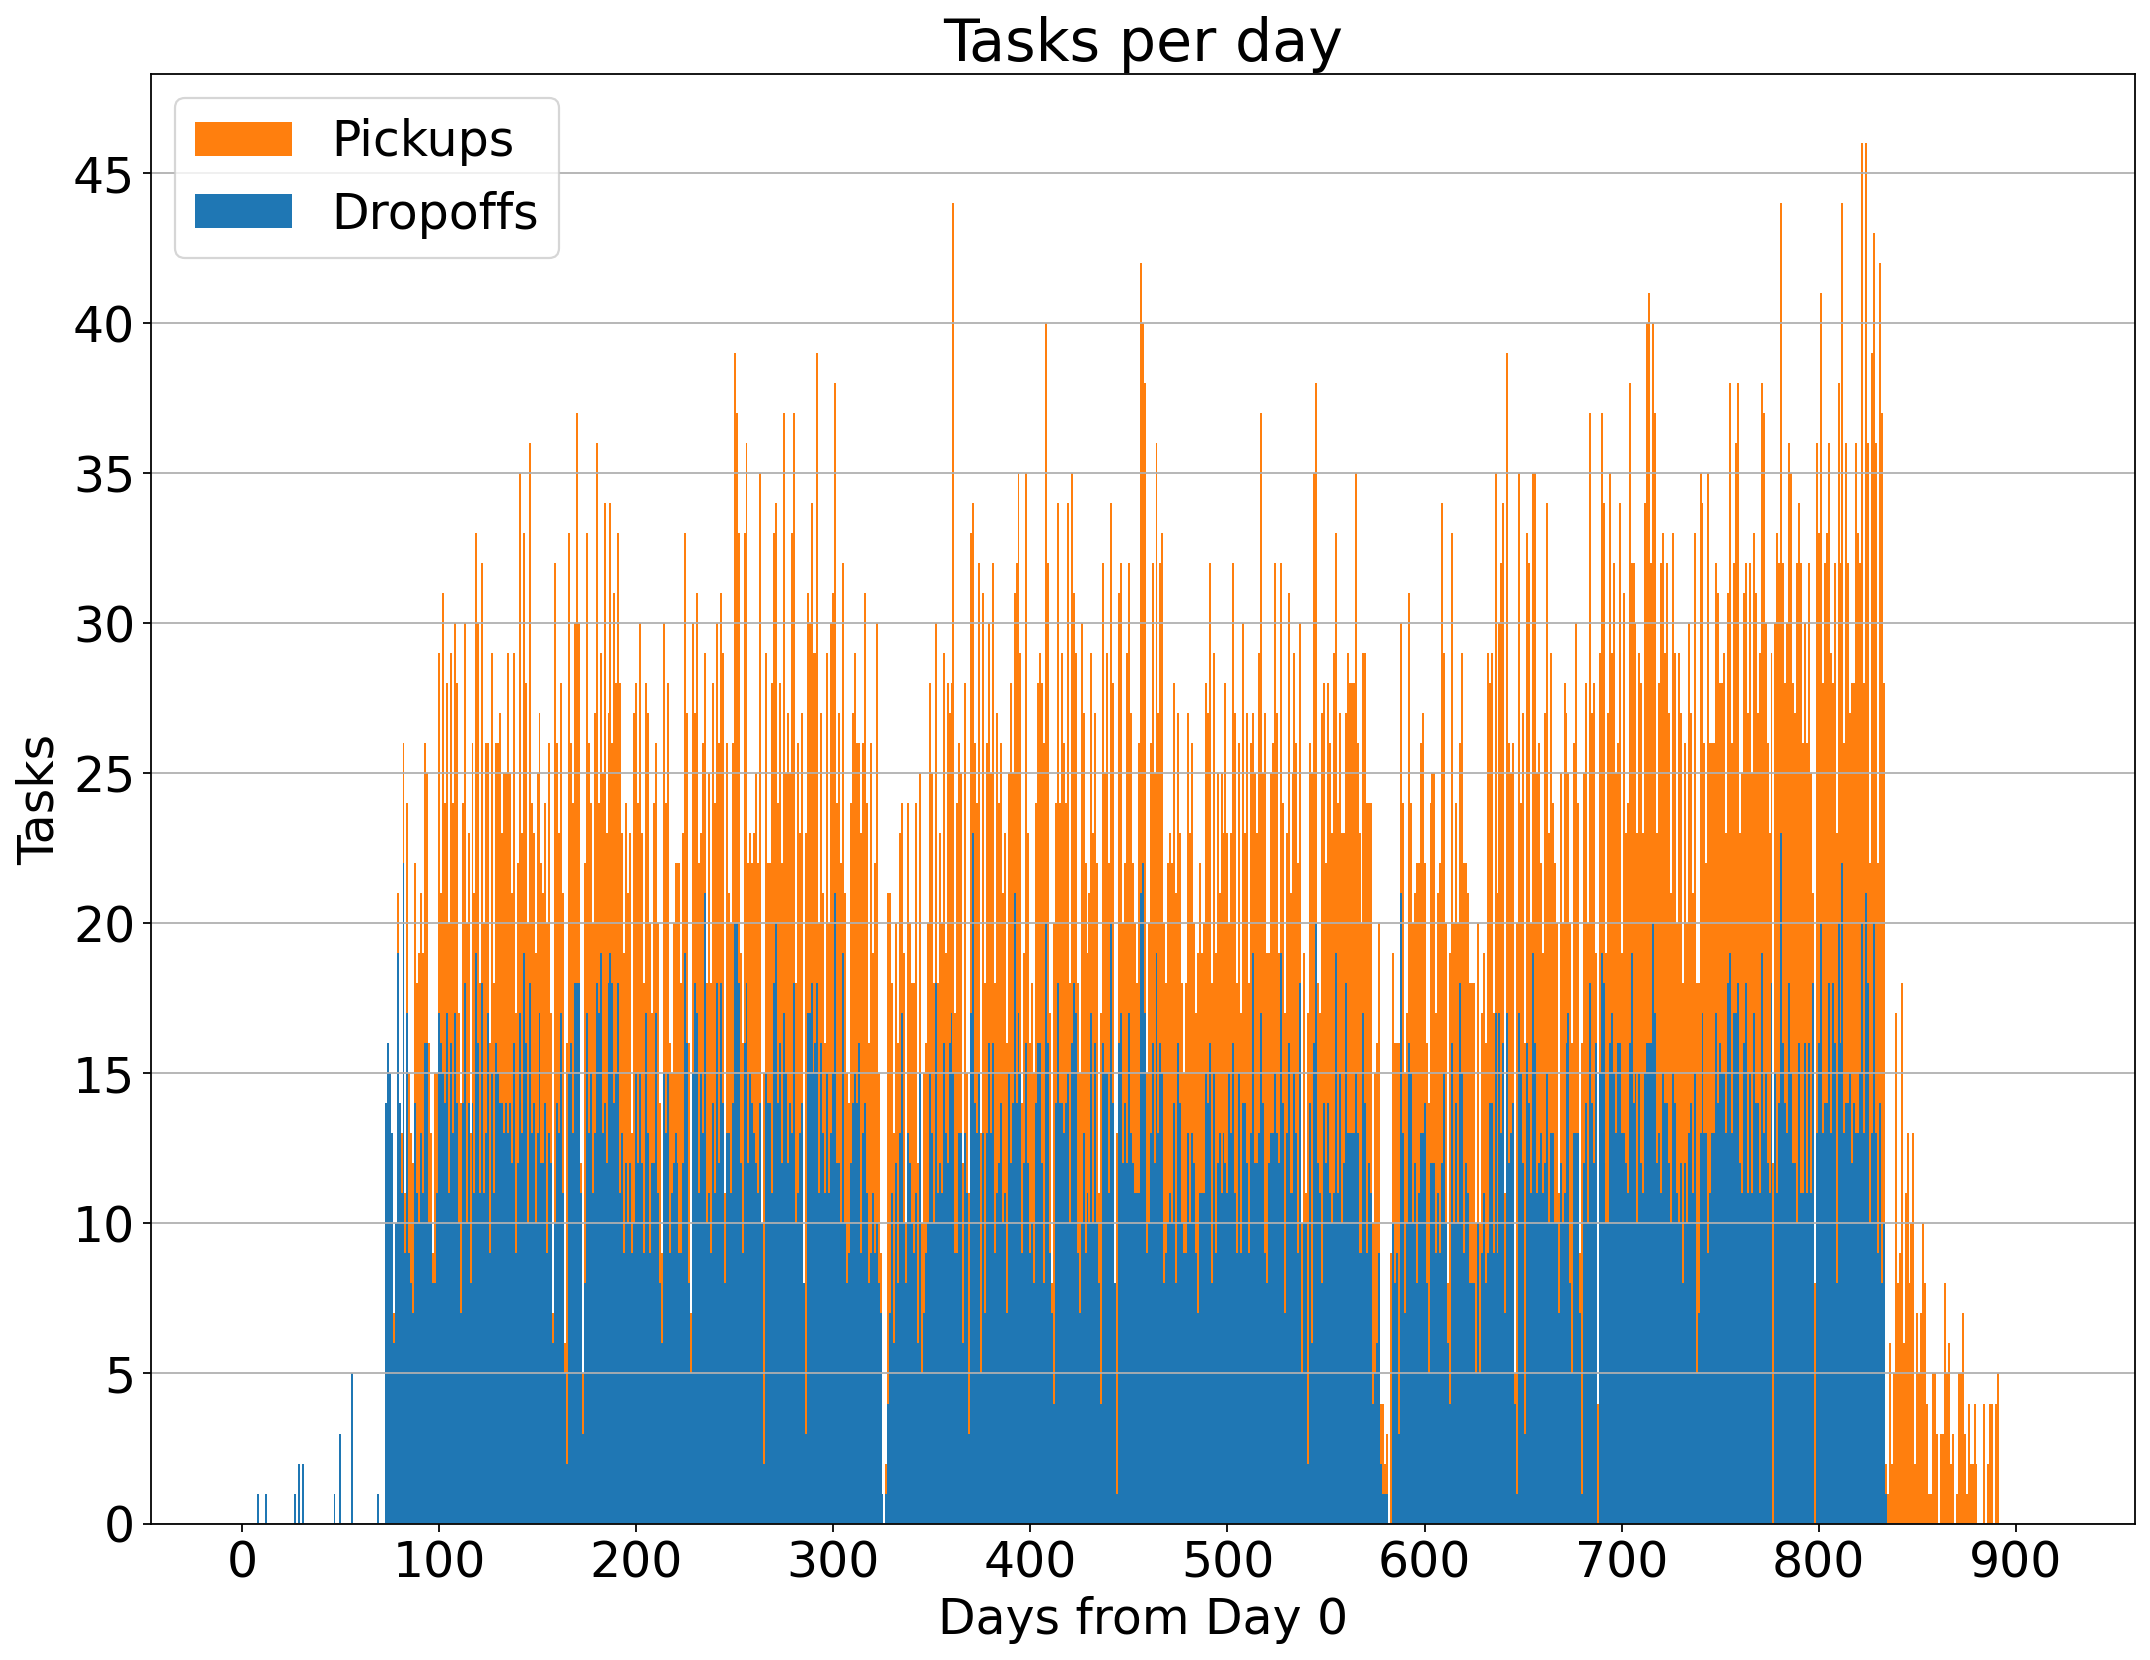

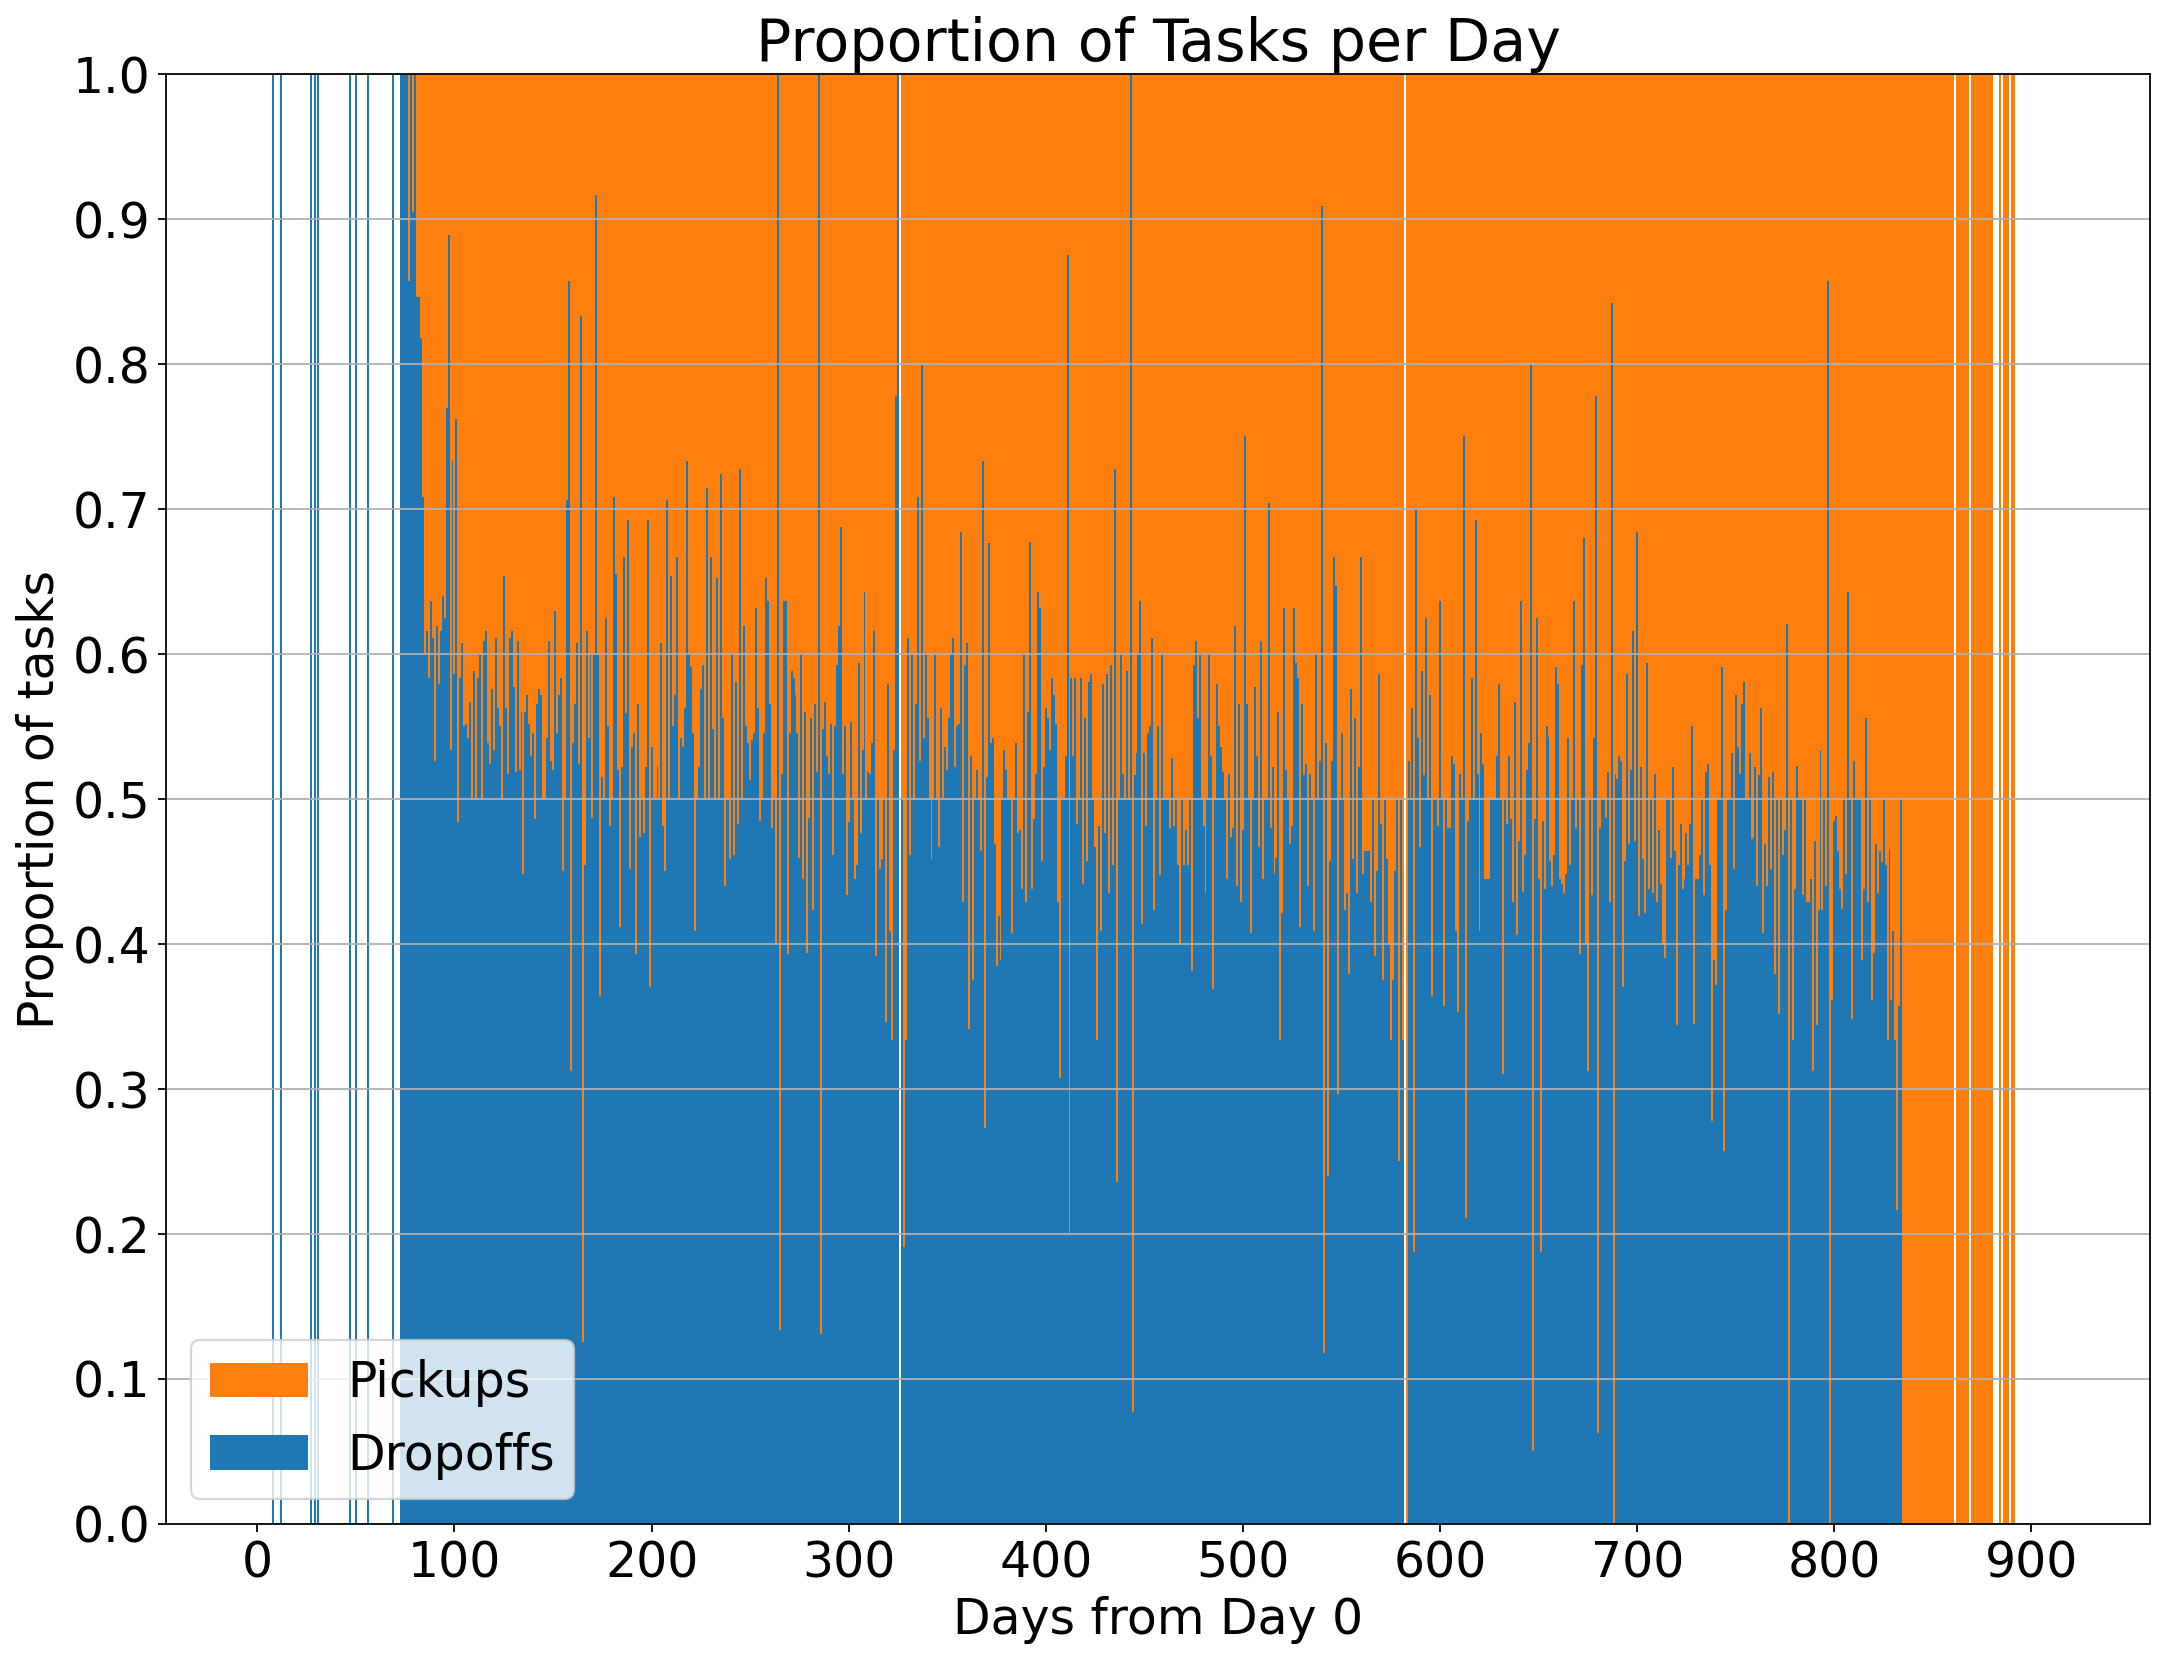

<Figure size 2560x1920 with 0 Axes>

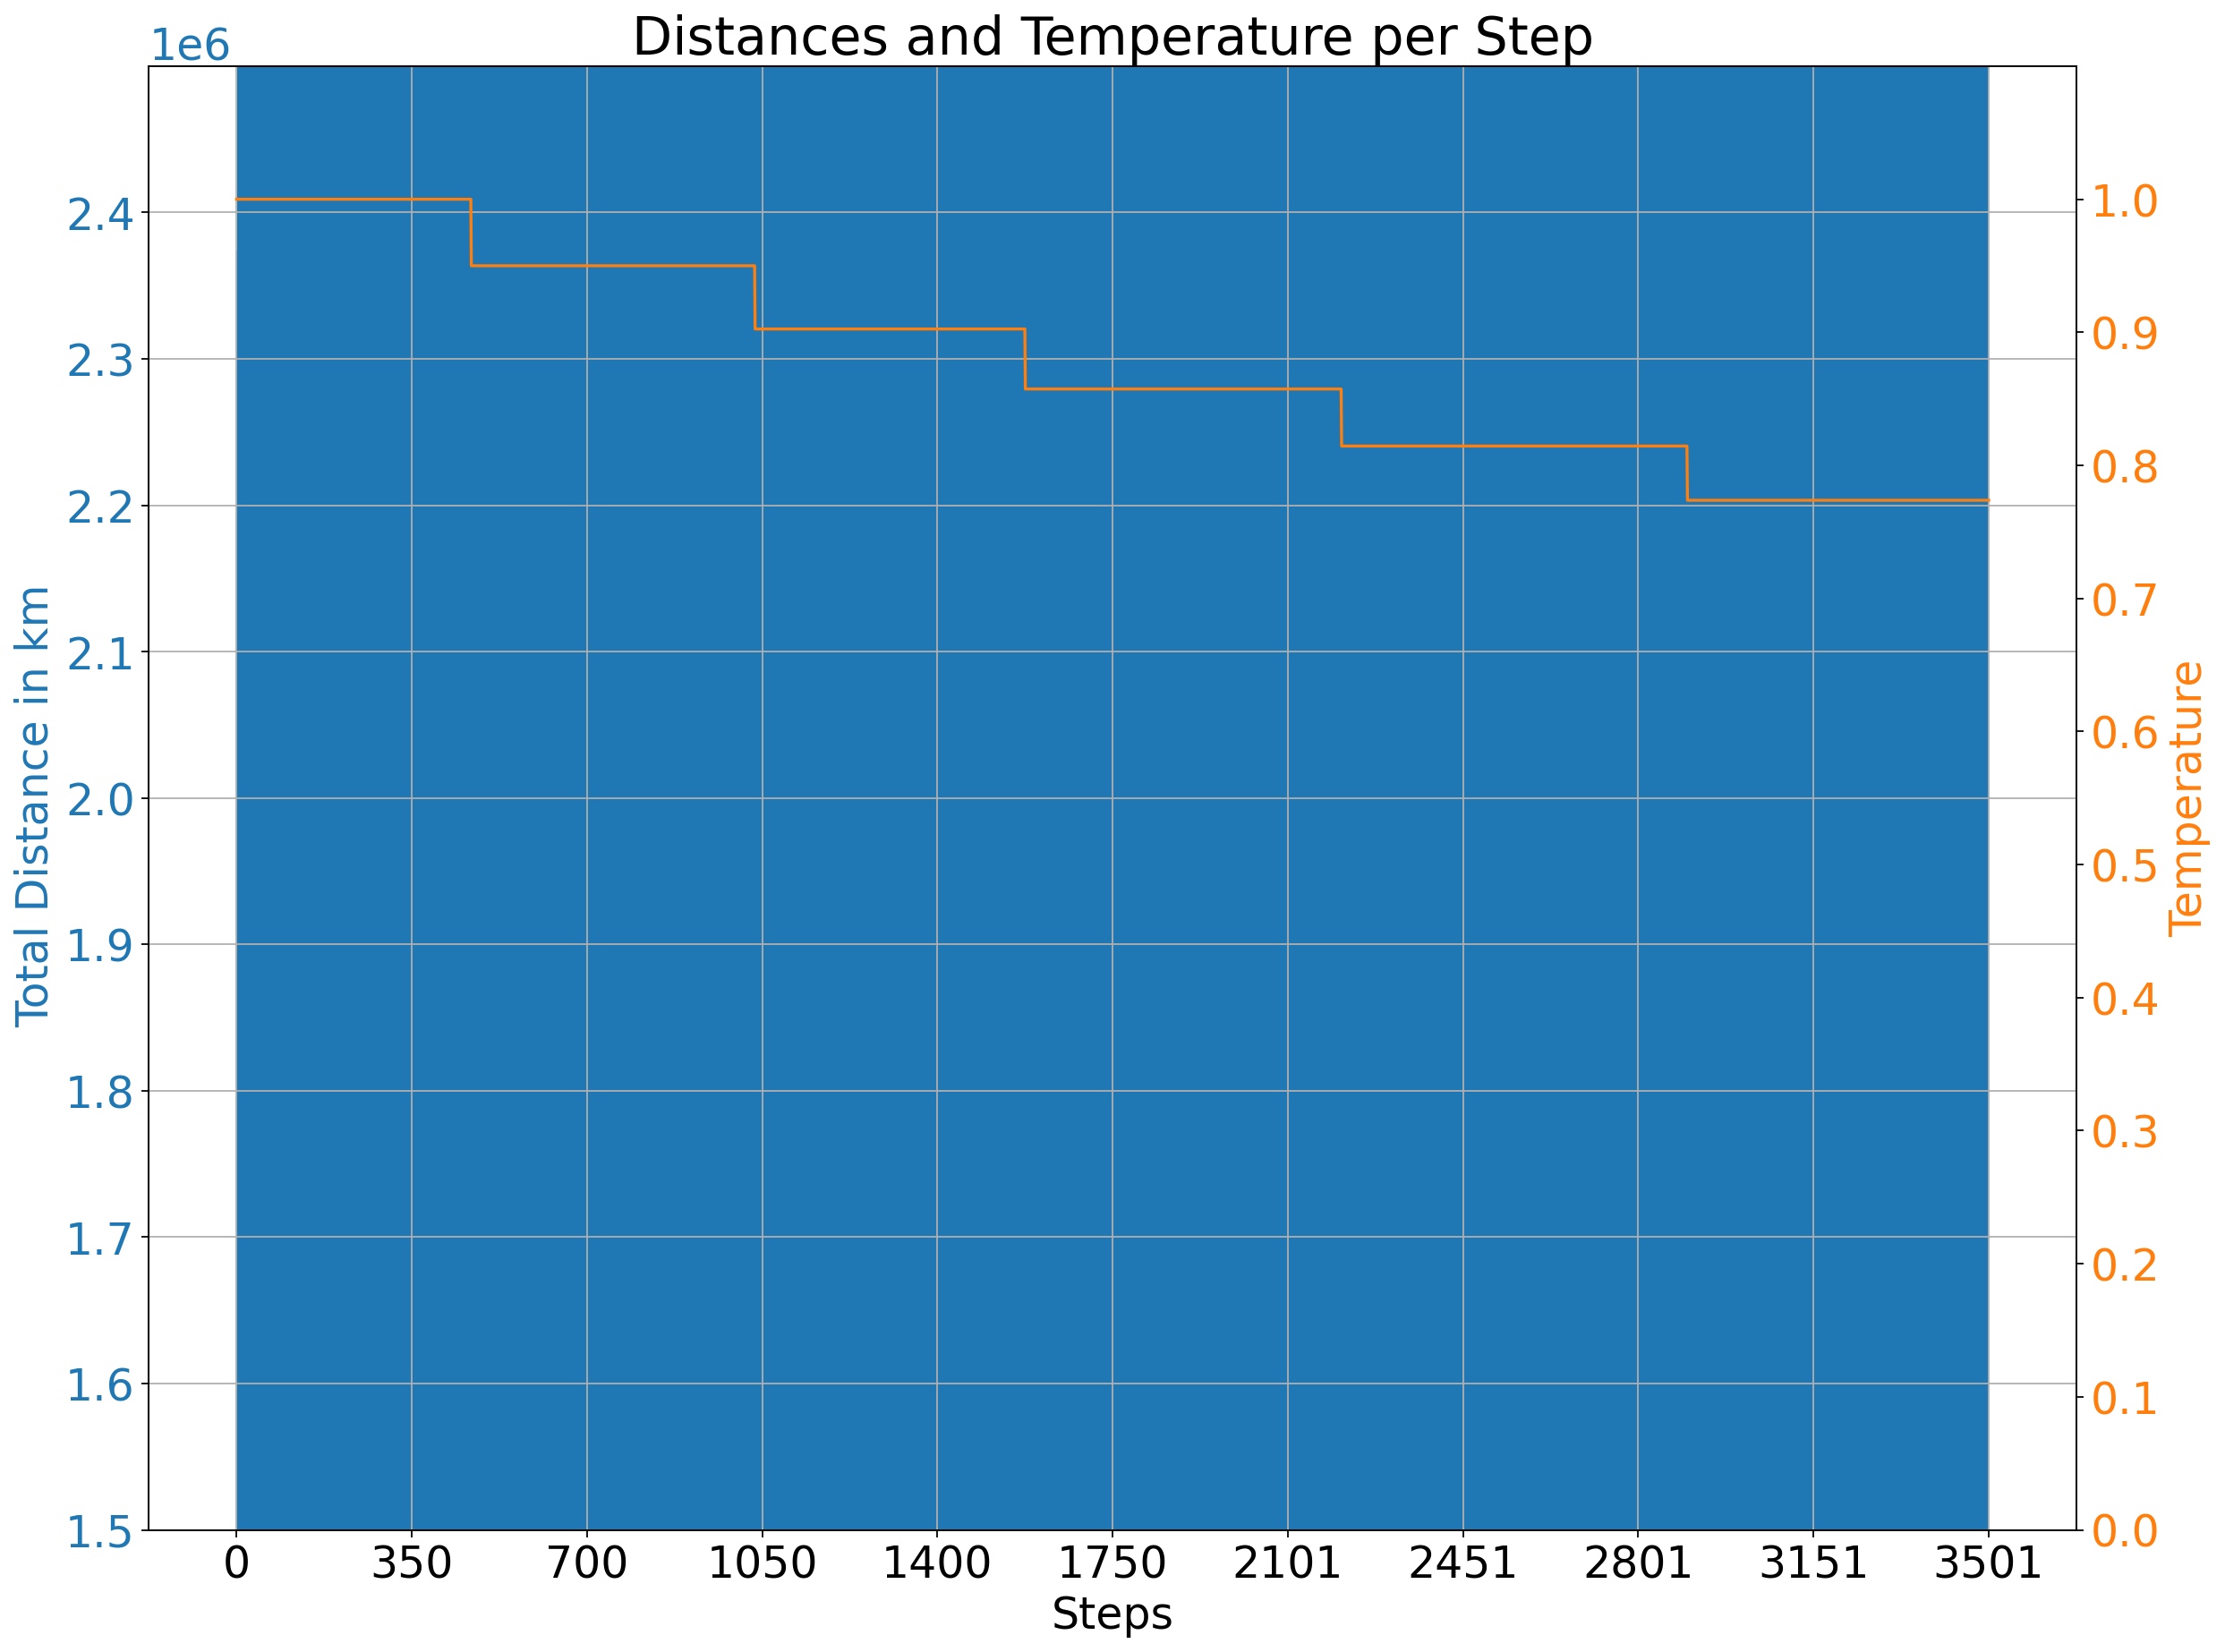

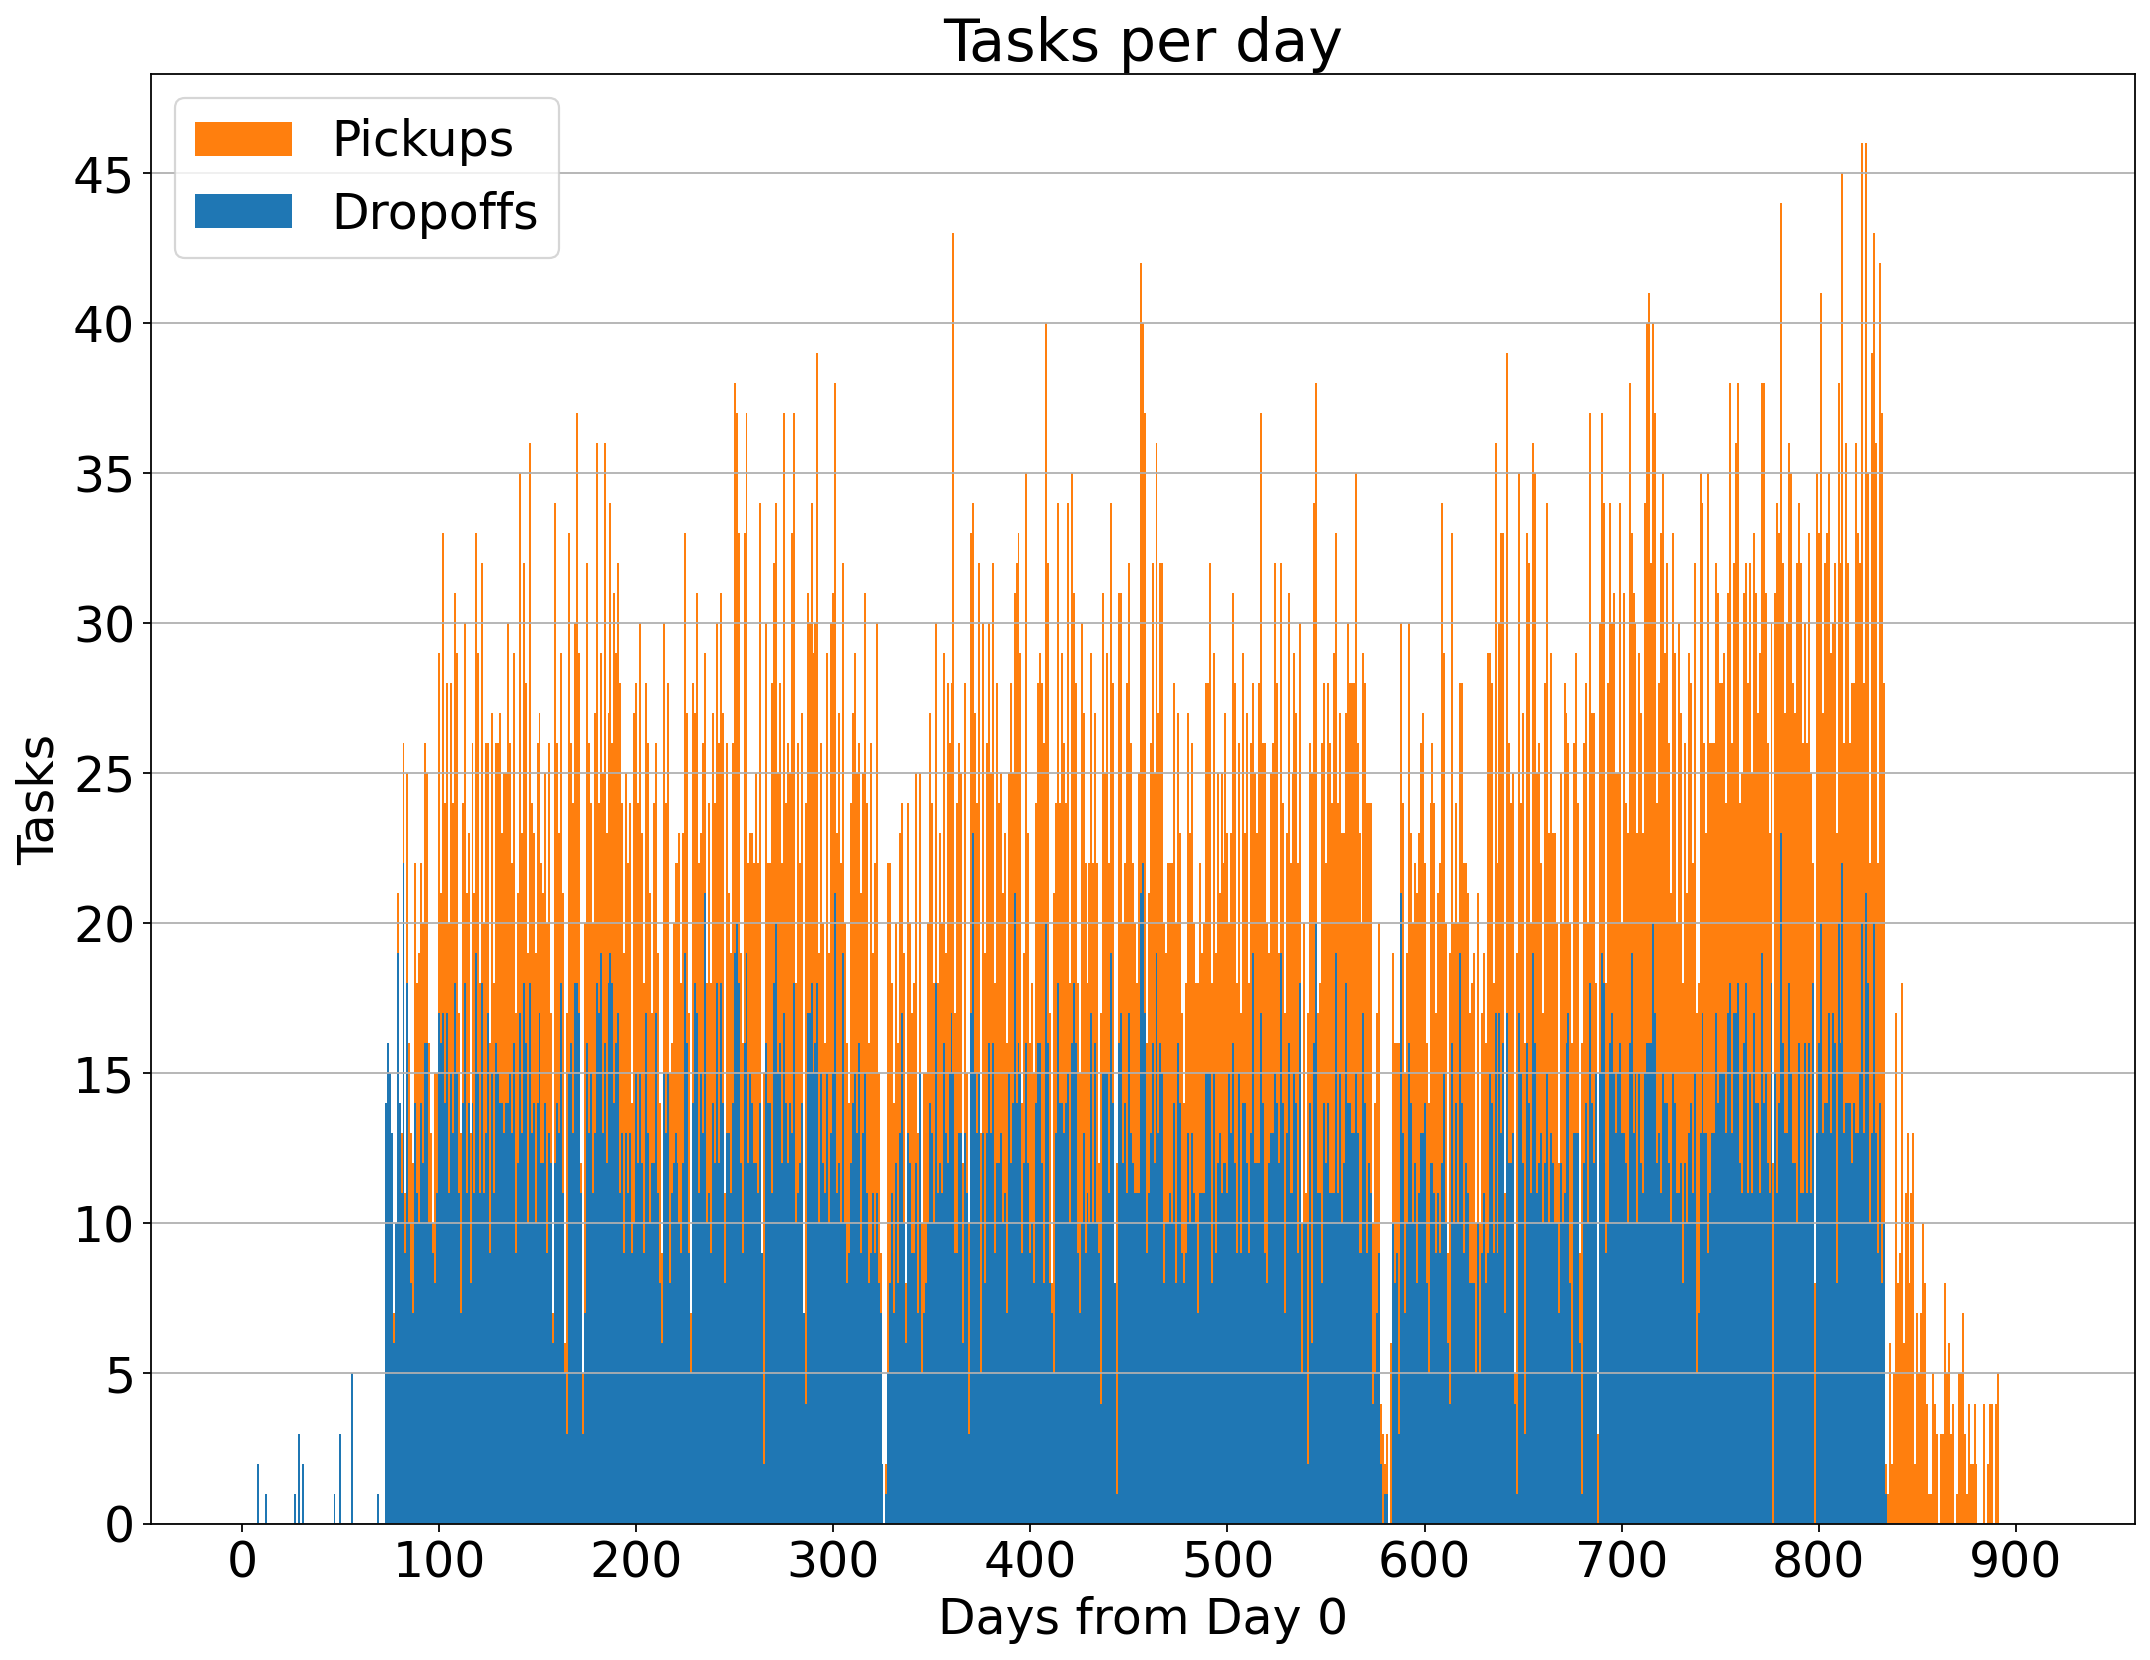

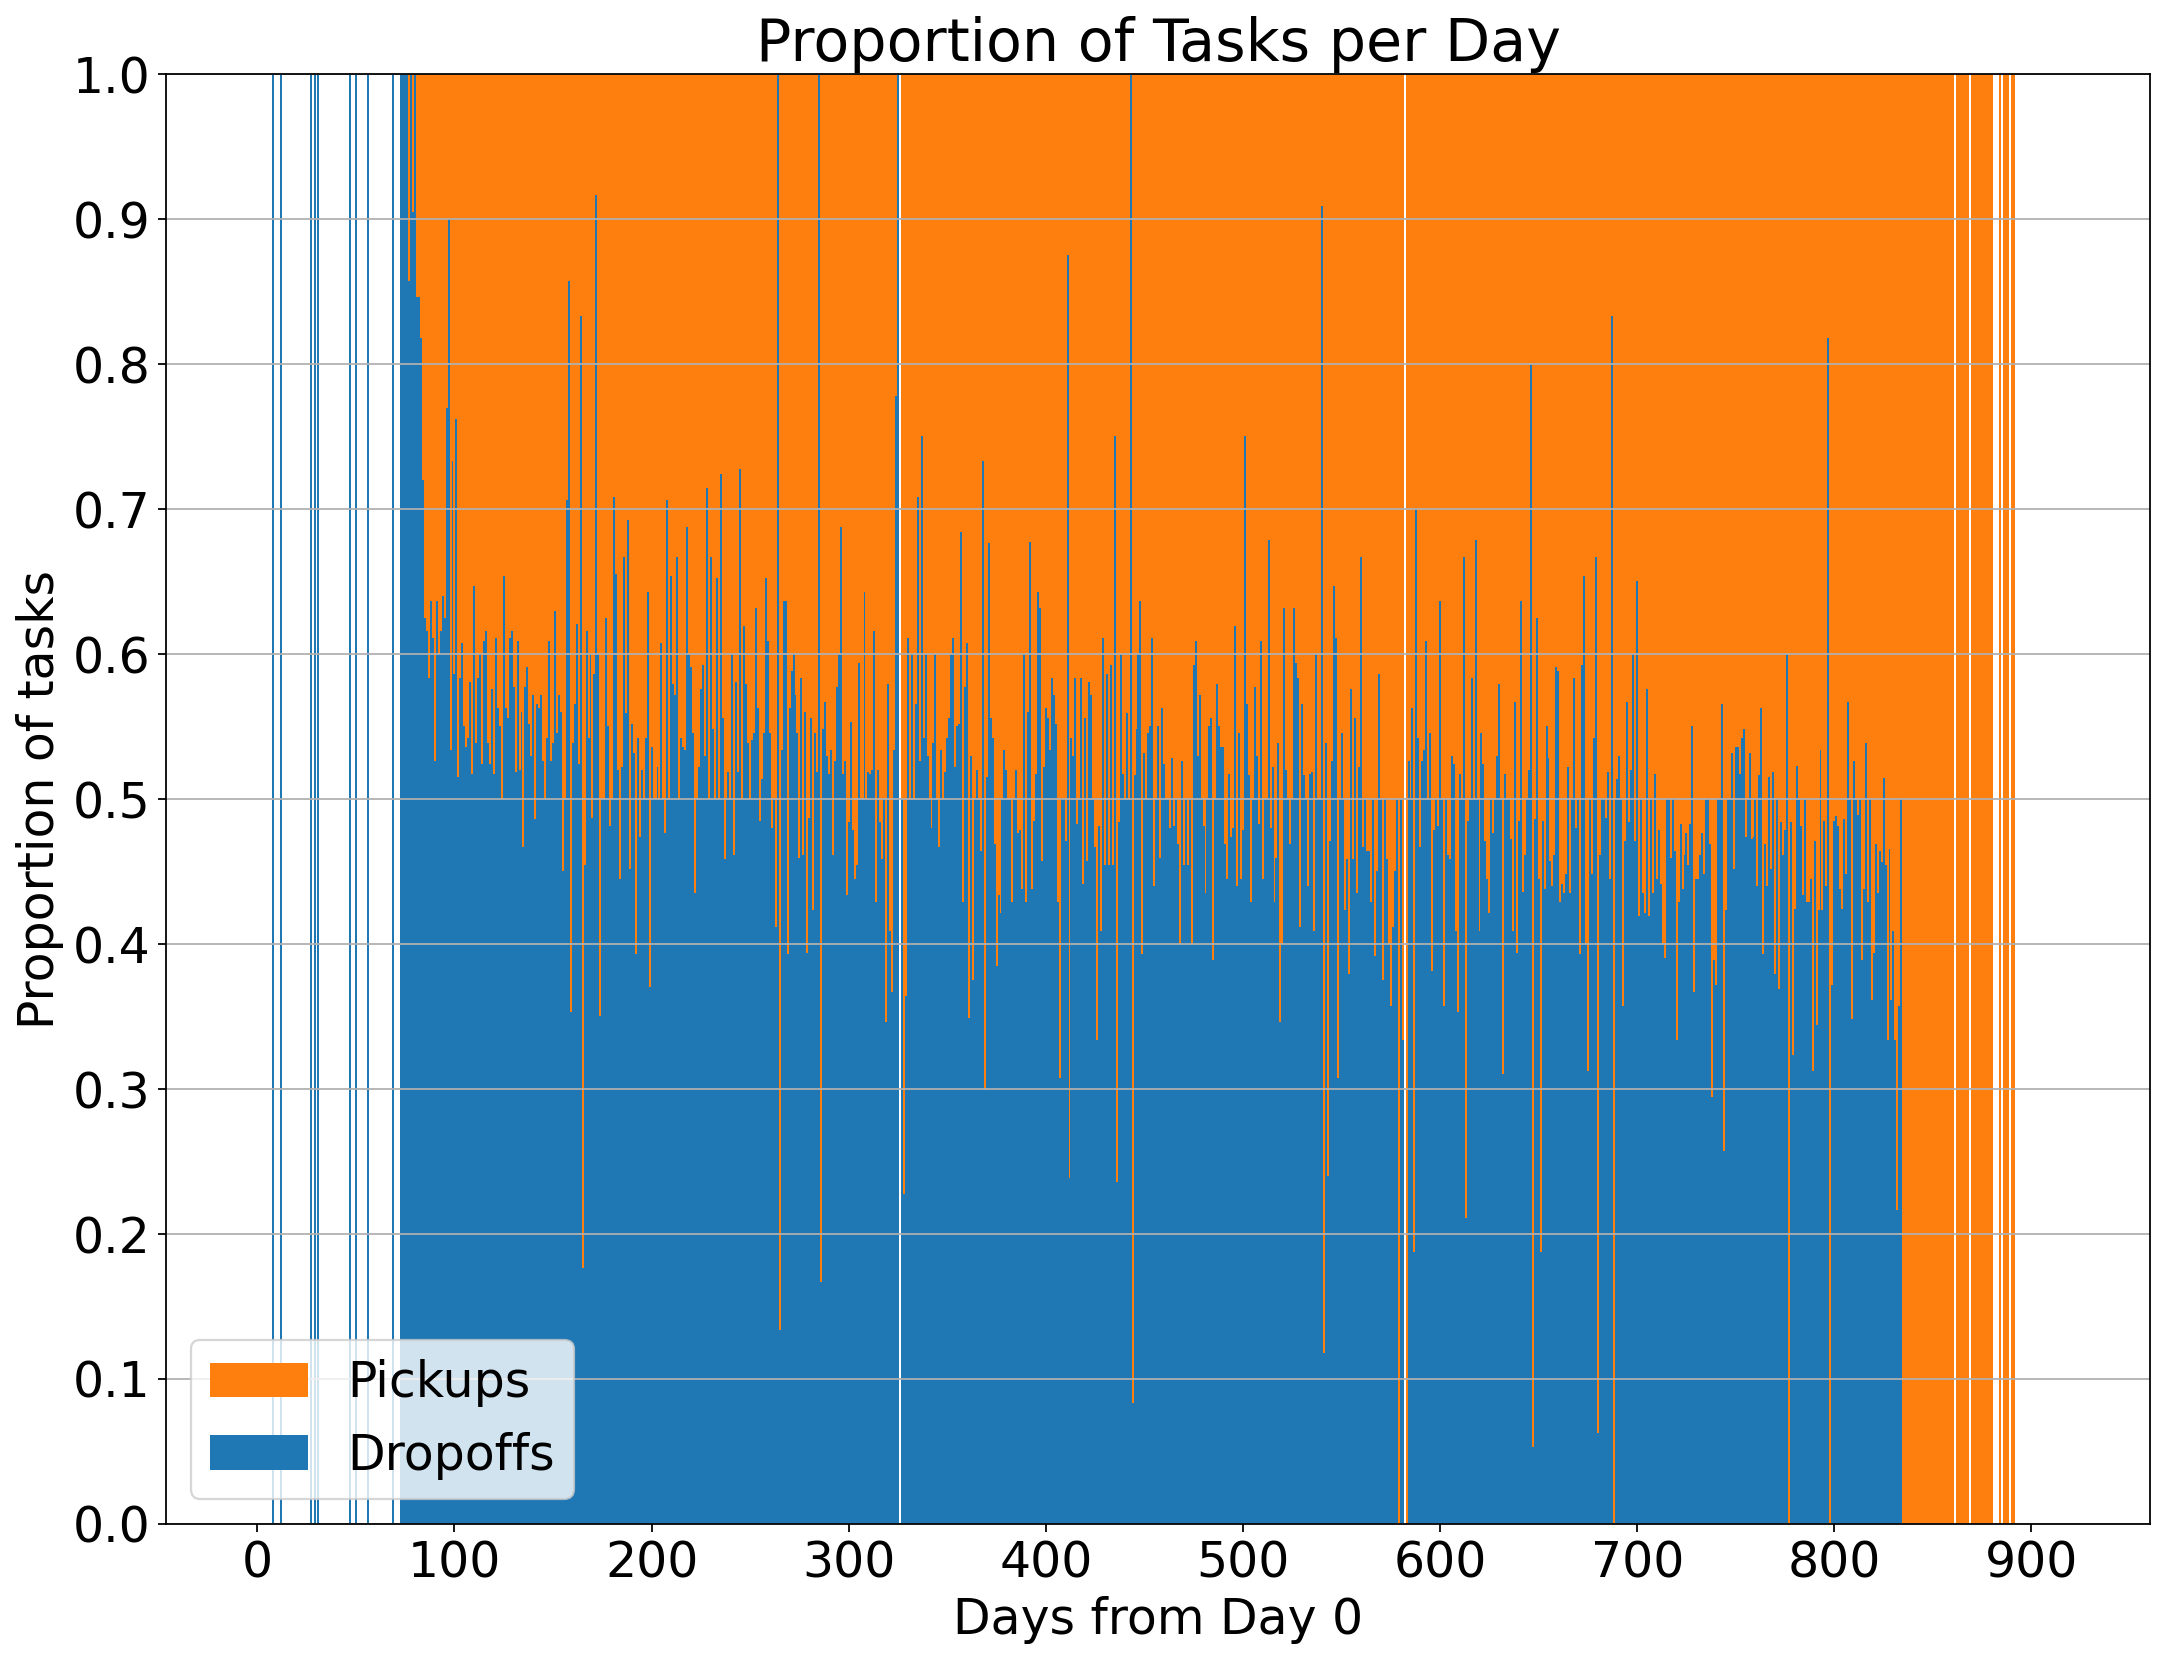

<Figure size 2560x1920 with 0 Axes>

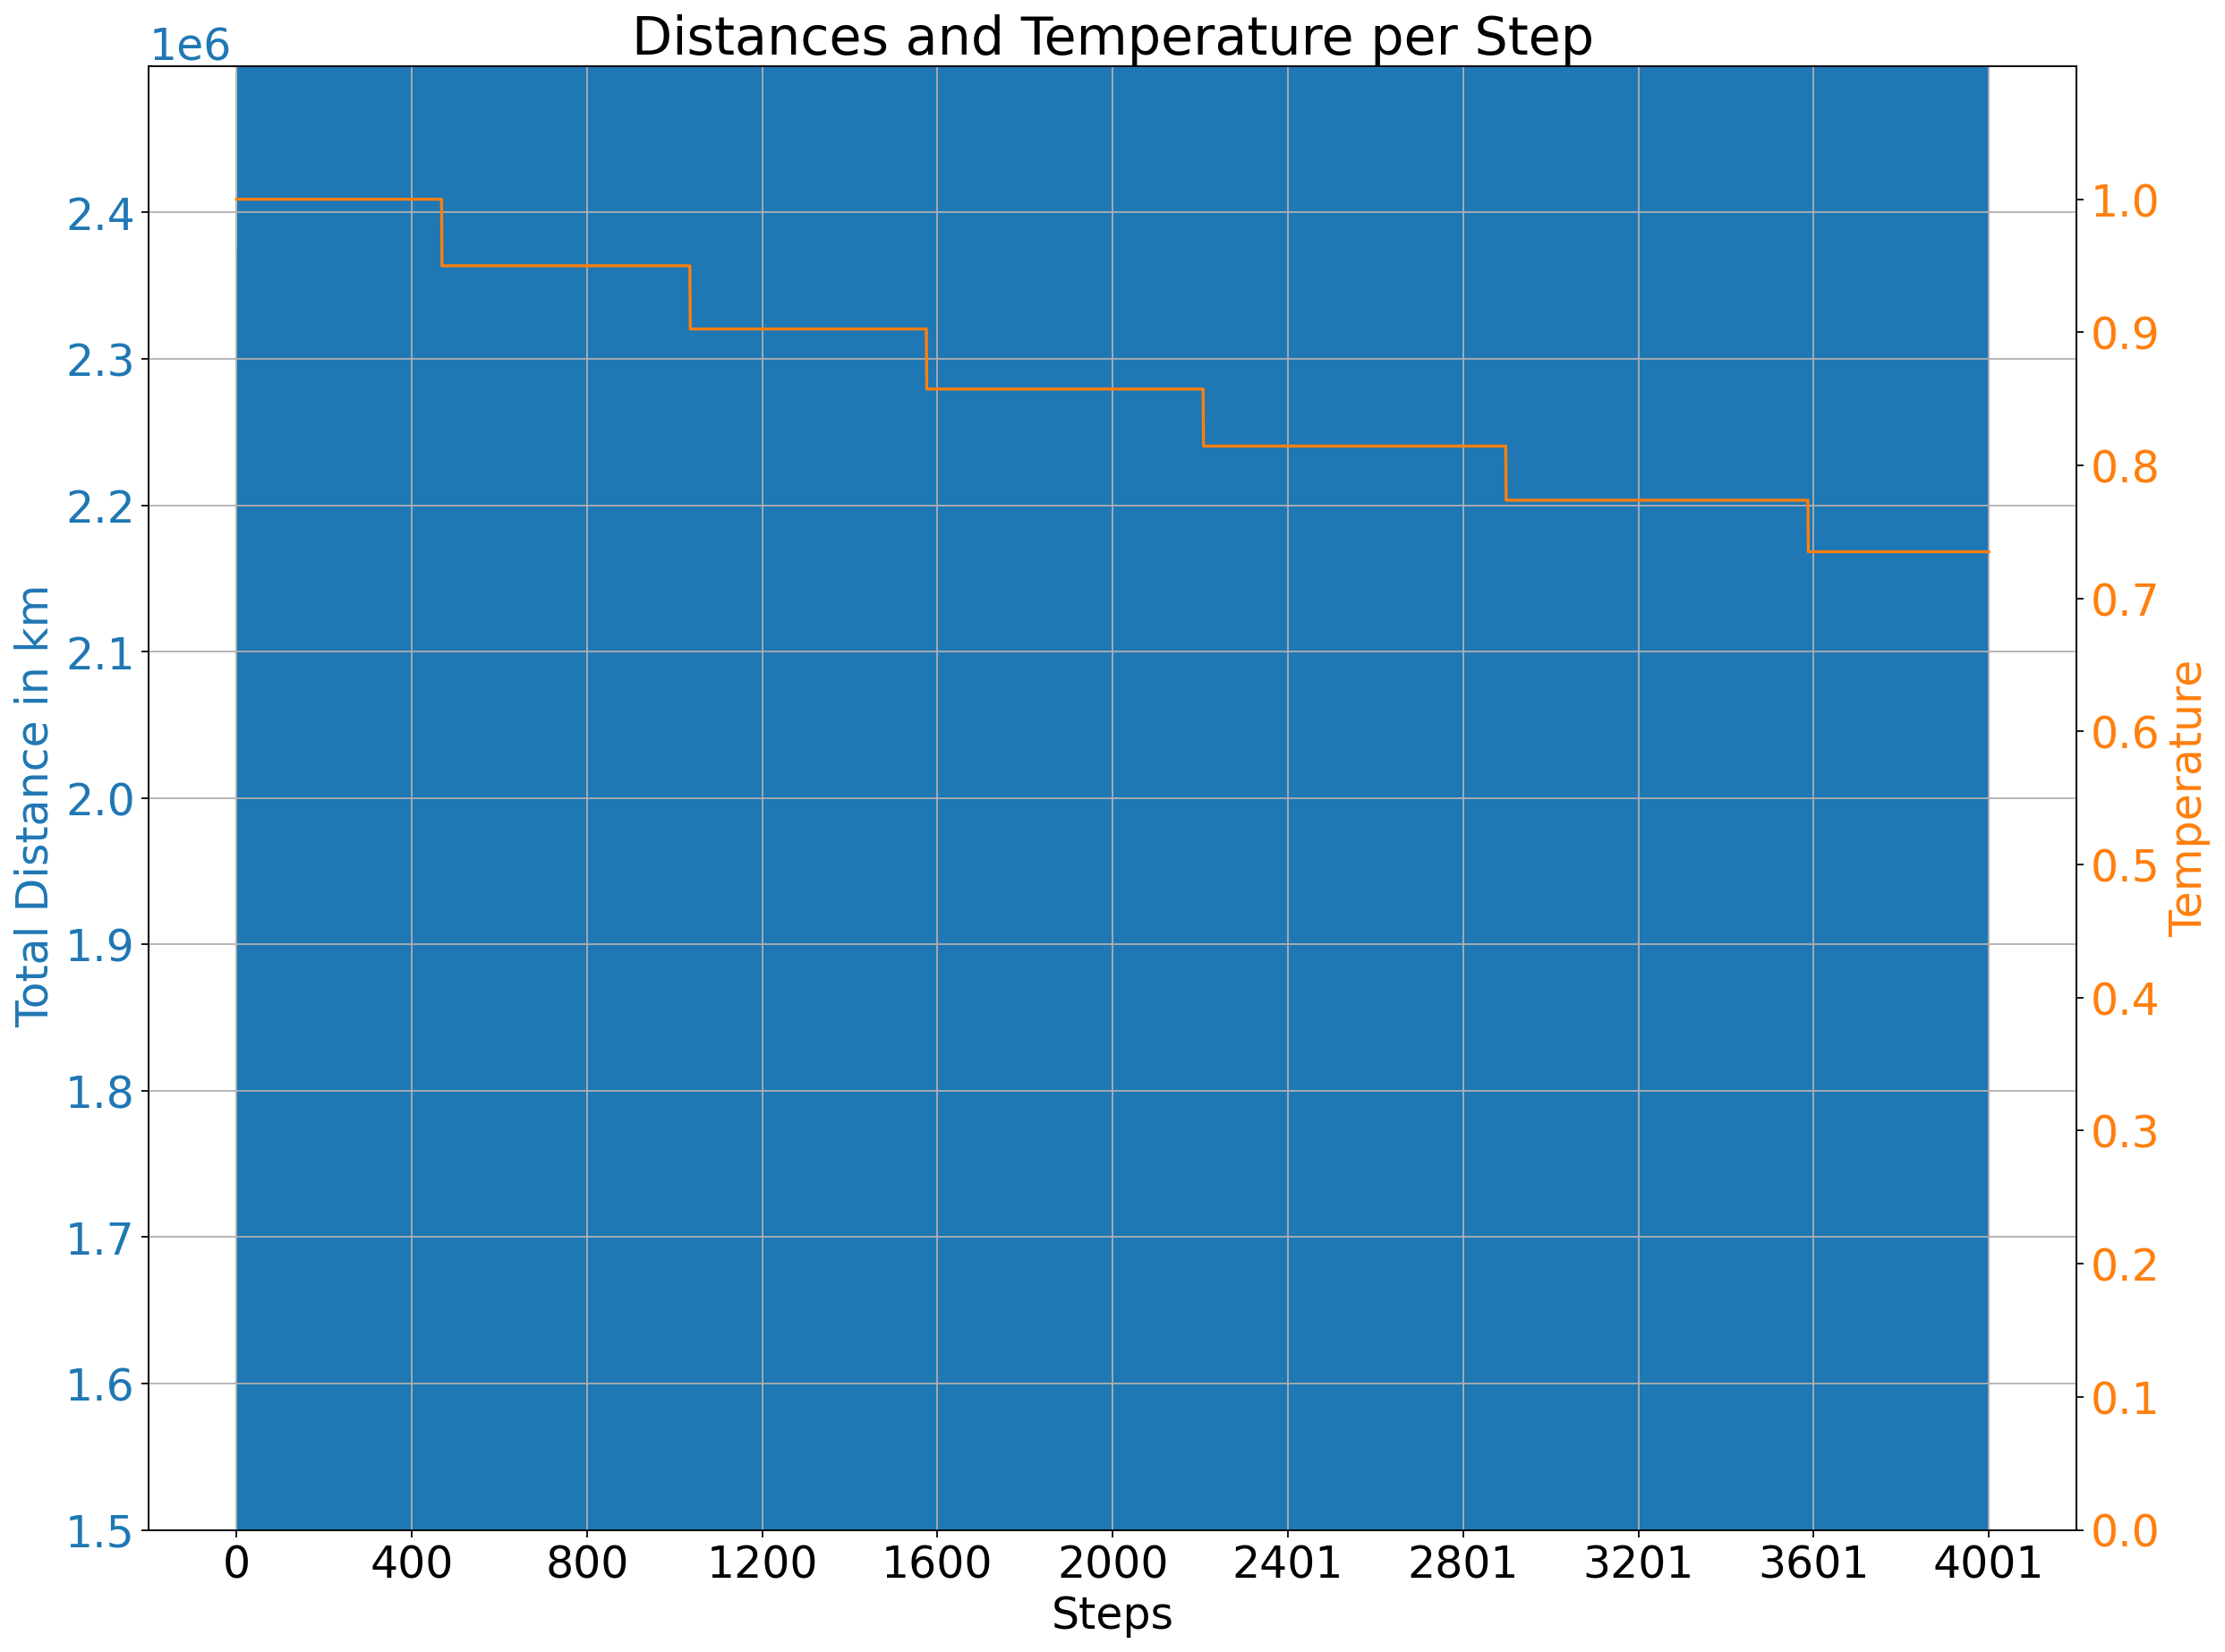

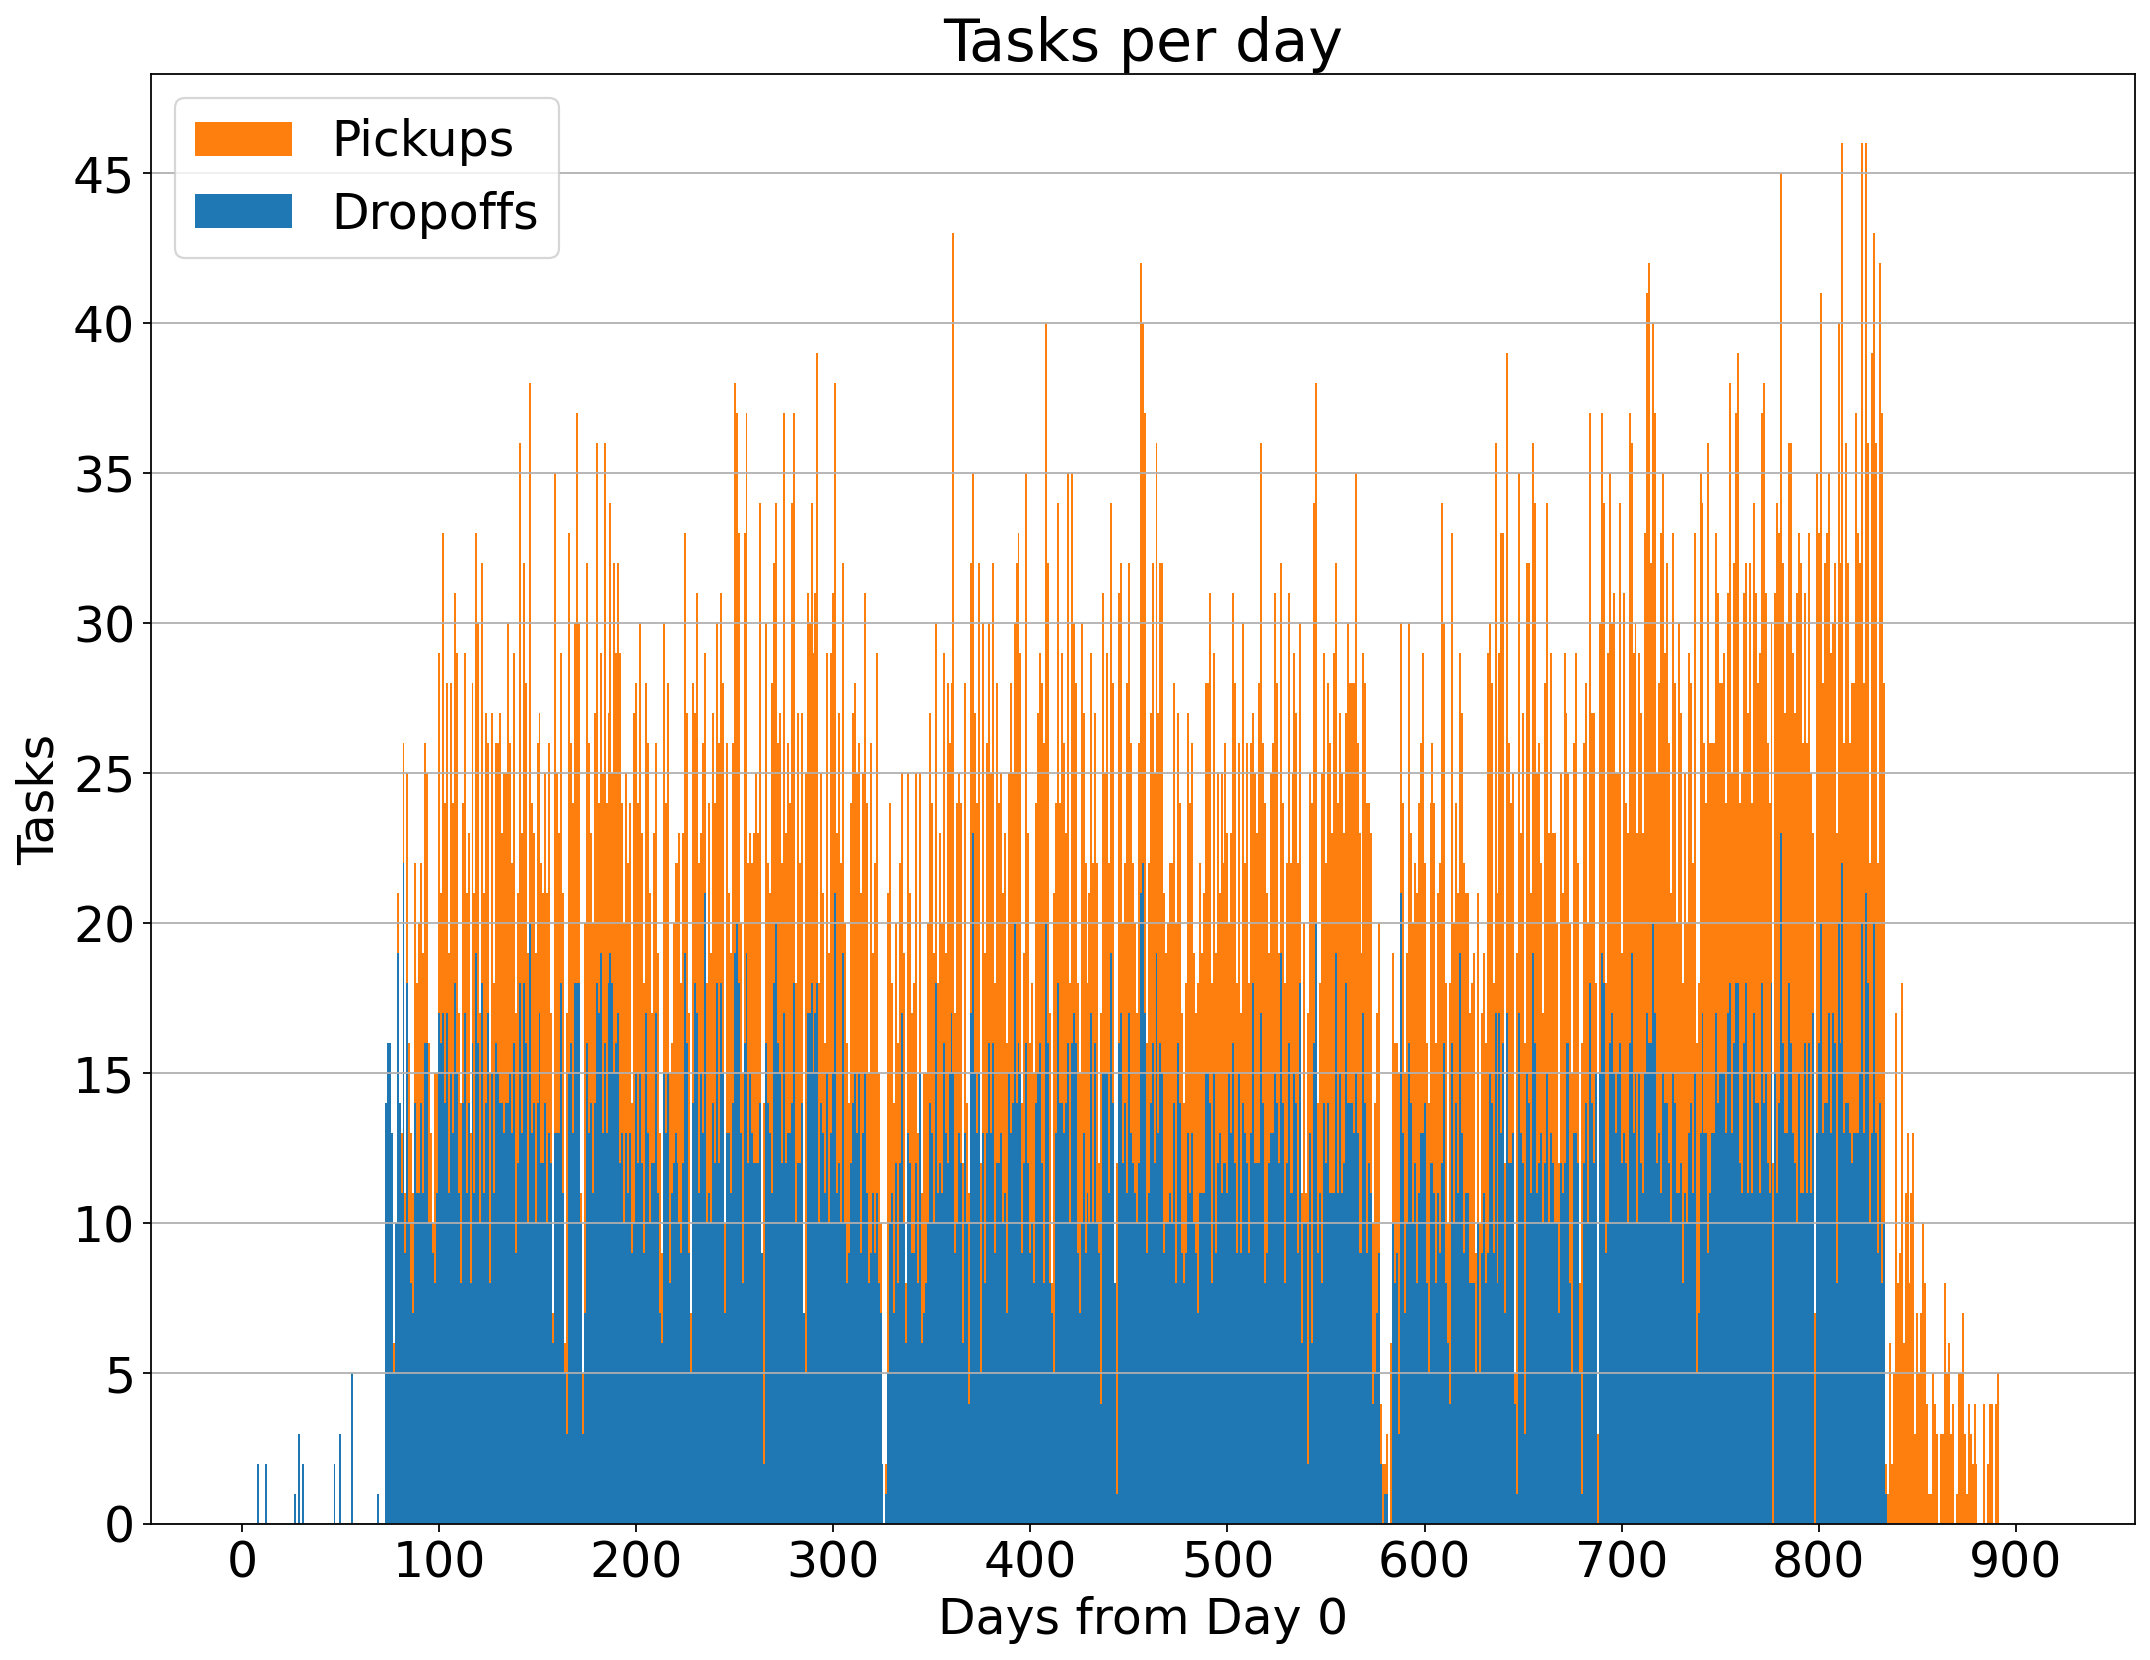

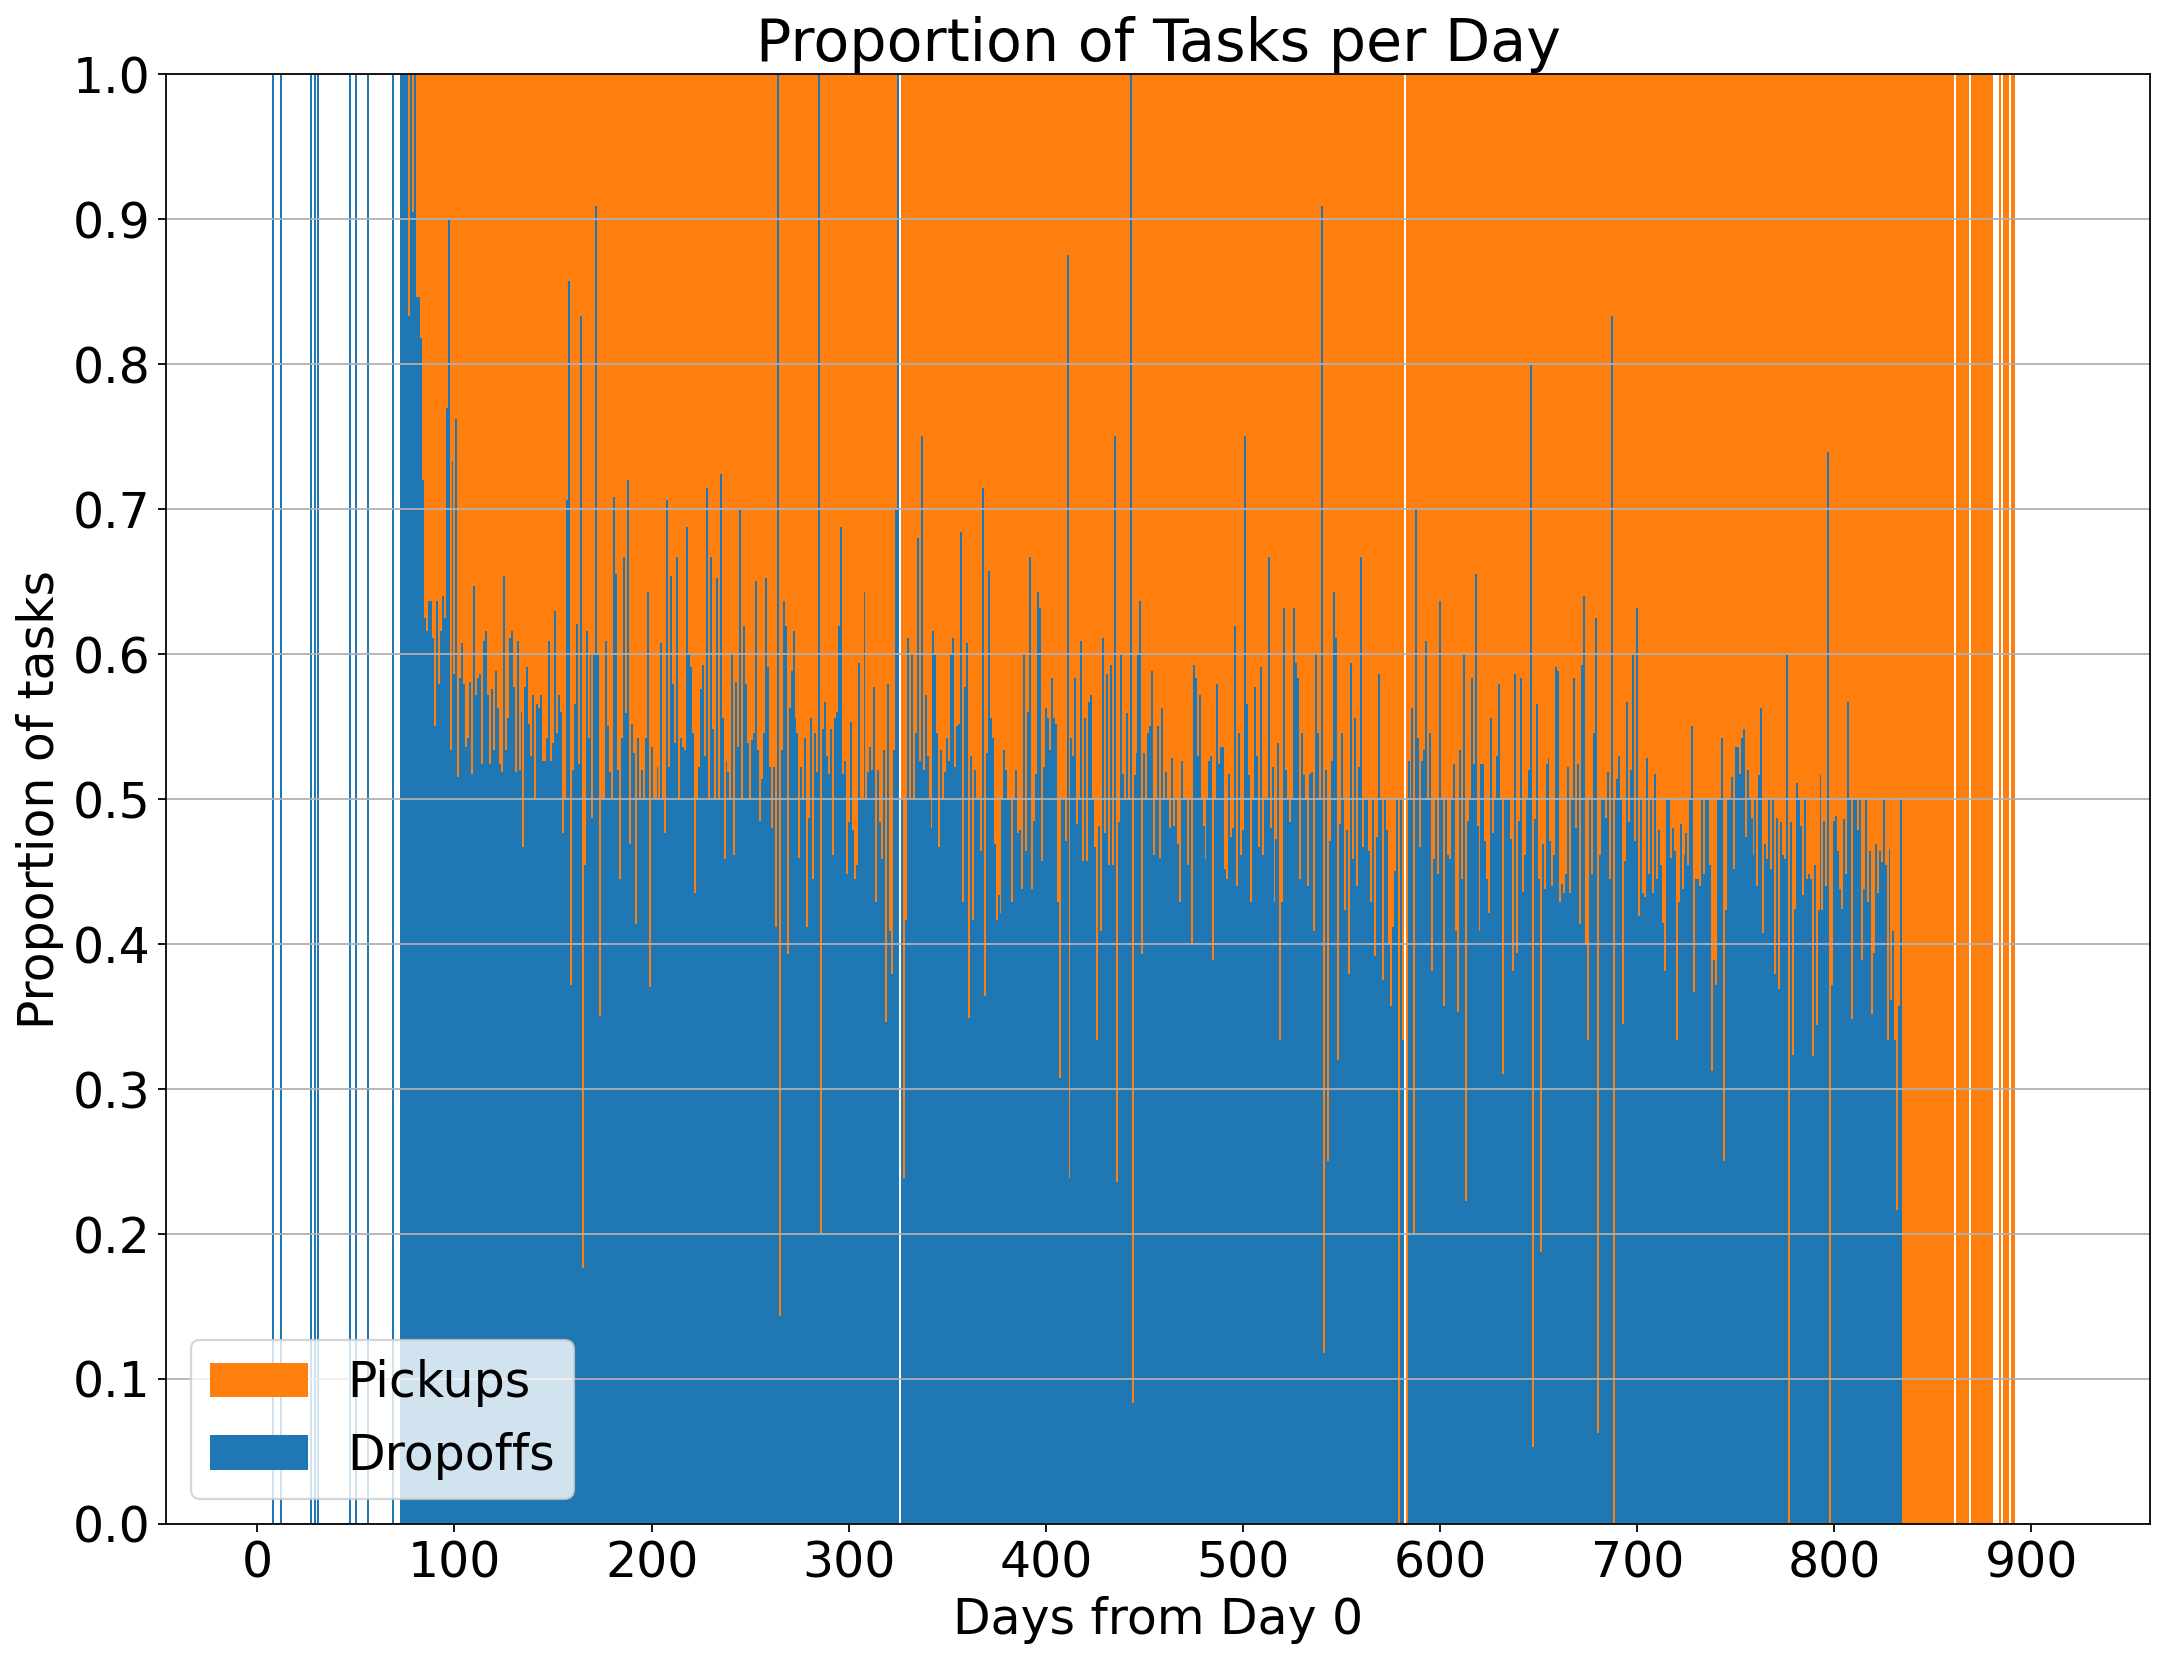

<Figure size 2560x1920 with 0 Axes>

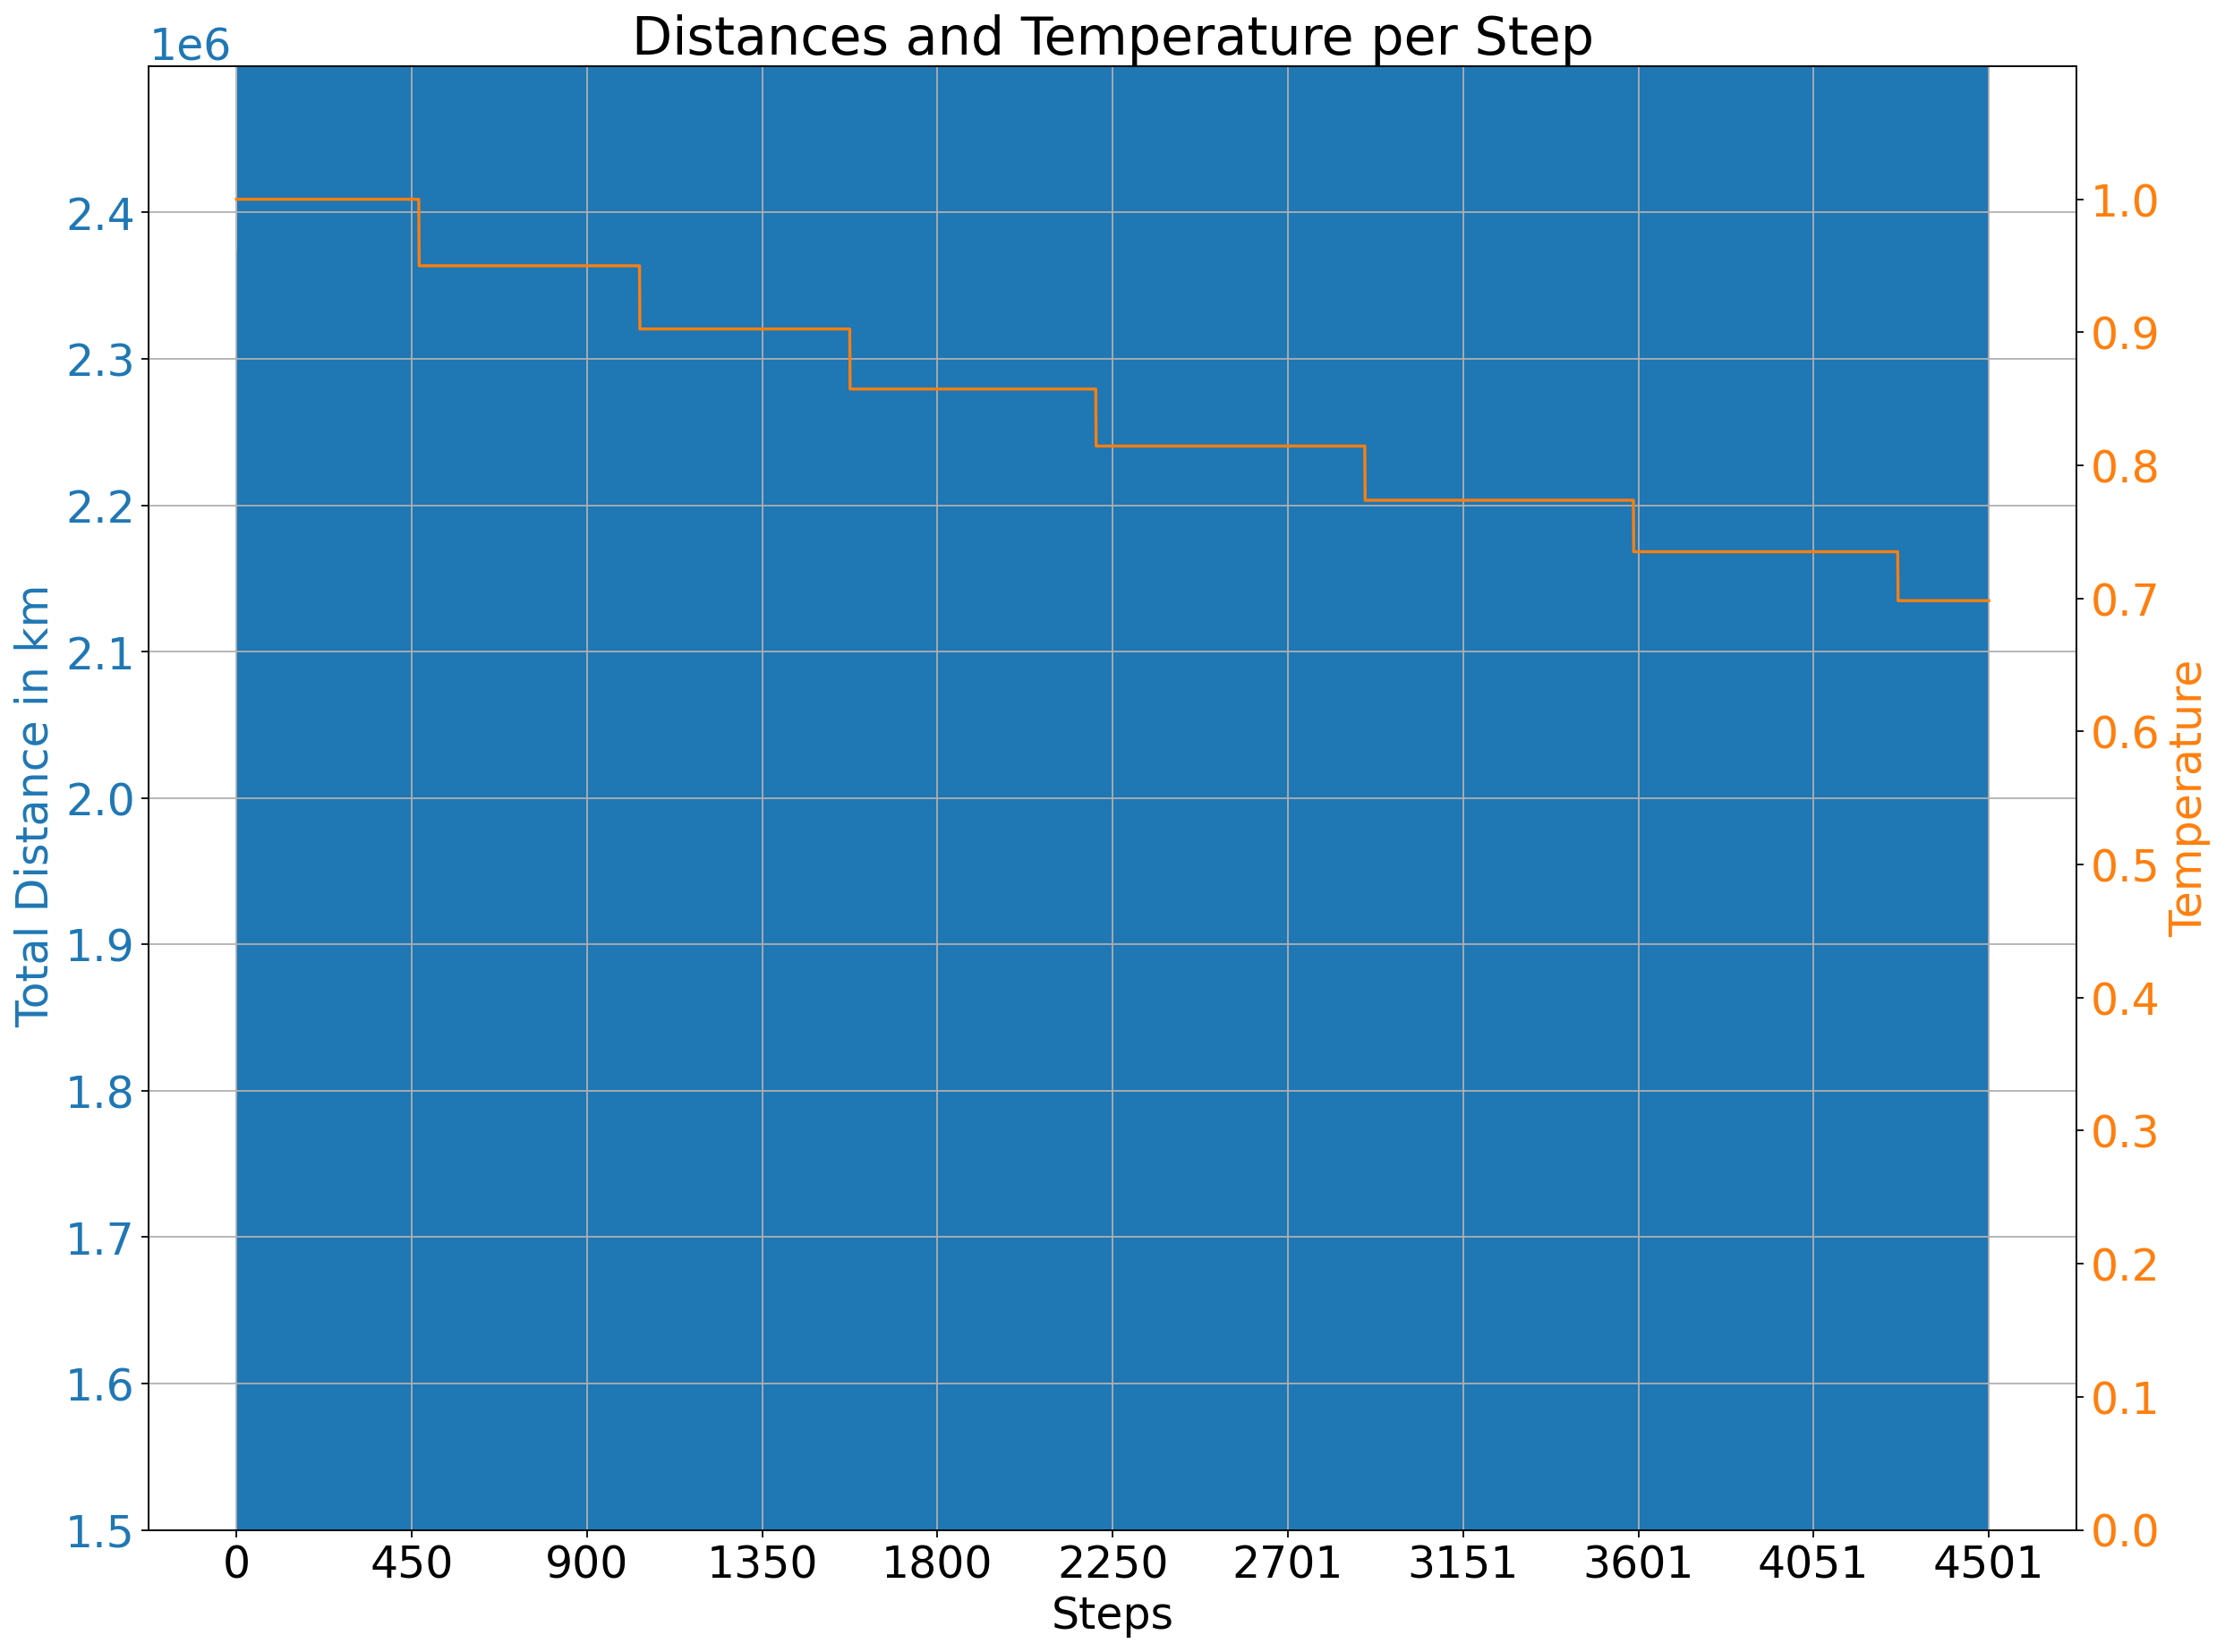

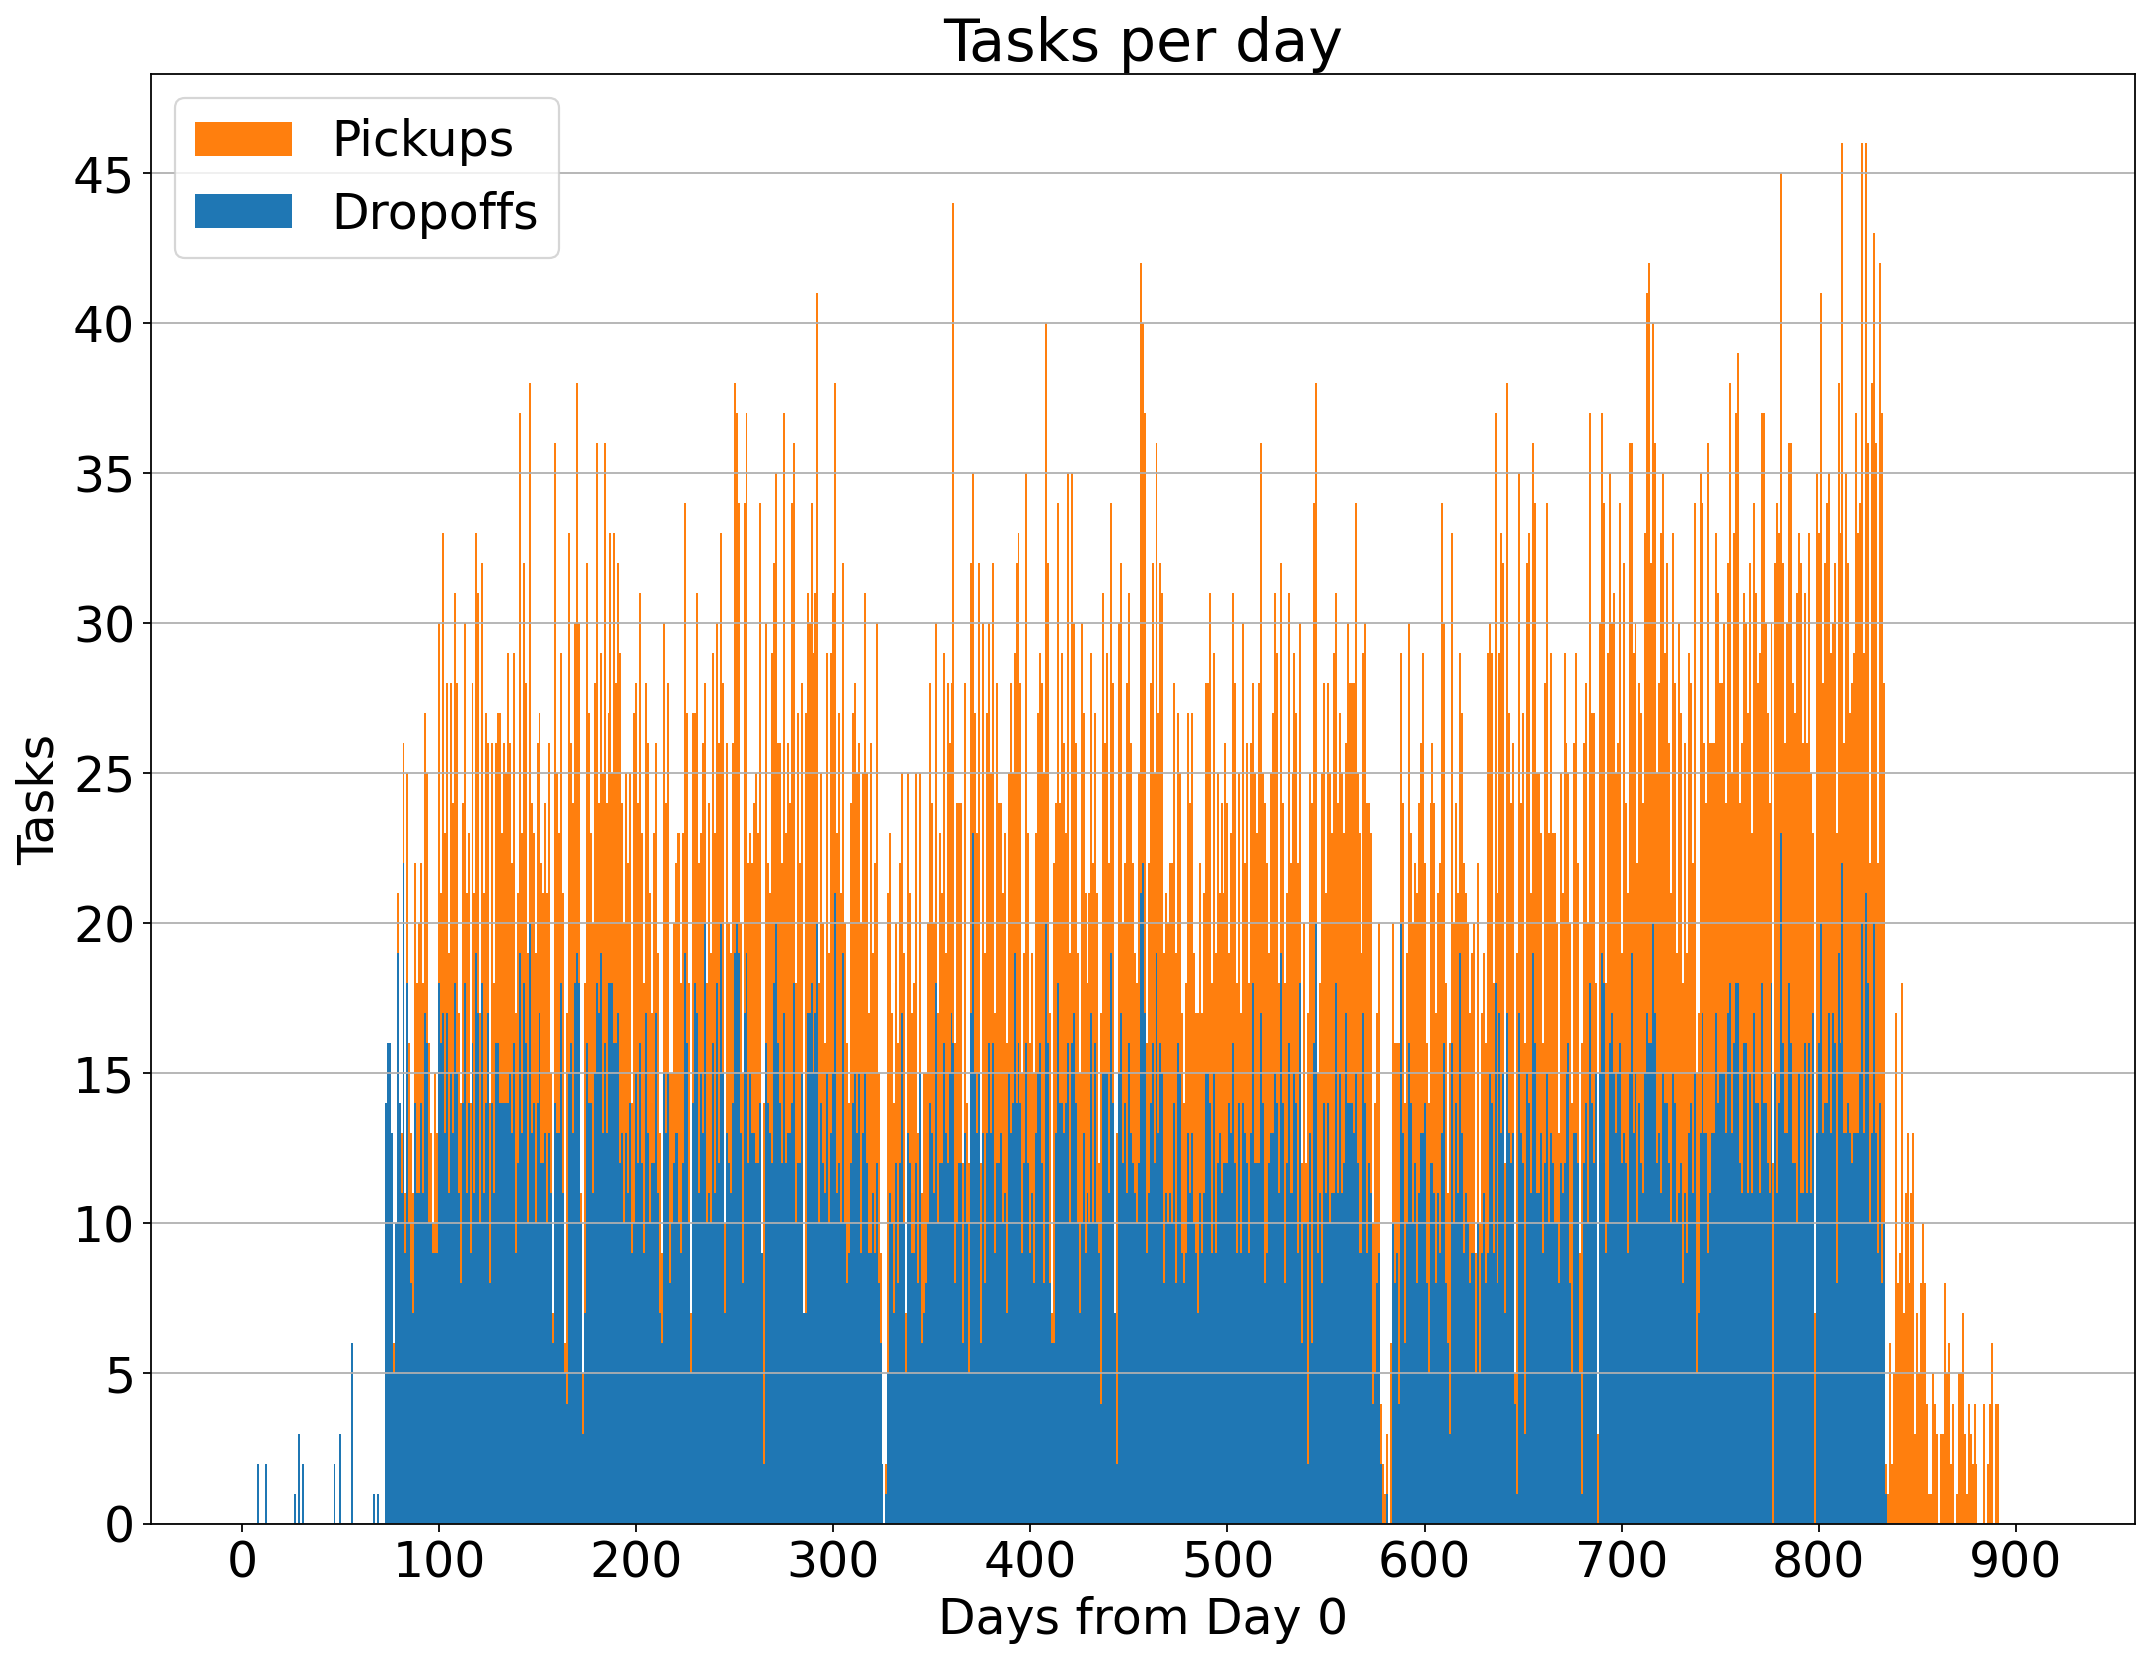

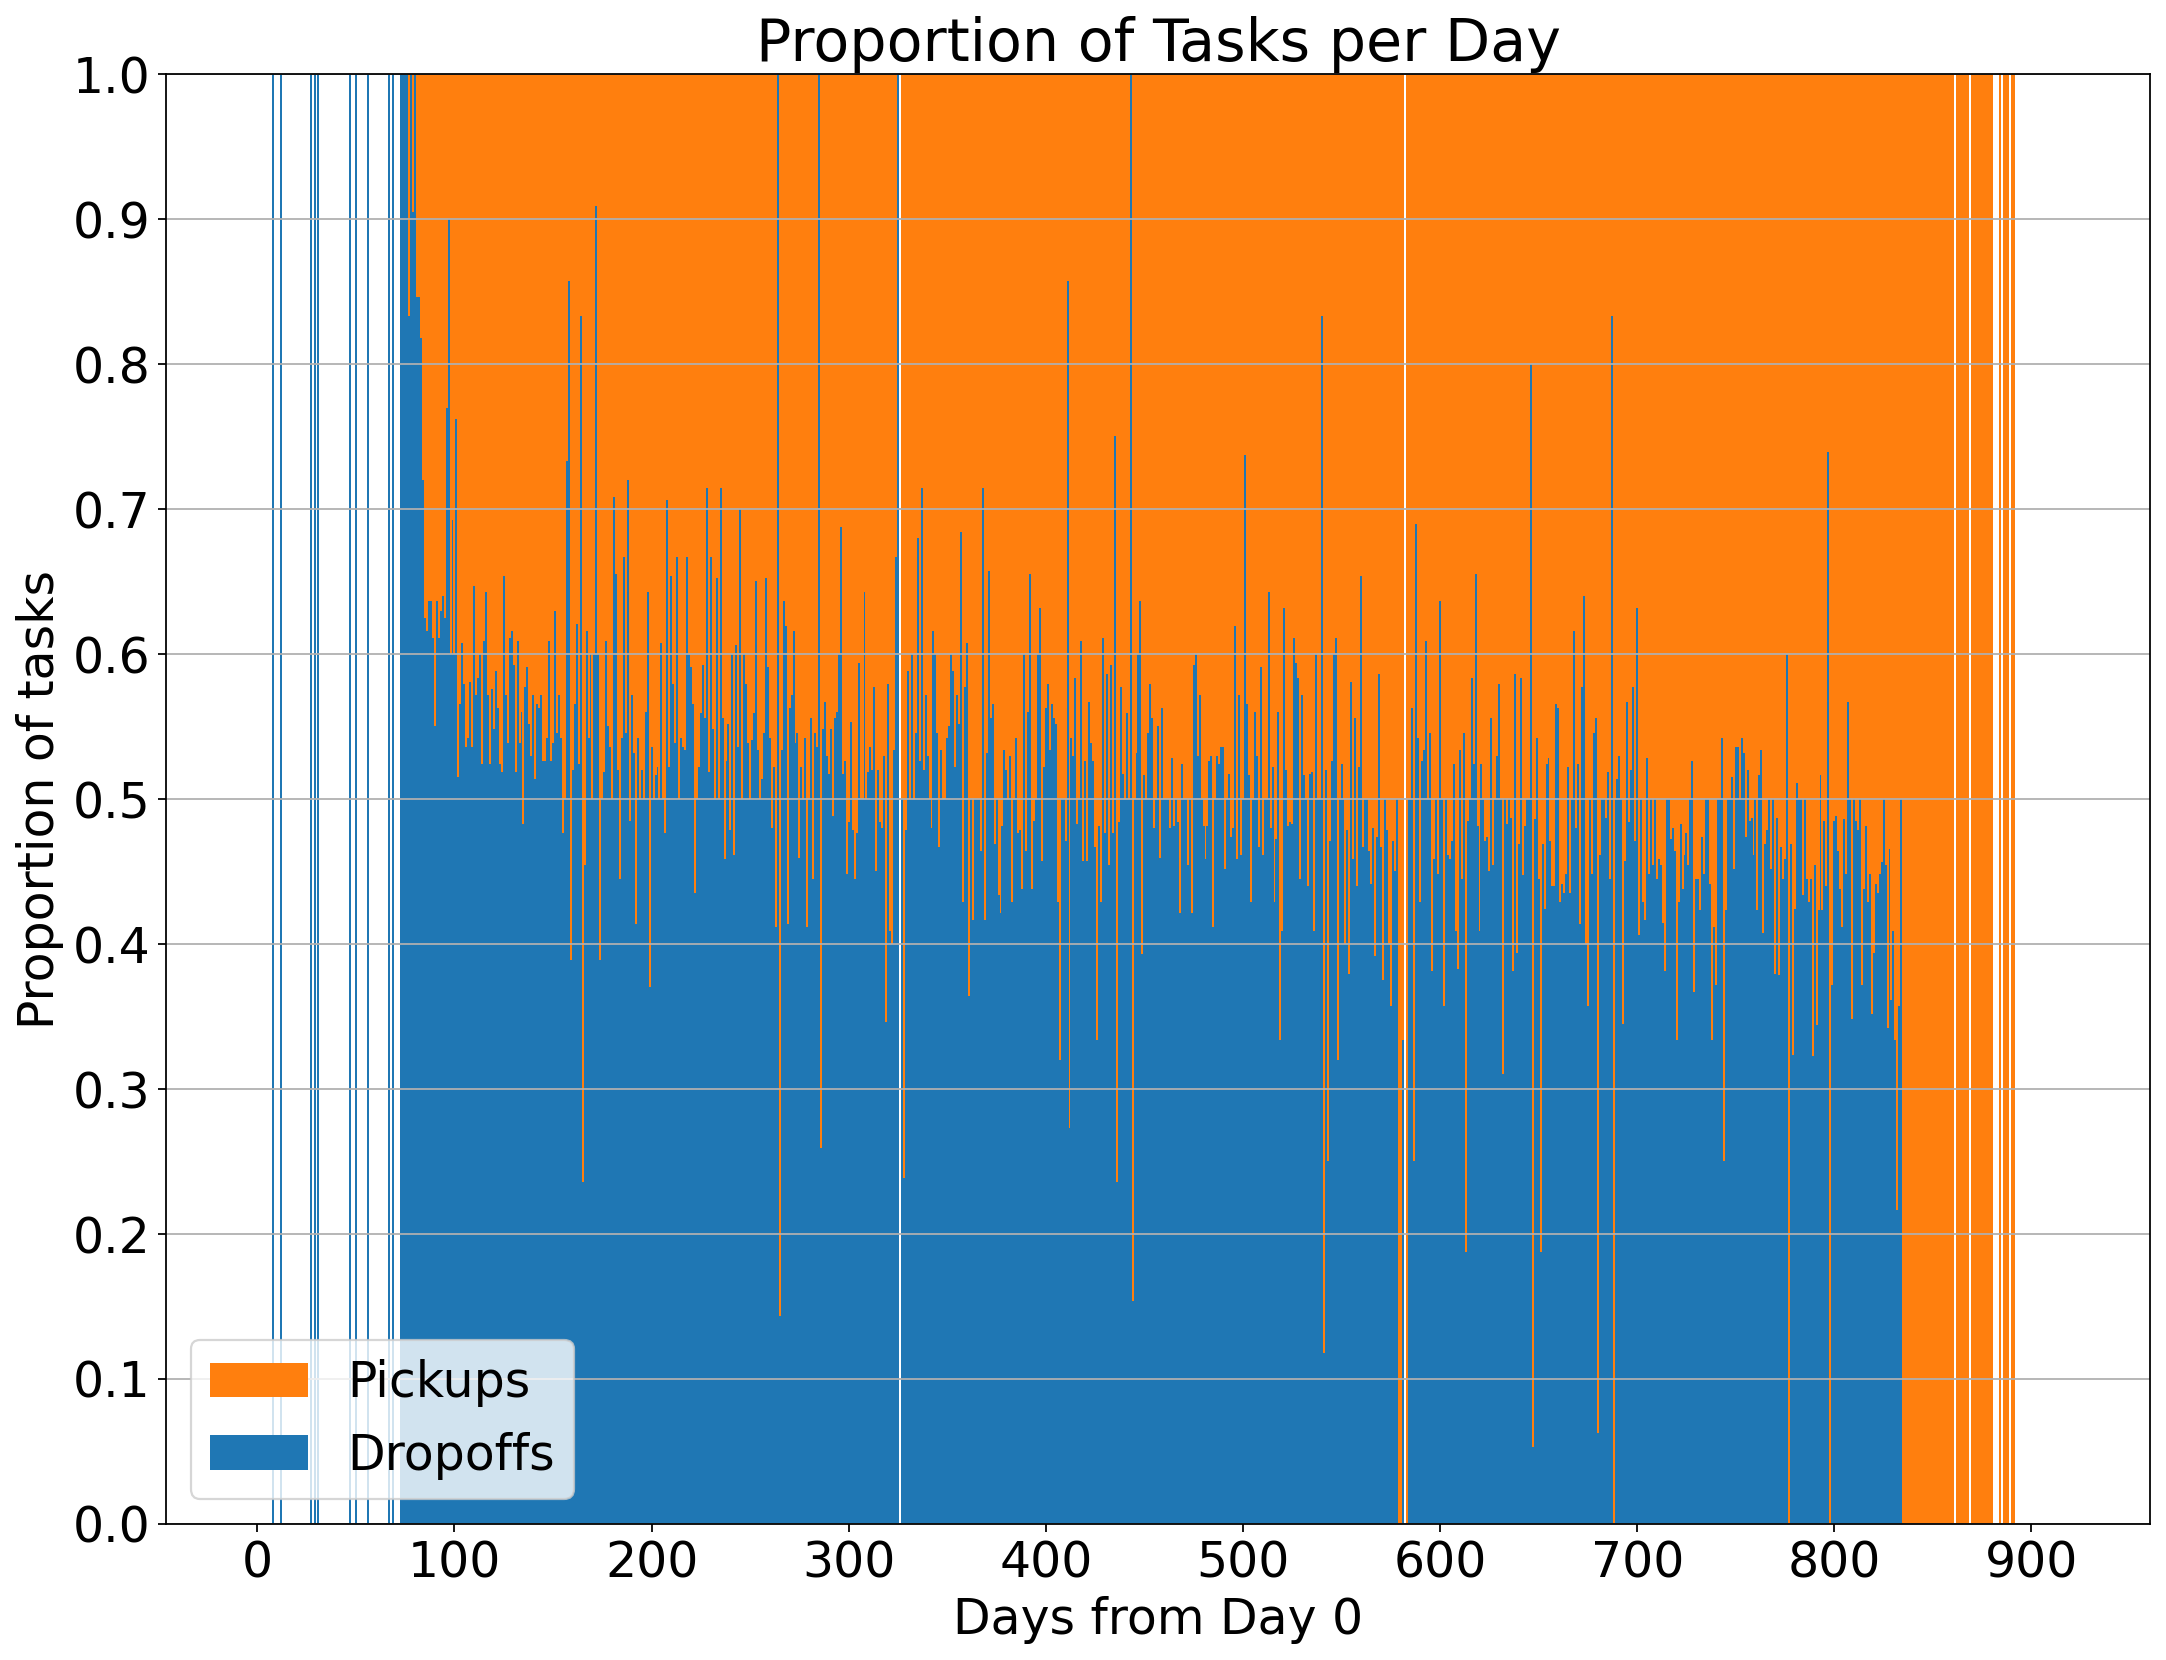

<Figure size 2560x1920 with 0 Axes>

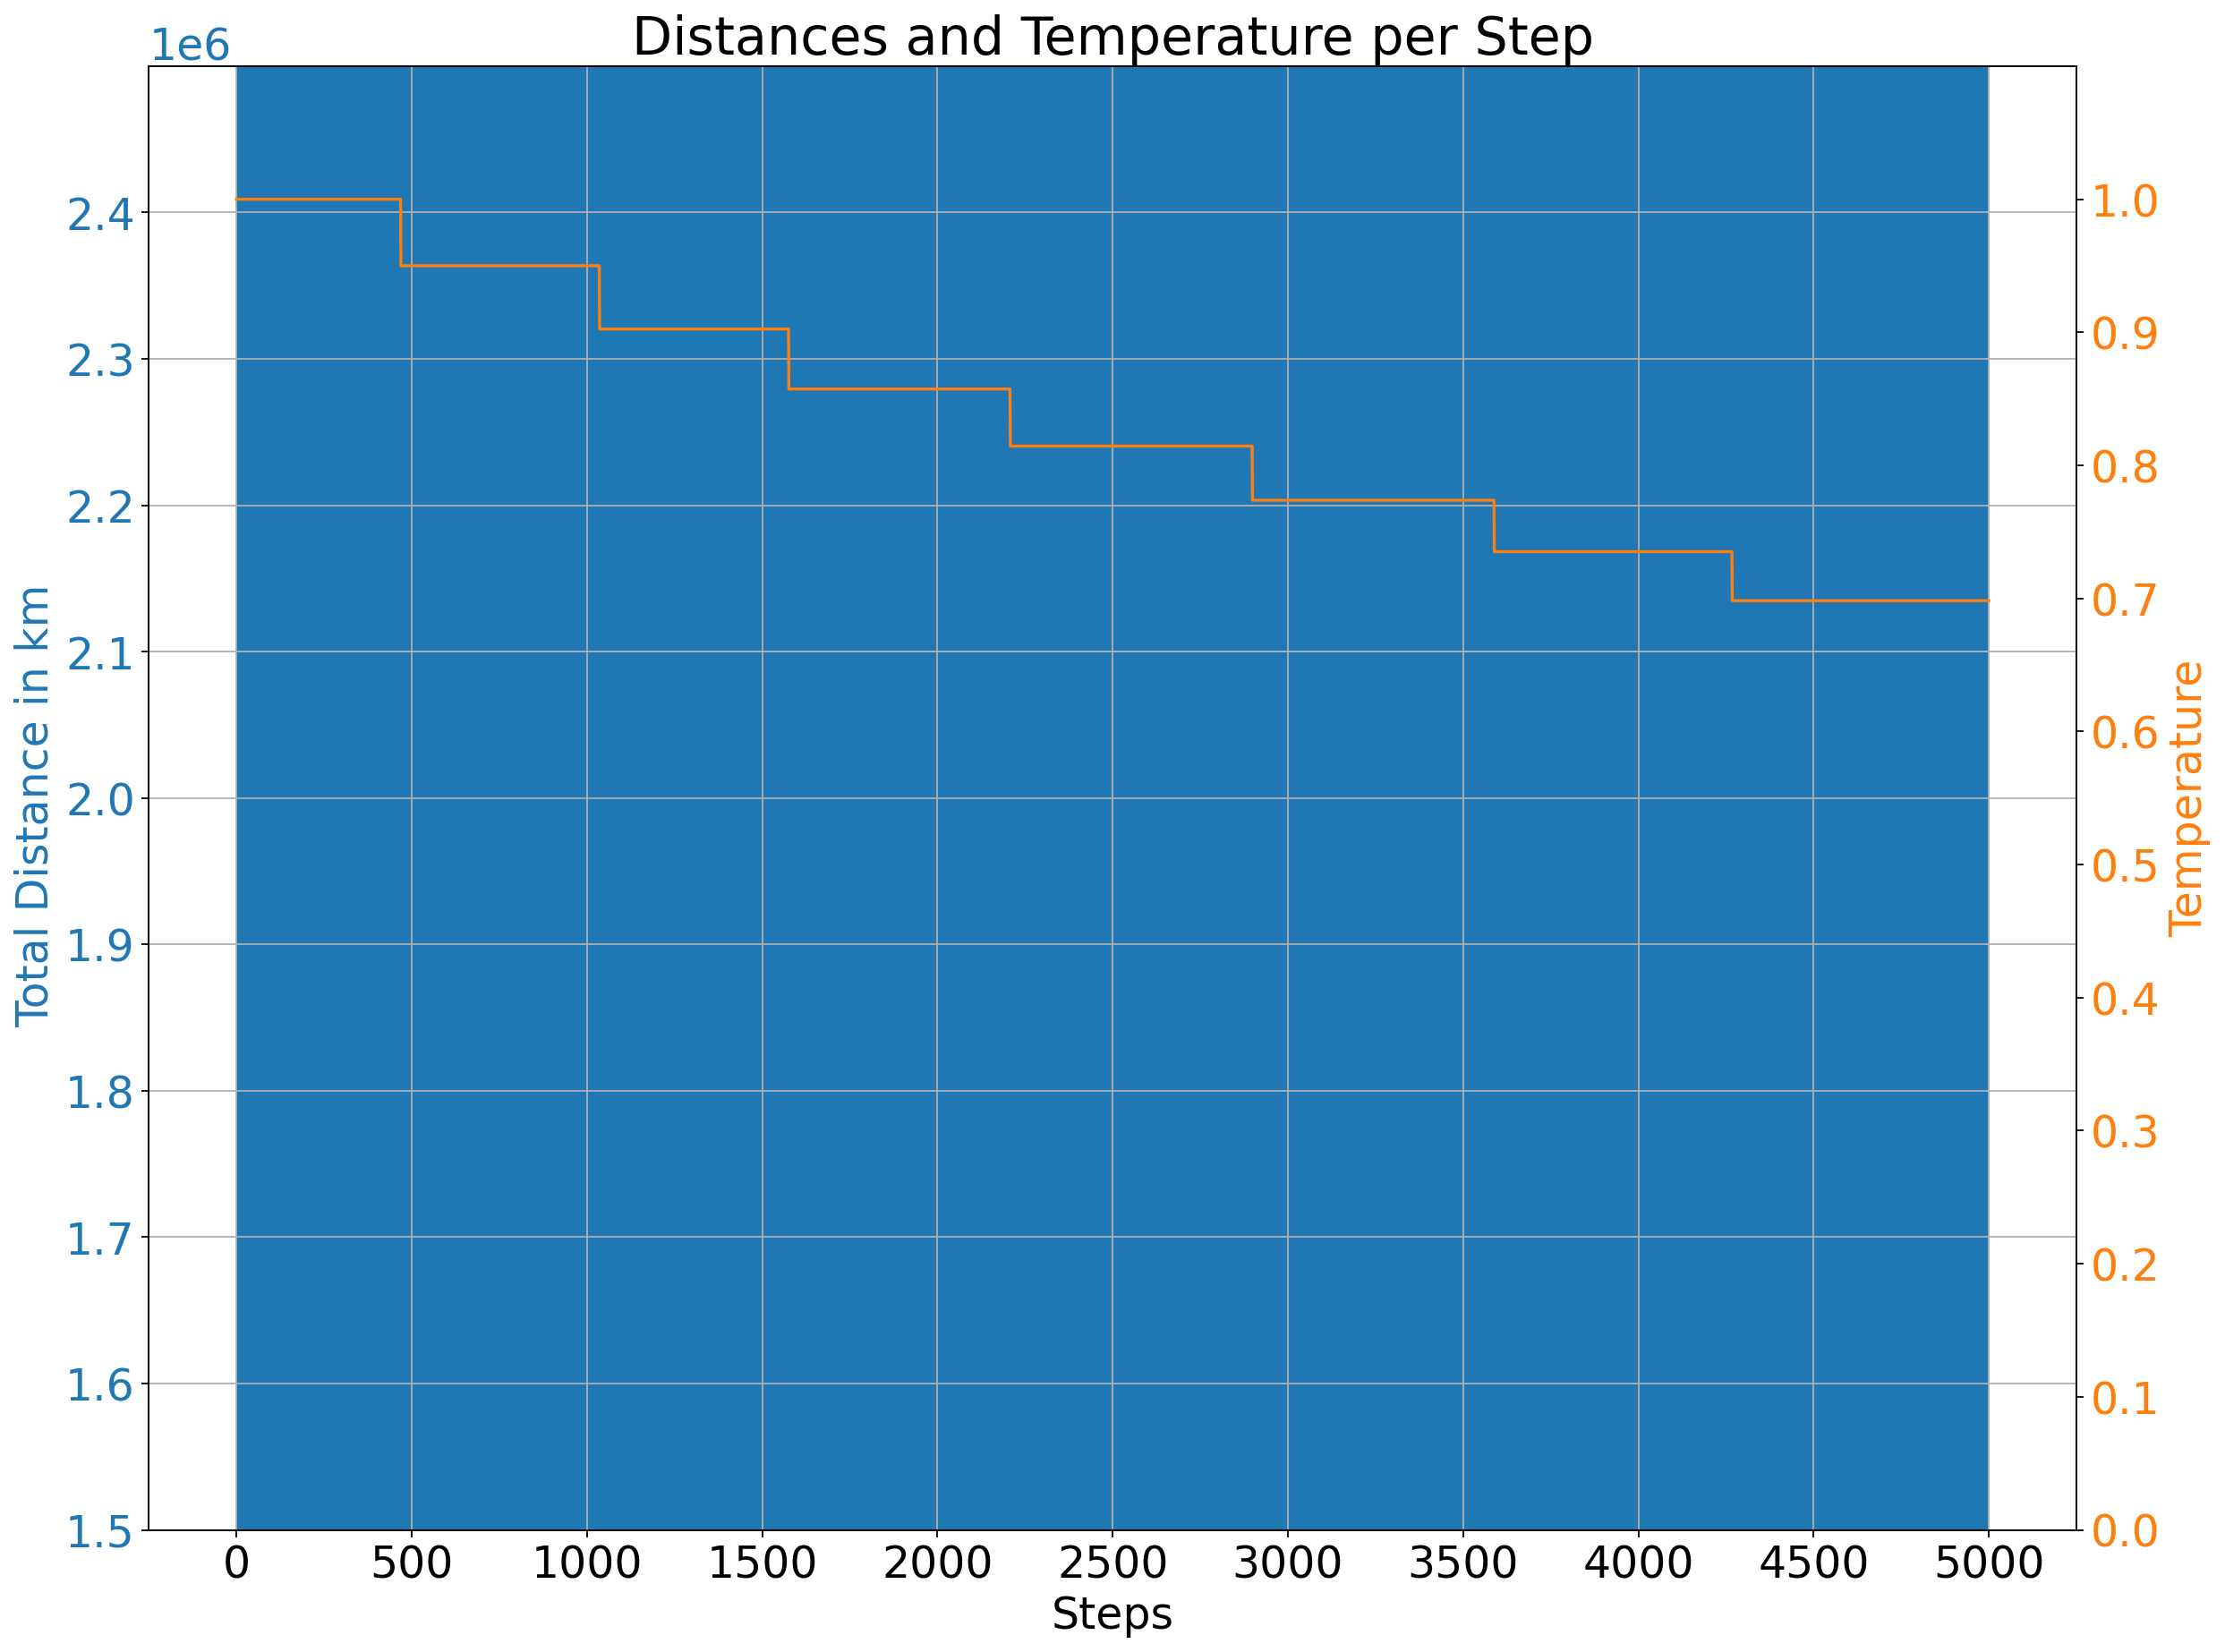

In [12]:
fc.print_log("Start with Stage 1a")
#dict_tours_temp = copy.deepcopy(dict_tours)
dict_tours_temp = dict_tours
moves_possible = True
move_type = 'pickup'
move_count = 0
loop_count = 0
step_count = 0
step_count_curr = 0


#define temperature schedule
temperature = sa.Geometric_Schedule(1,0.95,200)
current_temp = temperature.temp_initial
#define acceptance function
acceptance = sa.NormalizedExponentialAcceptance(solution_initial.total_distance)
#define overall statistic
dict_statistic = {0: [solution_initial.total_distance, temperature.temp_initial,0,0]}



fc.print_log("Start Random Moves")
while loop_count < 5000:
    move_made = False
    job_found = False
    try_count = 0
    step_count += 1
    #step_count_curr += 1
    loop_count += 1


    for depot in dict_depots:
        #read move_tour and check day_new fit
        while job_found == False:
            #retrieve random days
            day_org = random.choice(list_days)
            day_new = random.choice(list_days)

            #read random tour and move_job into local variables
            tour_org = dict_tours_temp[depot][day_org]

            if move_type == 'pickup':

                #check if there is a job
                if tour_org.list_pickups:
                    move_job = random.choice(tour_org.list_pickups)
                    job_found = True
                else: continue

                while day_new < move_job.end:
                    day_new = random.choice(list_days)
                    try_count +=1
                    #if not possible break after 1000 tries
                    if try_count > 500: break

            elif move_type == 'dropoff':
                #check if there is a job
                if tour_org.list_dropoffs:
                    move_job = random.choice(tour_org.list_dropoffs)
                    job_found = True
                else: continue

                while day_new > move_job.start:
                    day_new = random.choice(list_days)
                    try_count +=1
                    #if not possible break after 1000 tries
                    if try_count > 500: break

            #retrieve new tour
            tour_new = dict_tours_temp[depot][day_new]
            #check if list_plants is filled otherwise repeat
            if not tour_new.list_plants:
                job_found = False

        if try_count > 500: break

        #evaluate move
        distance_delta = sa.evaluate_move(move_type,tour_org,tour_new,move_job)

        #check for acceptance - if accepted, reassign
        if distance_delta < 0:
            #perform move
            distance_delta = sa.reassign_job(move_type,tour_org,tour_new,move_job)

            #adjust move_bol, statistic and leave for loop
            move_made = True
            move_count +=1
            current_temp = temperature.get_temp(move_count)

            last_total_distance = dict_statistic[step_count-1][0]
            dict_statistic[step_count] = [last_total_distance + distance_delta,\
                                                               current_temp,step_count,loop_count]

        else:   dict_statistic[step_count] = [last_total_distance + distance_delta,\
                                                               current_temp,step_count,loop_count]
        #switch move type
        if move_type == 'pickup': move_type = 'dropoff'
        else: move_type = 'pickup'




    print("Current: Loop: {} - Moves: {}                                  ".format(loop_count,move_count),end='\r')
    #export statistics every n iterations
    for i in range(20):
        if loop_count == 500 * i + 1:
            fc.print_log("logging at %s" % loop_count)
            solution_stage_1atemp = cl.Solution(temp_depot,dict_tours_temp,list_days,dev_curr=dict_statistic)
            solution_stage_1atemp.plot_tasks(50, exp_prefix = img_exp_path + 'over_time/solution_stage1a_L{}_'.format(loop_count),plot=False)
            solution_stage_1atemp.plot_task_proportion(exp_prefix = img_exp_path + 'over_time/solution_stage1a_L{}_'.format(loop_count),plot=False)
            solution_stage_1atemp.plot_developement(exp_prefix = img_exp_path + 'over_time/solution_stage1a_L{}_'.format(loop_count),plot=False)

if loop_count > 9999:
    fc.print_log("Loopcount exit")

fc.print_log("Final: Loop: {} - Moves: {}".format(loop_count,move_count))

fc.print_log("Done with Moves")

solution_stage1a = cl.Solution(temp_depot,dict_tours_temp,list_days,dev_curr=dict_statistic)

solution_stage1a.plot_tasks(50,exp_prefix = img_exp_path + 'solution_stage1a')
solution_stage1a.plot_task_proportion(exp_prefix = img_exp_path + 'solution_stage1a')
solution_stage1a.plot_developement(exp_prefix = img_exp_path + 'solution_stage1a')
fc.dict_to_csv(dict_statistic,img_exp_path, 'hc_random_stage_1a')

fc.print_log("Done with Stage 1a")
steps_1a = step_count

#worst pair heuristic

In [13]:
print("old distance: %s" % solution_initial.total_distance)
print("new distance: %s" % solution_stage1a.total_distance)

import csv
def dict_to_csv(dict_to_write: dict, path: str, name: str):
    file = path + name + ".csv"
    with open(file, 'w', newline='') as f:
        writer = csv.writer(f)
        for i in dict_to_write:
            writer.writerow(dict_to_write[i])

dict_to_csv(dict_statistic,img_exp_path, 'hc_random_stage_1a')

old distance: 2374315.453137417
new distance: 2179075.82461326


In [14]:
sys.setrecursionlimit(100000)
fc.save_object(solution_stage1a, img_exp_path + 'solution_stage1a.pkl')